In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df_train = pd.read_csv('train.csv')
df_item = pd.read_csv('item.csv')

In [7]:
df = pd.merge(df_train, df_item, on='item_id', how='outer')
df.sort_values("datetime", inplace=True)

In [8]:
df

datetime  order_id  user_id  item_id  province_id  city_id  \
52784   2017-01-01     46958      352       53            1       11   
39367   2017-01-01     46958      352       39            1       11   
6170    2017-01-01     85599       62        6            1        0   
52589   2017-01-01     13330      352       53            1       11   
81522   2017-01-01     85599       62       41            1        0   
...            ...       ...      ...      ...          ...      ...   
34820   2020-12-31      8476      419       72            2       19   
98963   2020-12-31     76049       66       71            1       16   
99107   2020-12-31     63274      269       71            1        3   
133219  2020-12-31     27911      326      105            0        4   
143663  2020-12-31     19054      326       78            0        4   

        quantity brand_id  brandfamily_id  package_id info_id  
52784   1.425029     [11]               5           6     HGO  
39367   2.427209     [11]               5           5     HGO  
6170    3.760882  [6, 19]               2           1     BHM  
52589   0.712514     [11]               5           6     HGO  
81522   1.672474   [6, 8]               4           1    BZMN  
...          ...      ...             ...         ...     ...  
34820   0.069190  [6, 19]               2           2     BHM  
98963   2.078201     [11]               5           7     HGO  
99107   5.195502     [11]               5           7     HGO  
133219  0.015935     [11]               5           1     HGO  
143663  0.020894   [6, 8]               4           4    BZMN  

[145195 rows x 11 columns]

In [6]:
df.to_csv('Merge.csv')

In [9]:
datetime = df["datetime"].values
year = [my_str.split("-")[0] for my_str in datetime]
df["year"] = year
month = [my_str.split("-")[1] for my_str in datetime]
df['month'] = month
print(df)

          datetime  order_id  user_id  item_id  province_id  city_id  \
52784   2017-01-01     46958      352       53            1       11   
39367   2017-01-01     46958      352       39            1       11   
6170    2017-01-01     85599       62        6            1        0   
52589   2017-01-01     13330      352       53            1       11   
81522   2017-01-01     85599       62       41            1        0   
...            ...       ...      ...      ...          ...      ...   
34820   2020-12-31      8476      419       72            2       19   
98963   2020-12-31     76049       66       71            1       16   
99107   2020-12-31     63274      269       71            1        3   
133219  2020-12-31     27911      326      105            0        4   
143663  2020-12-31     19054      326       78            0        4   

        quantity brand_id  brandfamily_id  package_id info_id  year month  
52784   1.425029     [11]               5           6     H

In [10]:
df_group = df.groupby(['year', 'month', 'item_id',
                       'province_id']).sum('quantity')
print(df_group)

                                order_id  user_id  city_id    quantity  \
year month item_id province_id                                           
2017 01    0       2             1185735     5432      475   14.110192   
           1       0            11657629    60883     2192  421.313155   
                   2             1536072     6858      684  196.889406   
           2       0              122115      757       10    5.654450   
           6       1             2351818    12050      269  147.802670   
...                                  ...      ...      ...         ...   
2020 12    110     0              298763     1880       40    3.653636   
                   1             1594504     7526       87    4.823909   
                   2             2687754     8151     1083  128.102211   
           111     2              204874     1532       95   23.734884   
           113     1              408134     1916       27    9.209059   

                                brand

In [30]:
df_group.to_csv('Grouped.csv')

In [11]:
df_group

order_id  user_id  city_id    quantity  \
year month item_id province_id                                           
2017 01    0       2             1185735     5432      475   14.110192   
           1       0            11657629    60883     2192  421.313155   
                   2             1536072     6858      684  196.889406   
           2       0              122115      757       10    5.654450   
           6       1             2351818    12050      269  147.802670   
...                                  ...      ...      ...         ...   
2020 12    110     0              298763     1880       40    3.653636   
                   1             1594504     7526       87    4.823909   
                   2             2687754     8151     1083  128.102211   
           111     2              204874     1532       95   23.734884   
           113     1              408134     1916       27    9.209059   

                                brandfamily_id  package_id  
year month item_id province_id                              
2017 01    0       2                       125          50  
           1       0                       229         229  
                   2                        36          36  
           2       0                        15          12  
           6       1                        92          46  
...                                        ...         ...  
2020 12    110     0                        54          36  
                   1                       261         174  
                   2                       513         342  
           111     2                        10           5  
           113     1                        45          36  

[5664 rows x 6 columns]

In [12]:
df_groups = df_group['quantity']

<AxesSubplot:xlabel='year,month,item_id,province_id'>

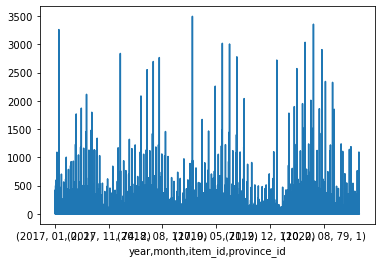

In [13]:
df_groups.plot()

In [3]:
group = pd.read_csv('Grouped.csv')
group

year  month  item_id  province_id  order_id  user_id  city_id  \
0     2017      1        0            2   1185735     5432      475   
1     2017      1        1            0  11657629    60883     2192   
2     2017      1        1            2   1536072     6858      684   
3     2017      1        2            0    122115      757       10   
4     2017      1        6            1   2351818    12050      269   
...    ...    ...      ...          ...       ...      ...      ...   
5659  2020     12      110            0    298763     1880       40   
5660  2020     12      110            1   1594504     7526       87   
5661  2020     12      110            2   2687754     8151     1083   
5662  2020     12      111            2    204874     1532       95   
5663  2020     12      113            1    408134     1916       27   

        quantity  brandfamily_id  package_id  
0      14.110192             125          50  
1     421.313155             229         229  
2     196.889406              36          36  
3       5.654450              15          12  
4     147.802670              92          46  
...          ...             ...         ...  
5659    3.653636              54          36  
5660    4.823909             261         174  
5661  128.102211             513         342  
5662   23.734884              10           5  
5663    9.209059              45          36  

[5664 rows x 10 columns]

In [4]:
group = group[['year', 'month', 'item_id', 'province_id', 'quantity']]
group_2017 = group[group['year'] == 2017]
group_2017

year  month  item_id  province_id    quantity
0     2017      1        0            2   14.110192
1     2017      1        1            0  421.313155
2     2017      1        1            2  196.889406
3     2017      1        2            0    5.654450
4     2017      1        6            1  147.802670
...    ...    ...      ...          ...         ...
1122  2017     12      112            0    2.274840
1123  2017     12      113            1    8.691638
1124  2017     12      114            0    6.573186
1125  2017     12      115            0    1.837587
1126  2017     12      116            1    0.521739

[1127 rows x 5 columns]

In [40]:
group1=group.join(pd.get_dummies(group['province_id']))
group1

year  month  item_id  province_id    quantity  0  1  2
0     2017      1        0            2   14.110192  0  0  1
1     2017      1        1            0  421.313155  1  0  0
2     2017      1        1            2  196.889406  0  0  1
3     2017      1        2            0    5.654450  1  0  0
4     2017      1        6            1  147.802670  0  1  0
...    ...    ...      ...          ...         ... .. .. ..
5659  2020     12      110            0    3.653636  1  0  0
5660  2020     12      110            1    4.823909  0  1  0
5661  2020     12      110            2  128.102211  0  0  1
5662  2020     12      111            2   23.734884  0  0  1
5663  2020     12      113            1    9.209059  0  1  0

[5664 rows x 8 columns]

In [38]:
group2=group1.join(pd.get_dummies(group1['month']))

ValueError: columns overlap but no suffix specified: Index([1, 2], dtype='object')

In [28]:
item_01 = group_2017[group_2017['item_id']==0]
item_01

year  month  item_id  province_id   quantity
0     2017      1        0            2  14.110192
84    2017      2        0            2   2.938323
170   2017      3        0            2   8.575073
260   2017      4        0            2   1.120792
351   2017      5        0            2  15.899942
446   2017      6        0            2  13.708853
542   2017      7        0            2   2.670588
641   2017      8        0            2   0.613454
739   2017      9        0            2   1.323821
840   2017     10        0            2   1.766628
937   2017     11        0            2   1.314560
1031  2017     12        0            2   4.538963

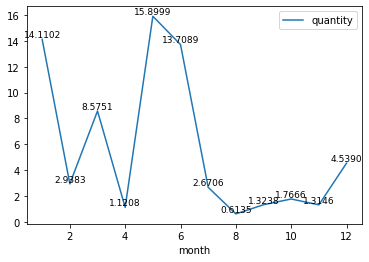

In [27]:
item_01.plot(x='month', y='quantity')
for a, b in zip(item_01['month'], item_01['quantity']):
    plt.text(a, b, '%.4f' % b, ha='center', va='bottom', fontsize=9)
plt.show()

In [5]:
group_2018 = group[group['year']==2018]
group_2019 = group[group['year']==2019]
group_2020 = group[group['year']==2020]

In [31]:
item_02 = group_2018[group_2018['item_id'] == 0]
item_02

year  month  item_id  province_id   quantity
1127  2018      1        0            2  19.138031
1231  2018      2        0            2   9.243914
1335  2018      3        0            2   5.987187
1442  2018      4        0            2  13.902563
1550  2018      5        0            2  14.479266
1661  2018      6        0            2   7.712405
1775  2018      7        0            2   9.940245
1889  2018      8        0            2  12.837158
2001  2018      9        0            2   2.435411
2116  2018     10        0            2   0.498136
2227  2018     11        0            2   3.016482
2342  2018     12        0            2   9.271520

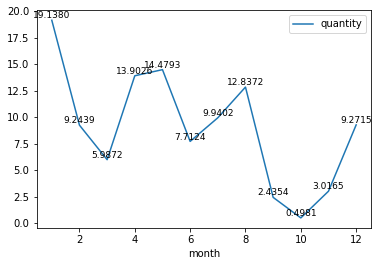

In [33]:
import matplotlib.pyplot as plt
item_02.plot(x='month', y='quantity')
for a, b in zip(item_02['month'], item_02['quantity']):
    plt.text(a, b, '%.4f' % b, ha='center', va='bottom', fontsize=9)
plt.show()

In [6]:
item_4years = [[], [], [], []]
group_4years = [group_2017, group_2018, group_2019, group_2020]
for i in range(4):
    group_year = group_4years[i]
    item0_117_allprovince = []
    for itemid in range(118):
        item = [[], [], []]
        item0_117_allprovince.append(item)
    for j in range(118):
        item = group_year[group_year['item_id'] == j]
        for k in range(3):
            item0_117_allprovince[j][k] = item[item['province_id'] == k]
    item_4years[i] = item0_117_allprovince

#print(item0_117_allprovince[1])
#print(item_4years[2])

In [ ]:
for i in item0_117_allprovince[1]:
    if i.empty == False:
        print(i)

<AxesSubplot:xlabel='month'>

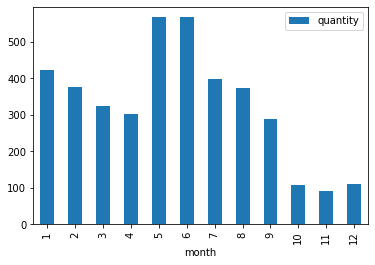

In [38]:
item_4years[0][1][0].plot(x='month', y='quantity', kind='bar')

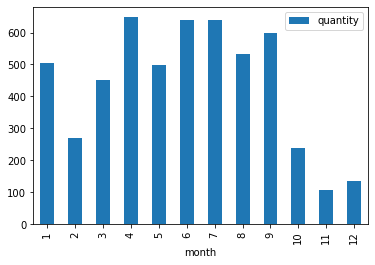

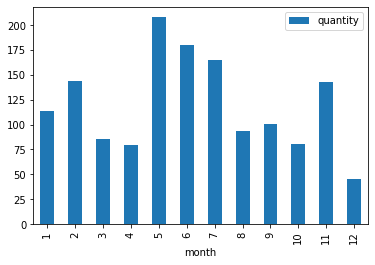

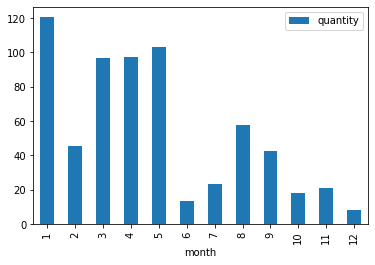

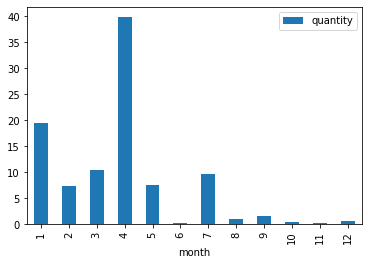

In [9]:
for i in range(4):
    item_4years[i][54][2].plot(x='month', y='quantity', kind='bar')   # 第二个表示item_id, 第三个表示province_id

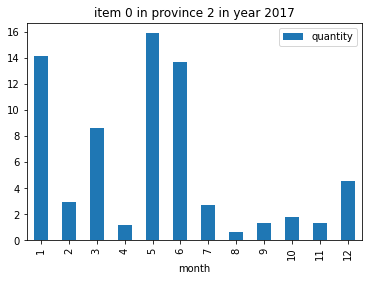

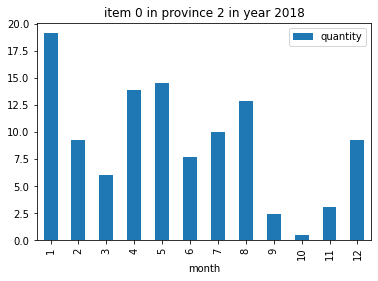

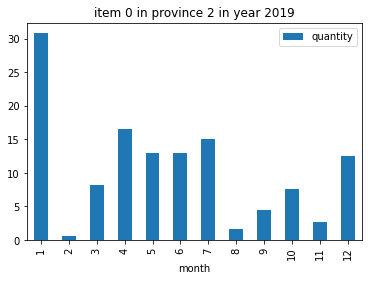

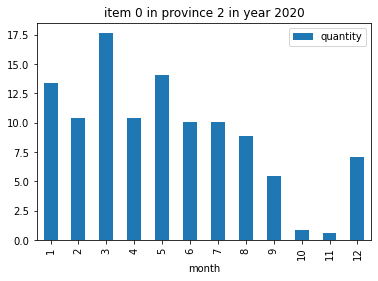

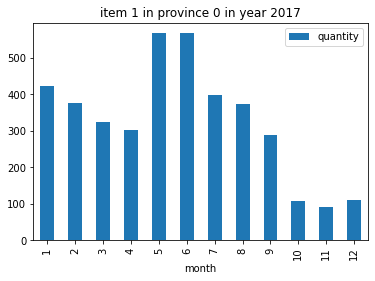

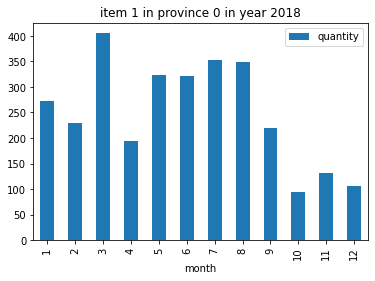

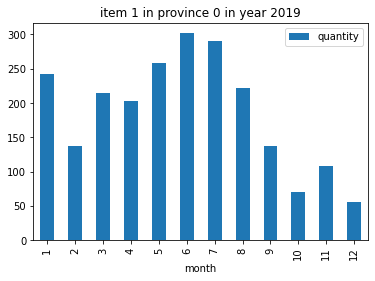

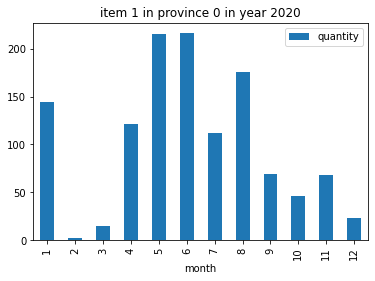

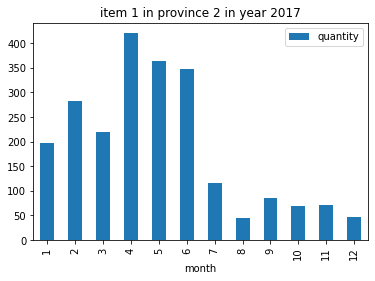

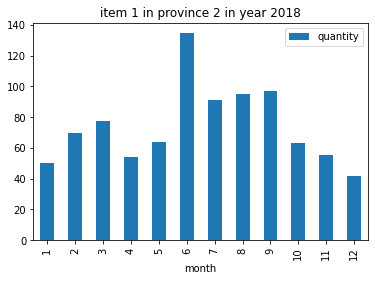

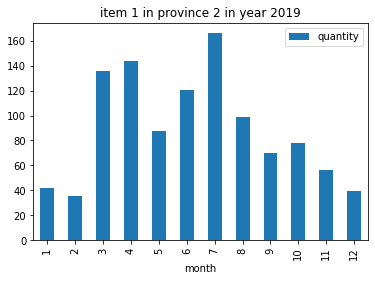

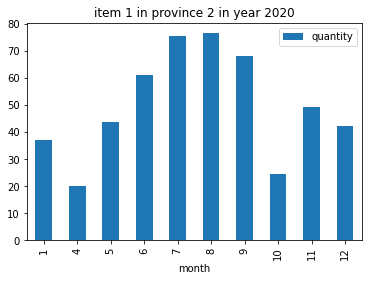

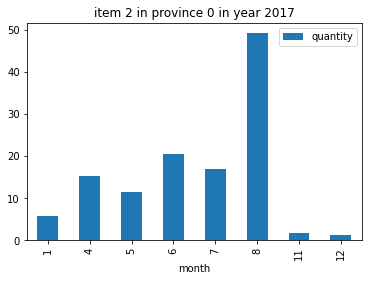

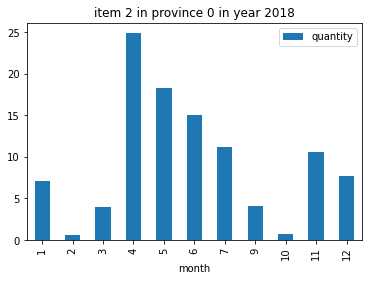

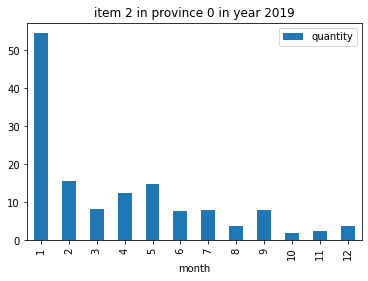

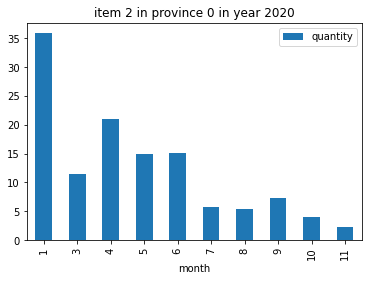

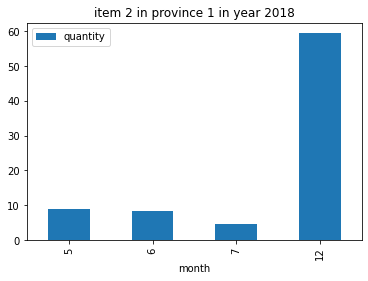

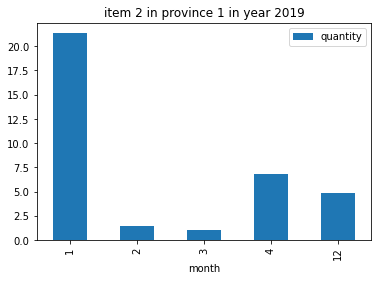

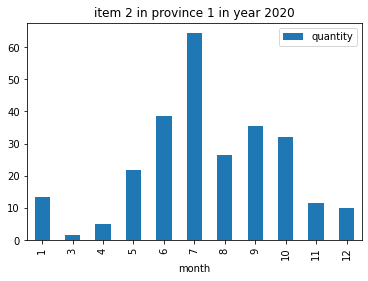

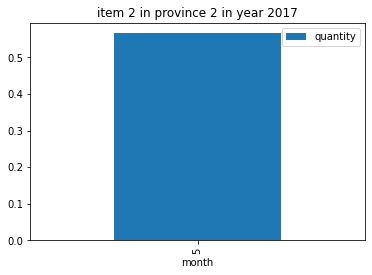

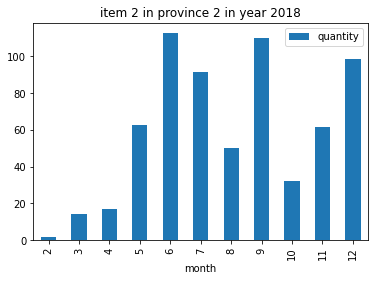

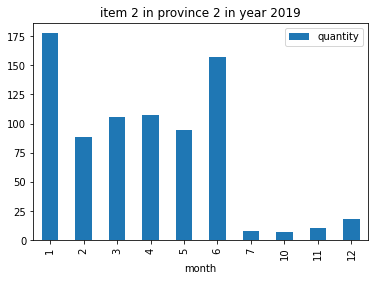

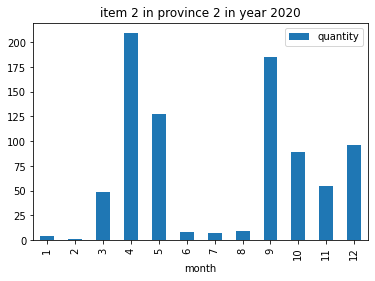

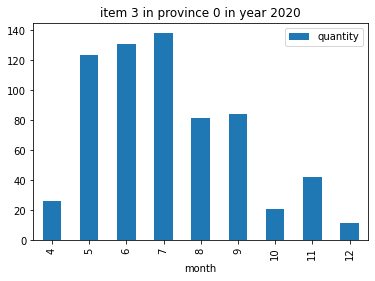

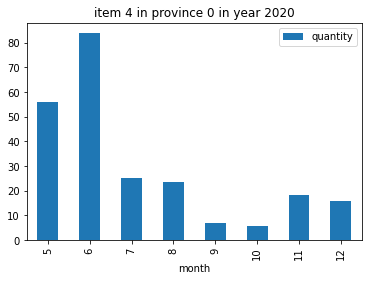

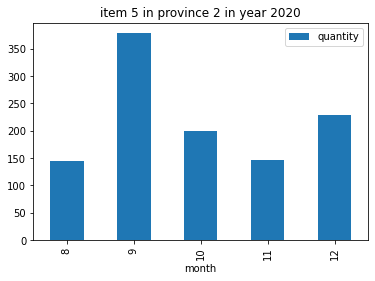

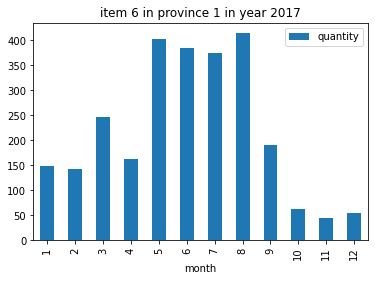

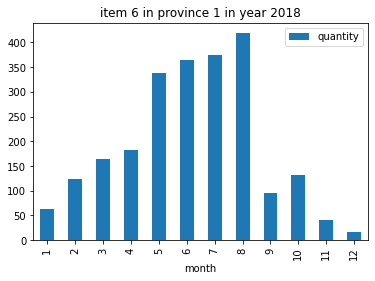

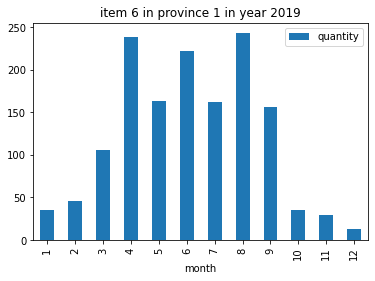

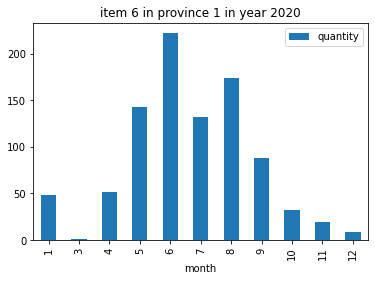

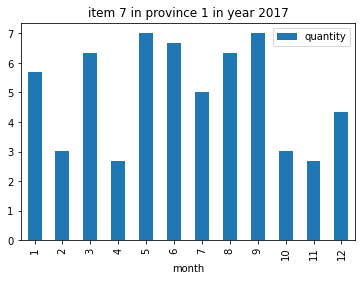

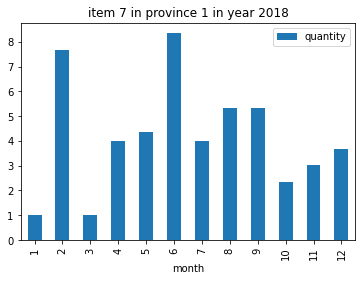

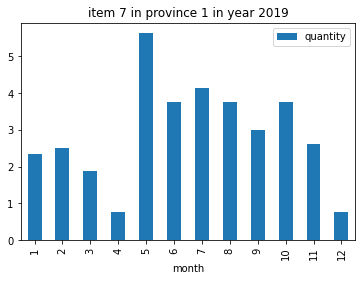

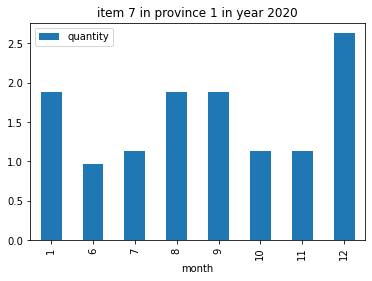

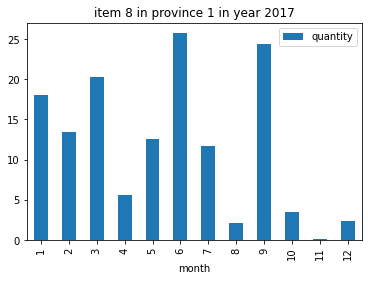

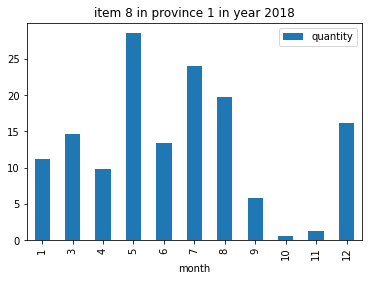

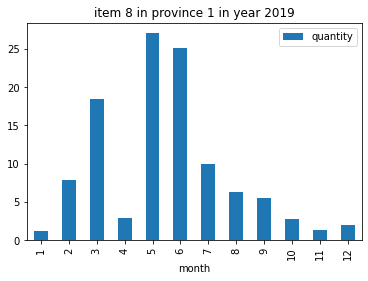

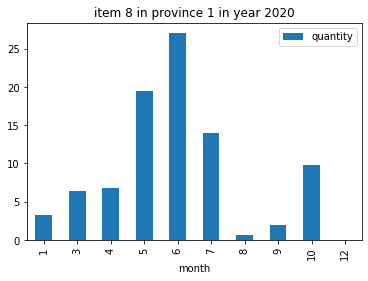

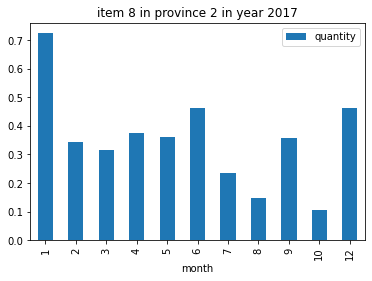

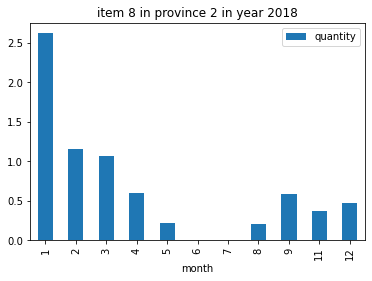

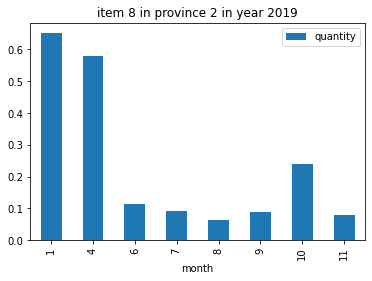

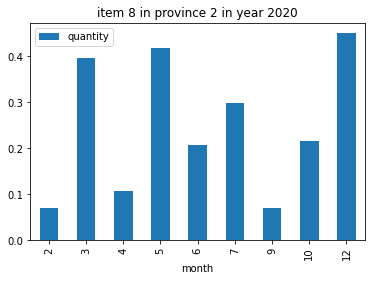

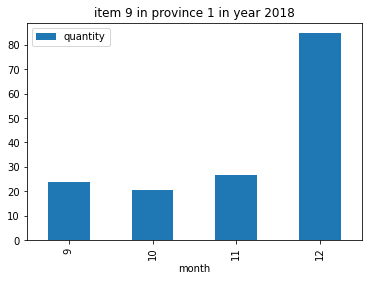

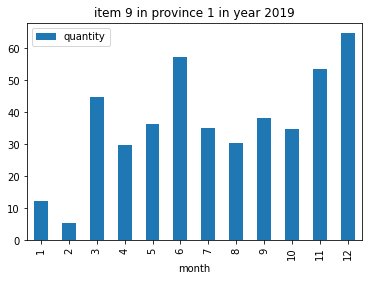

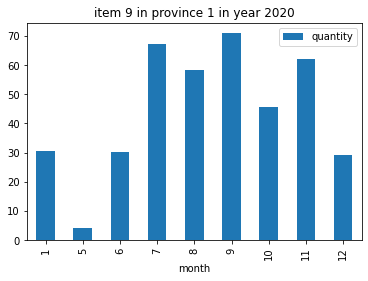

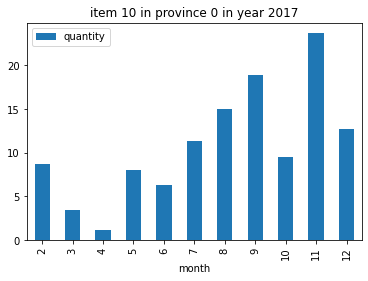

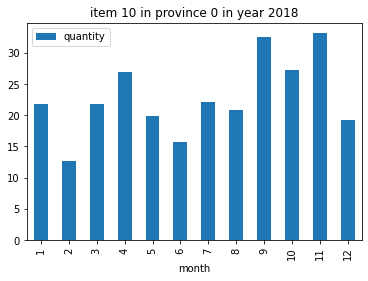

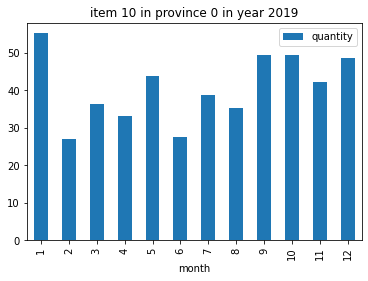

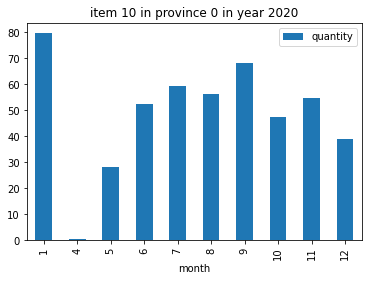

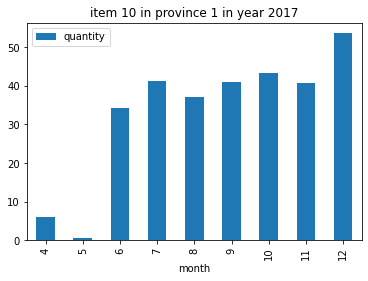

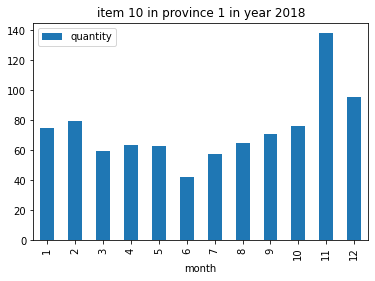

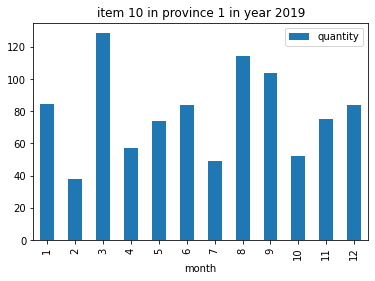

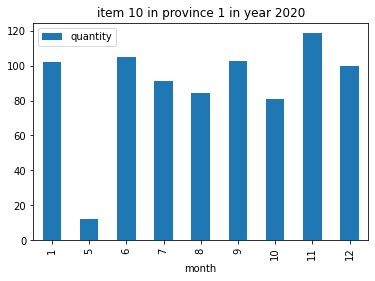

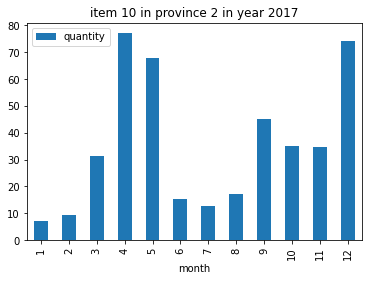

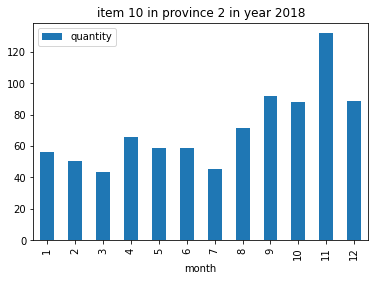

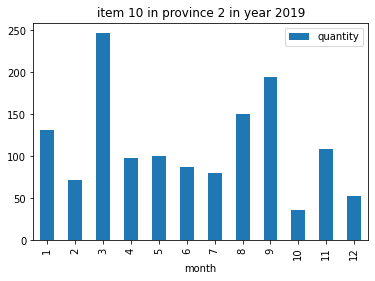

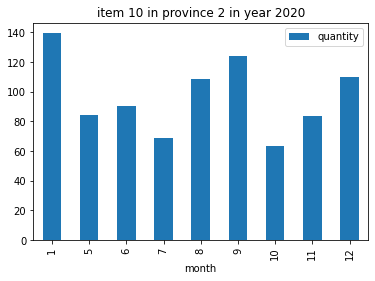

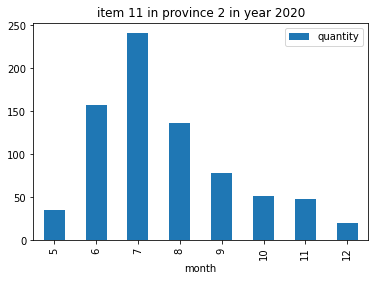

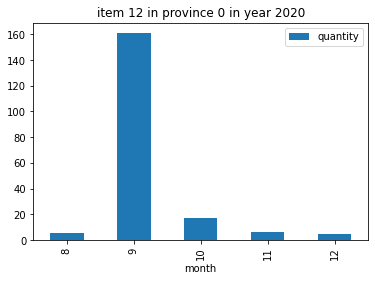

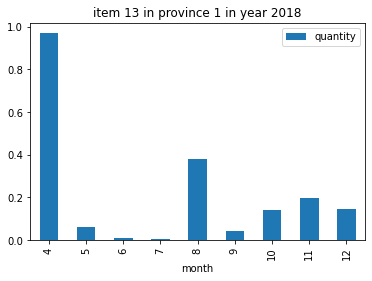

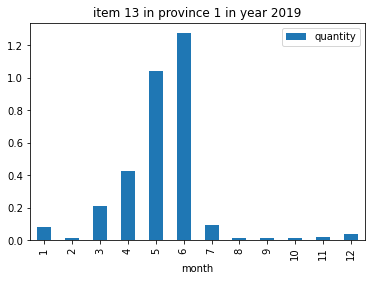

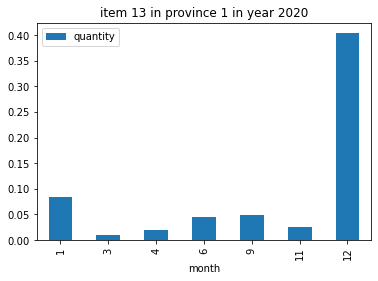

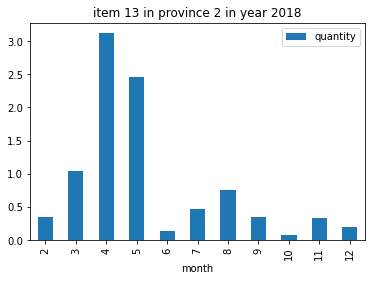

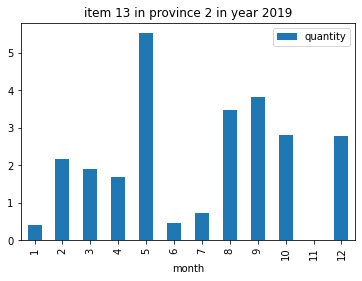

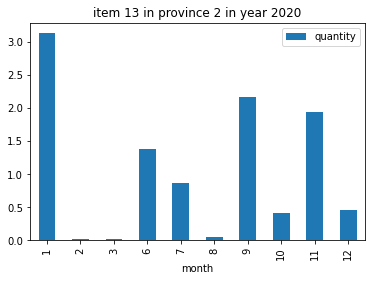

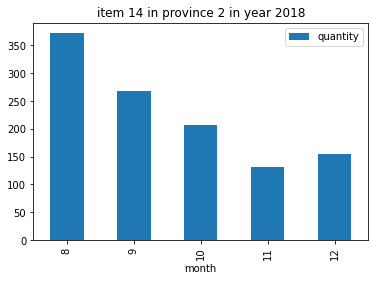

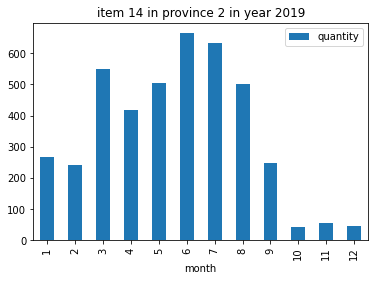

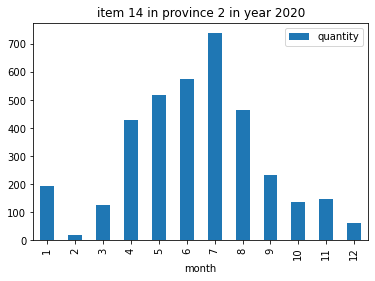

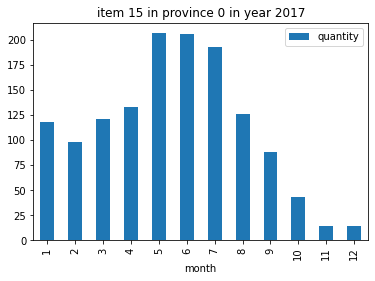

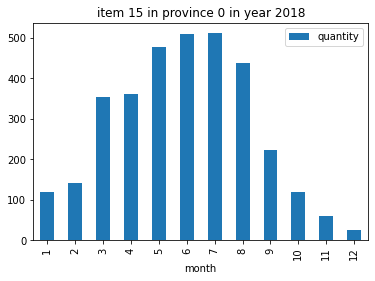

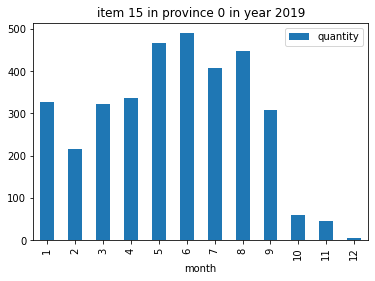

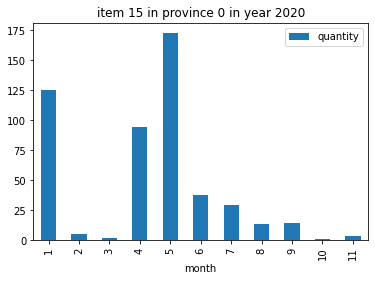

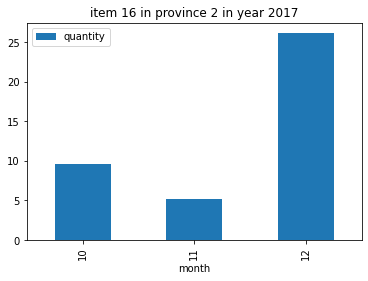

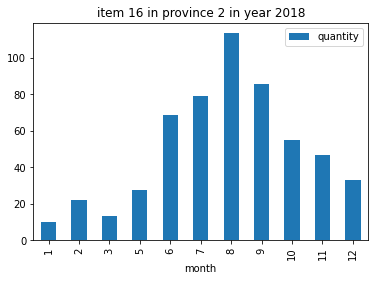

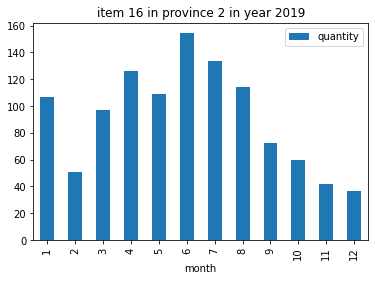

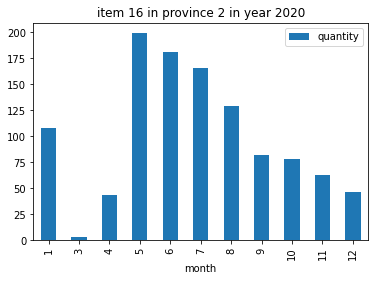

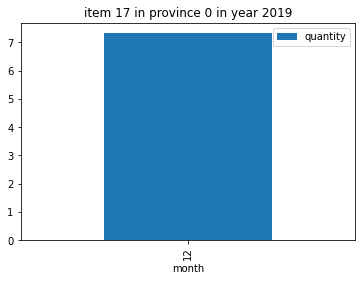

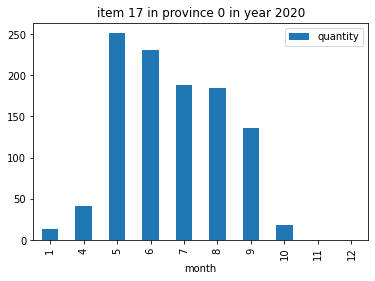

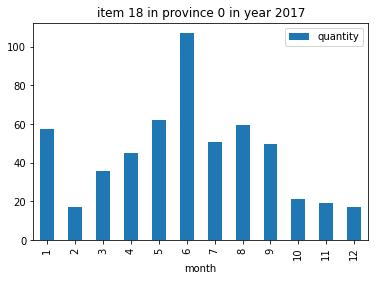

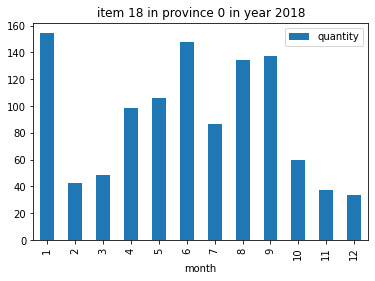

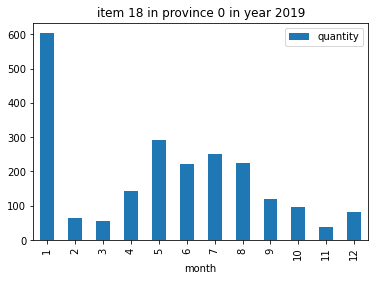

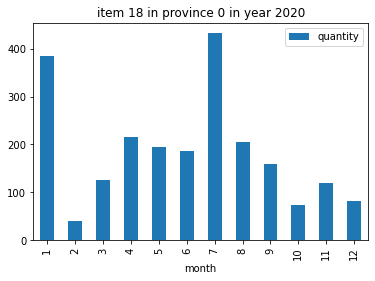

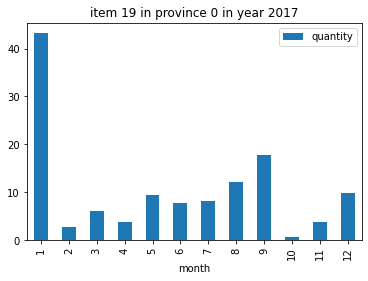

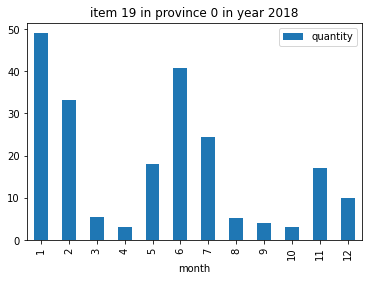

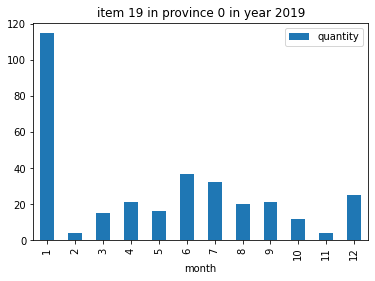

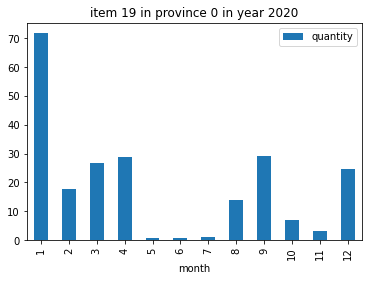

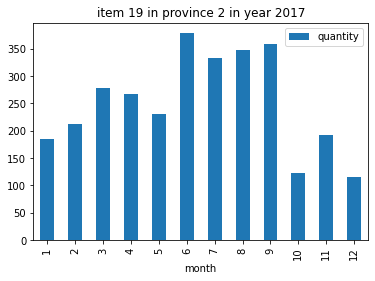

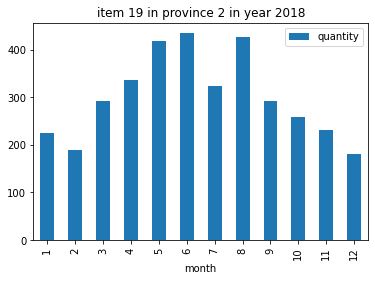

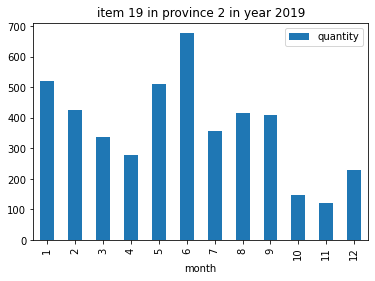

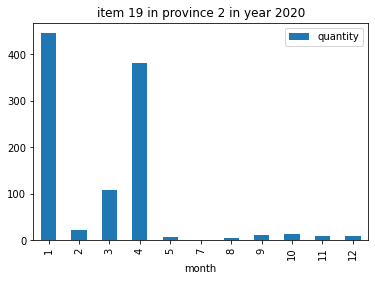

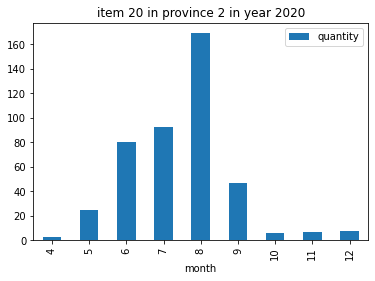

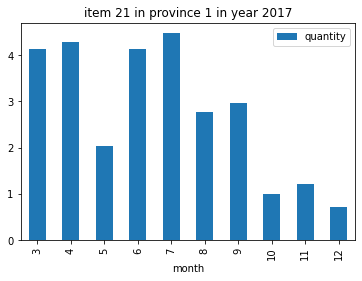

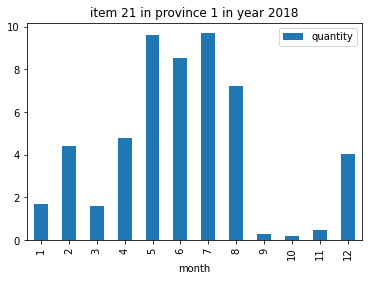

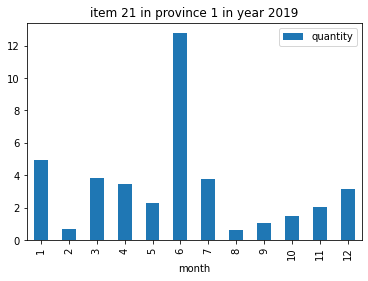

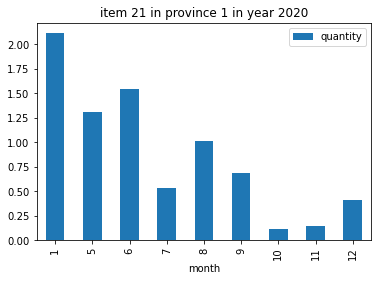

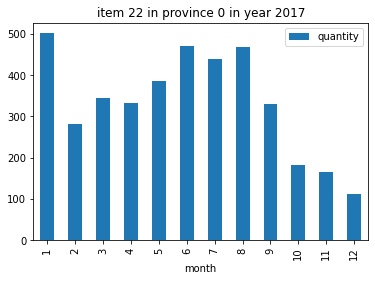

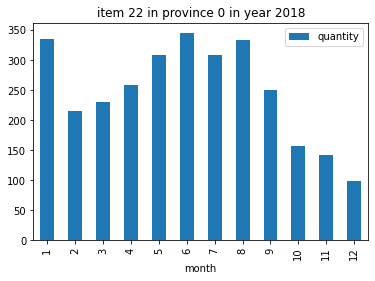

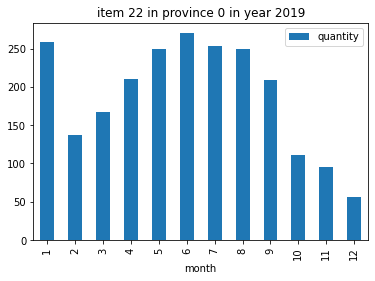

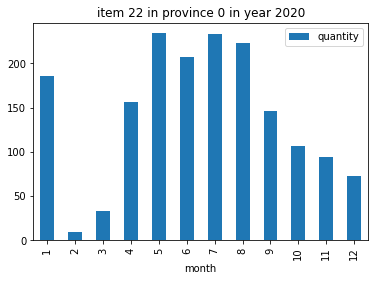

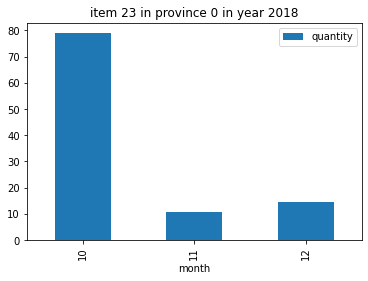

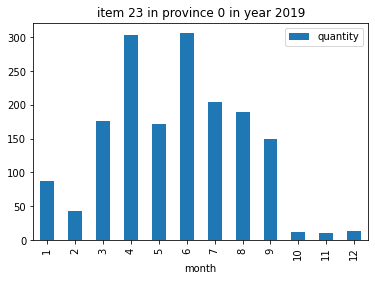

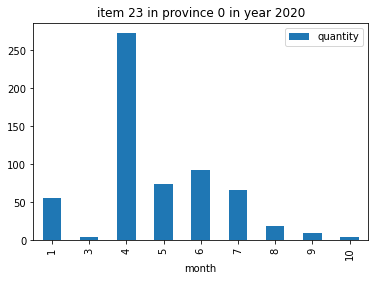

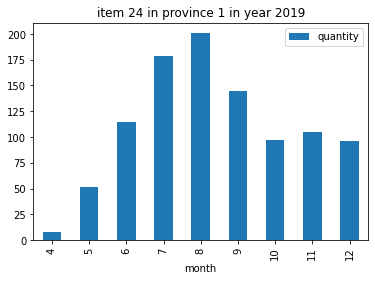

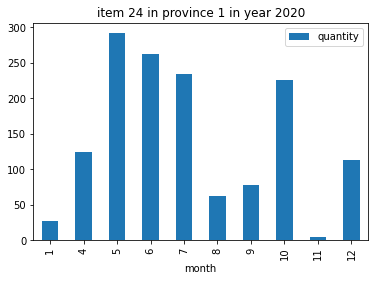

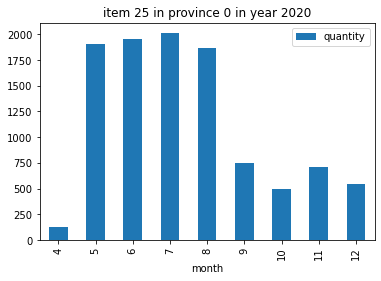

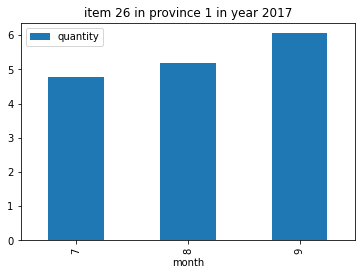

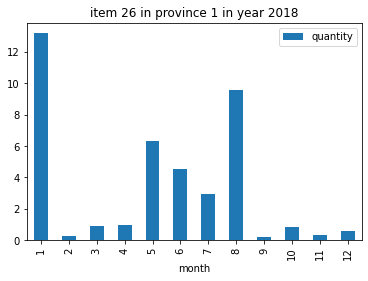

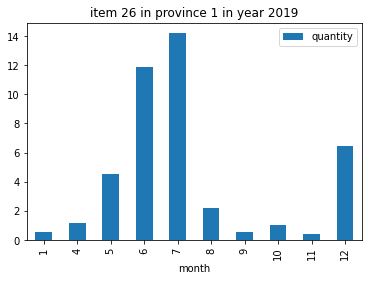

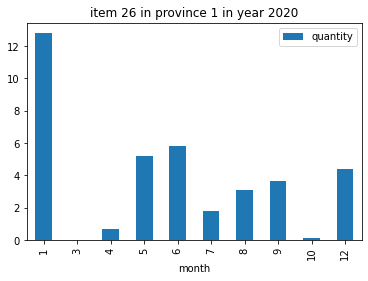

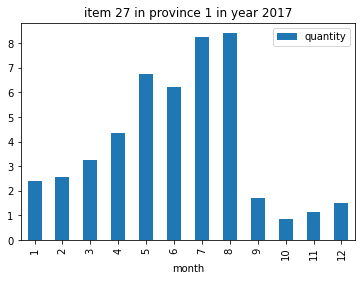

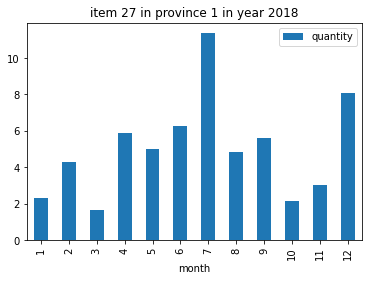

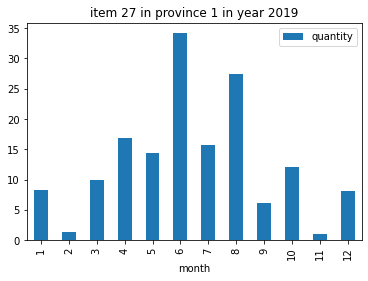

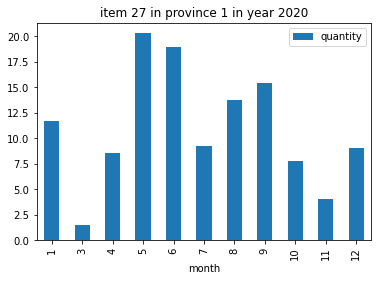

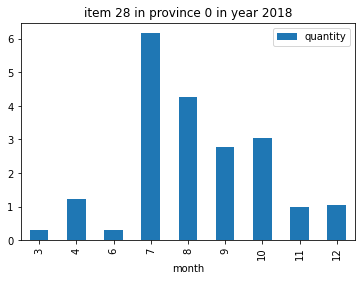

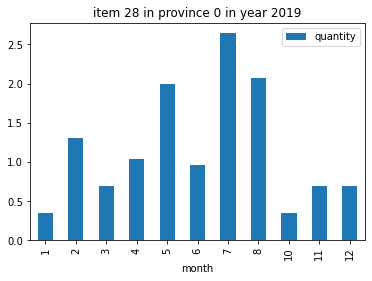

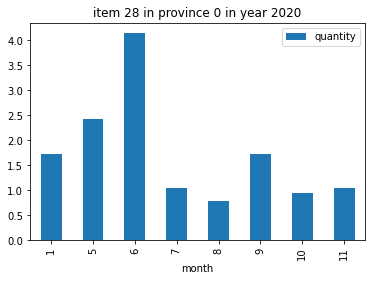

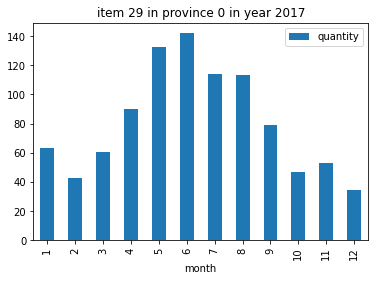

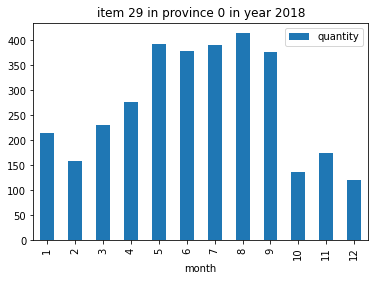

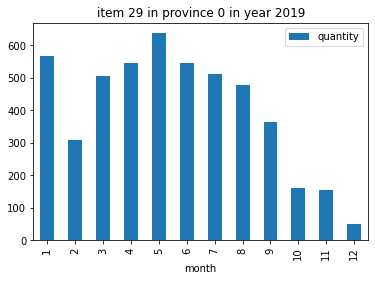

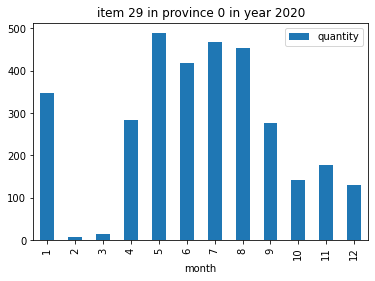

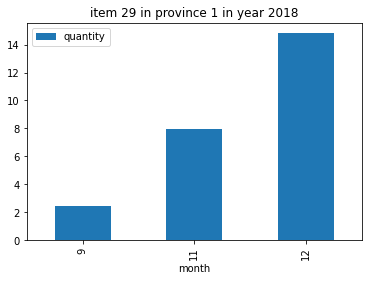

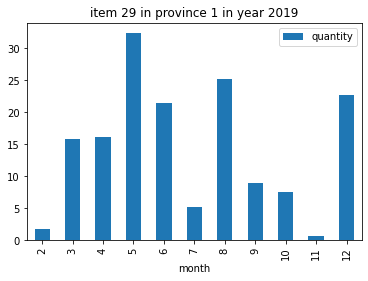

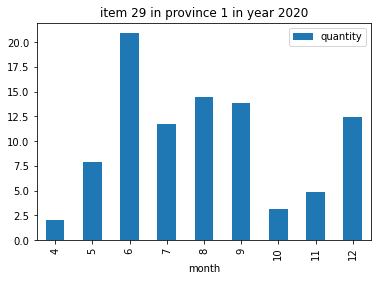

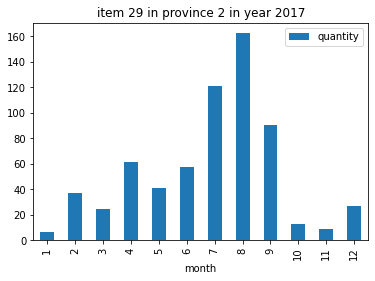

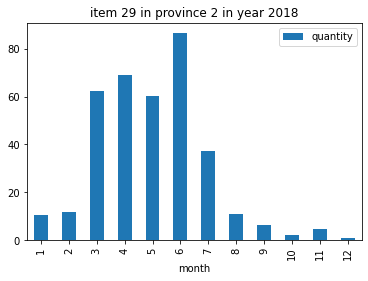

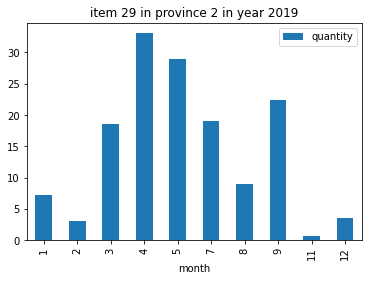

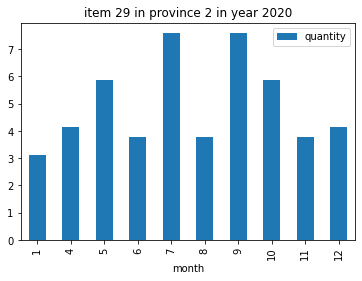

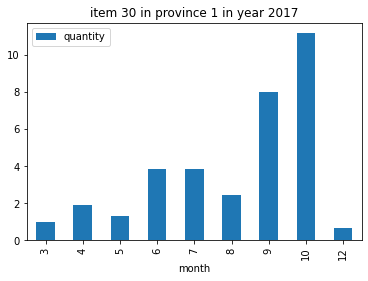

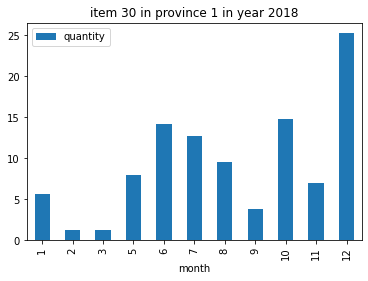

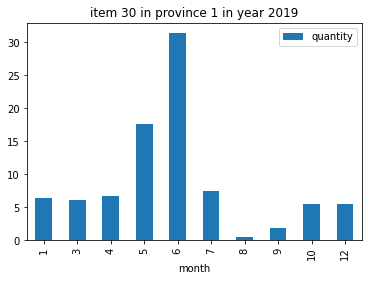

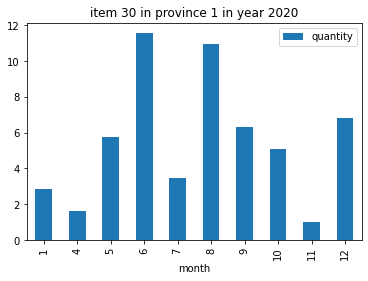

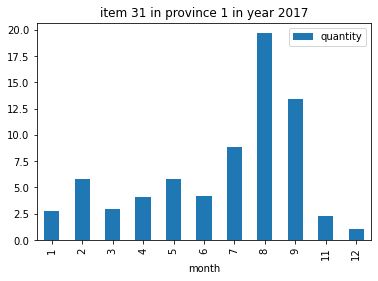

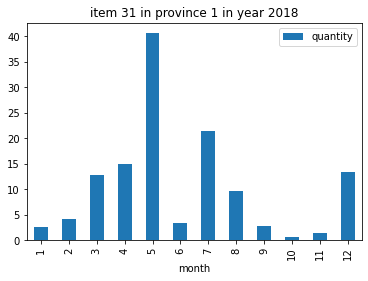

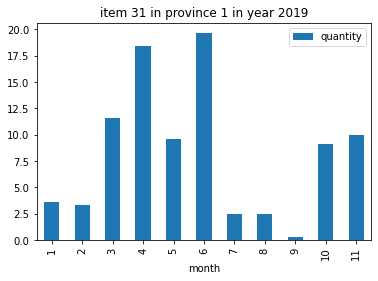

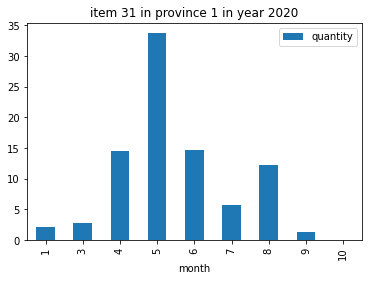

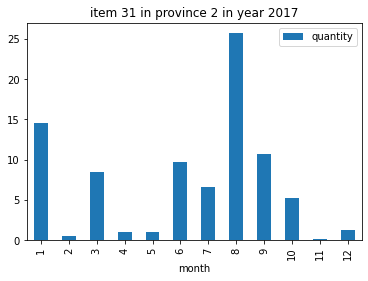

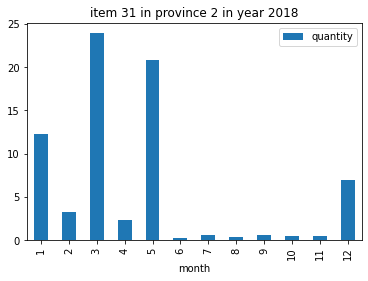

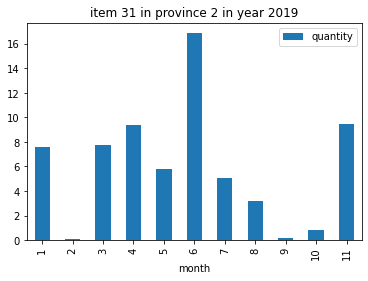

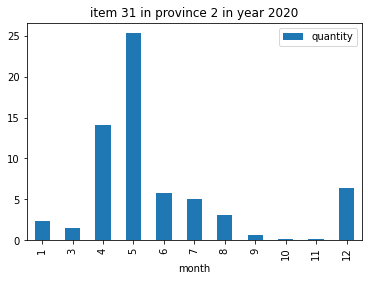

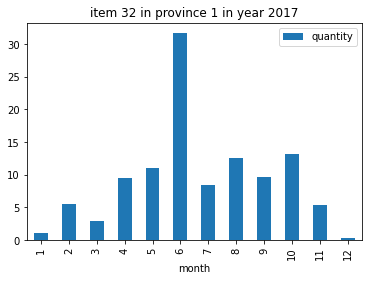

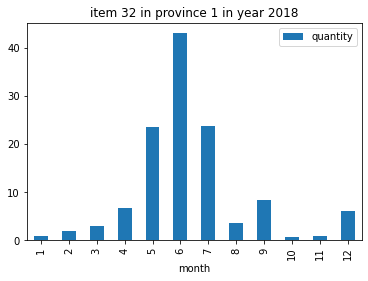

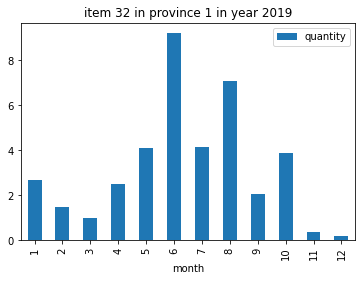

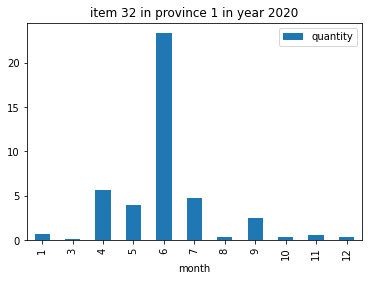

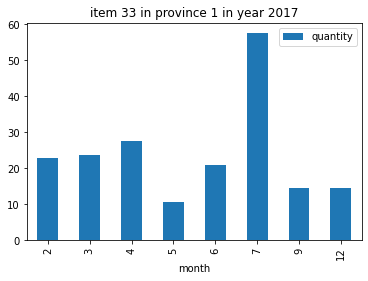

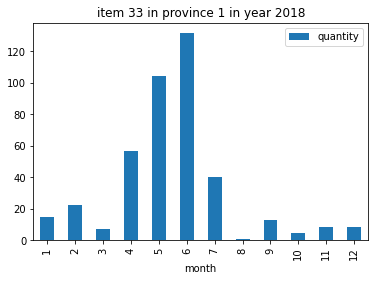

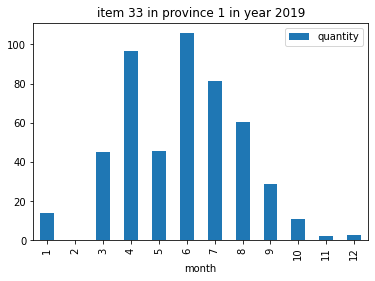

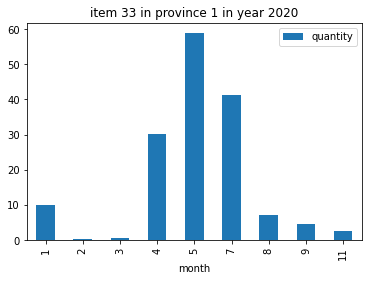

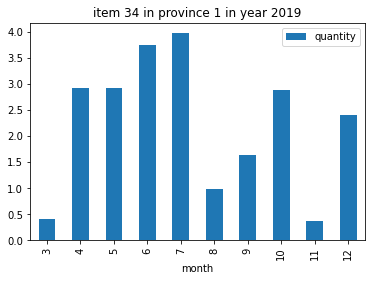

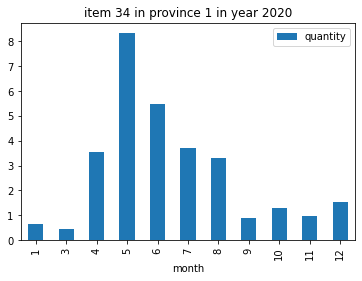

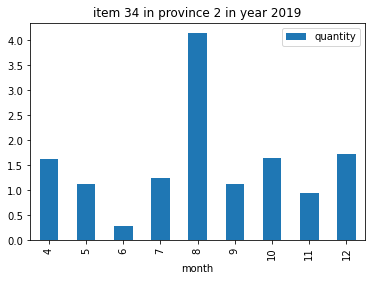

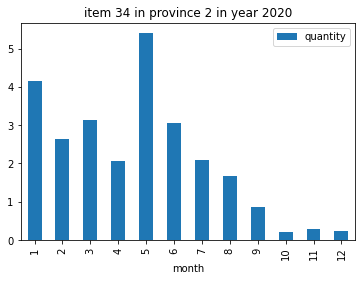

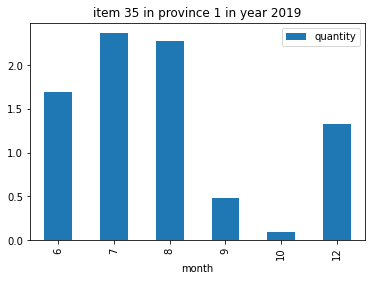

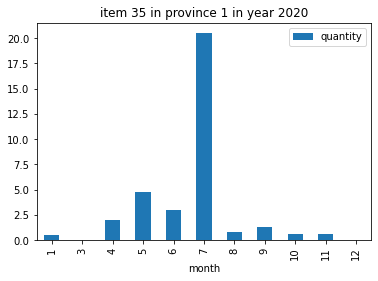

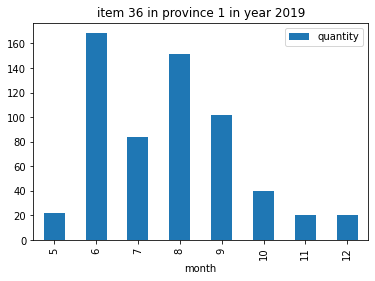

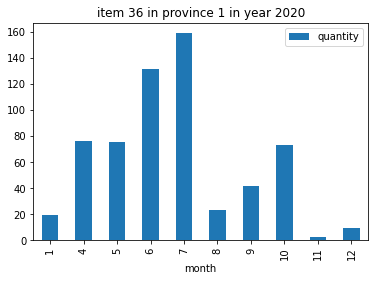

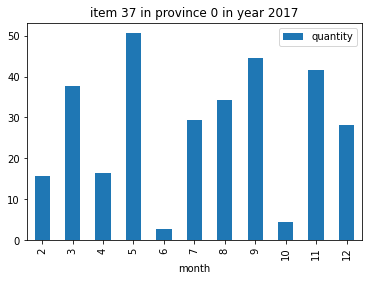

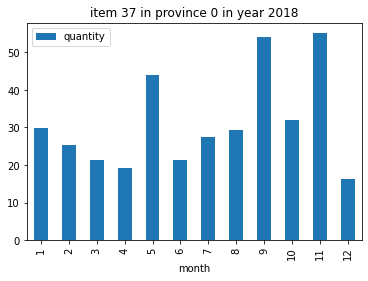

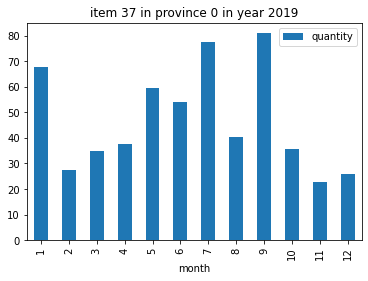

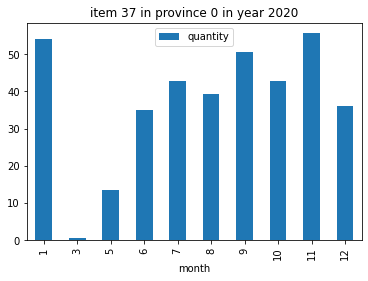

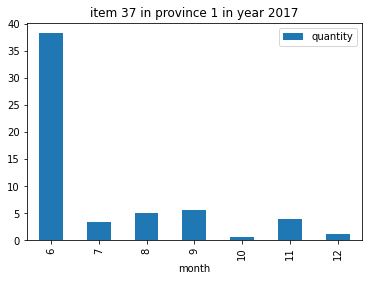

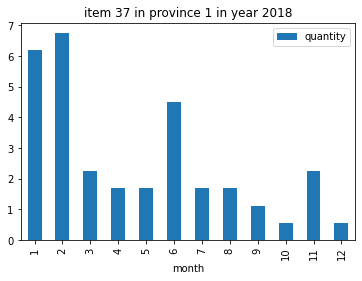

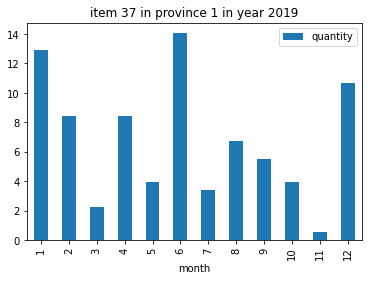

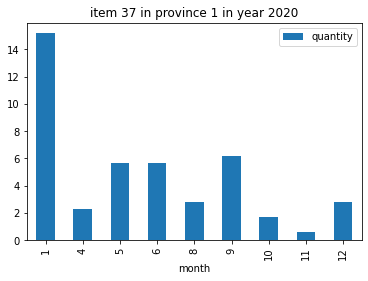

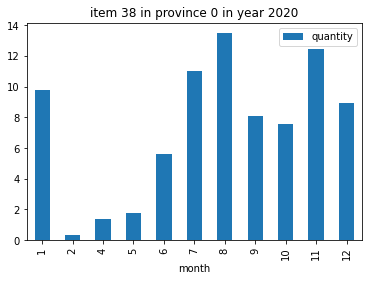

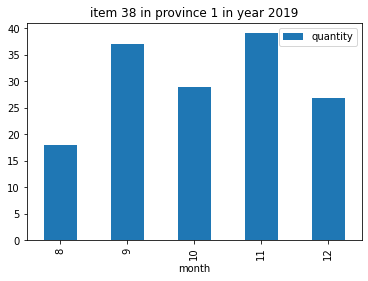

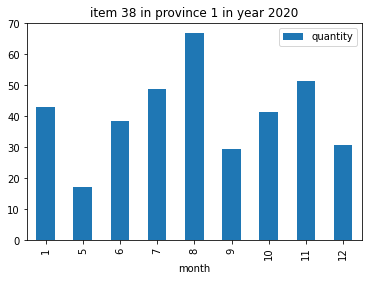

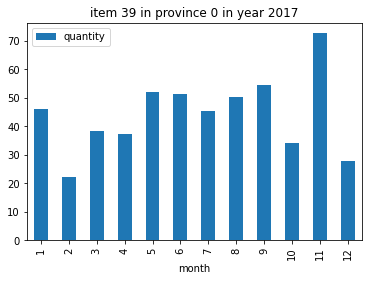

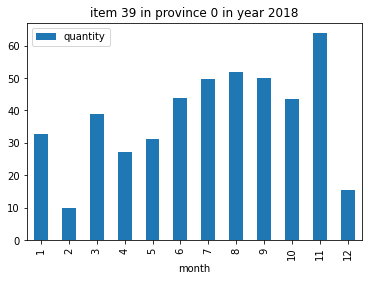

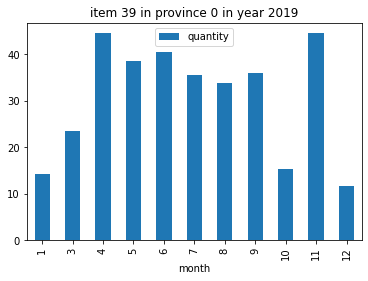

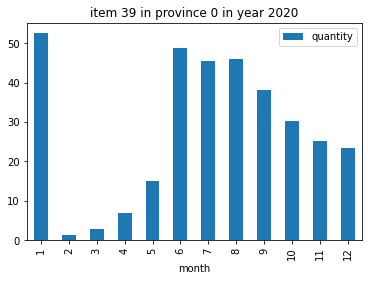

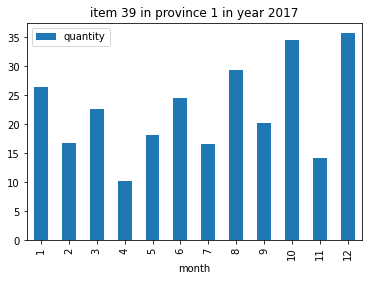

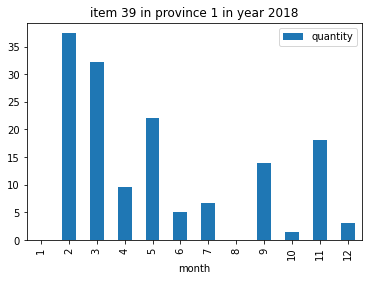

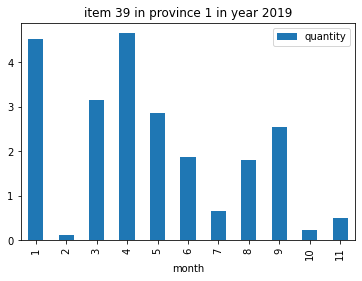

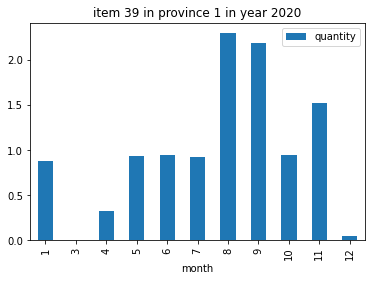

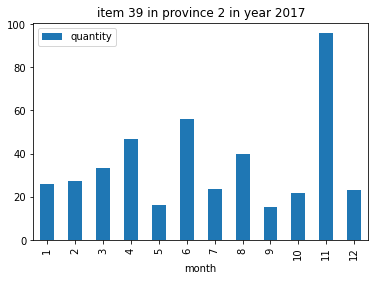

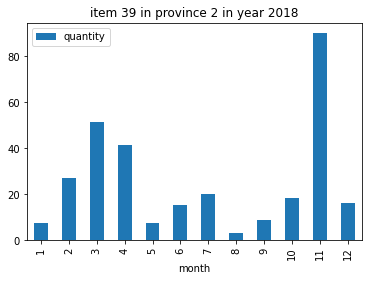

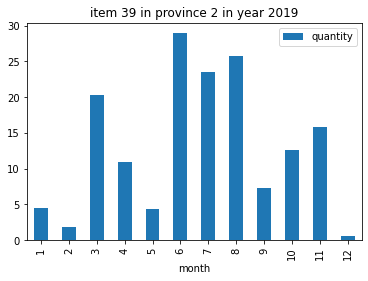

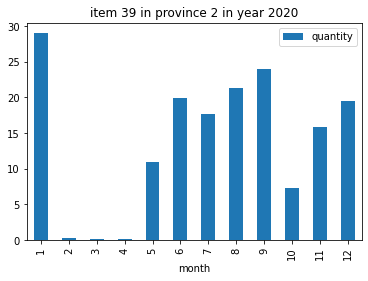

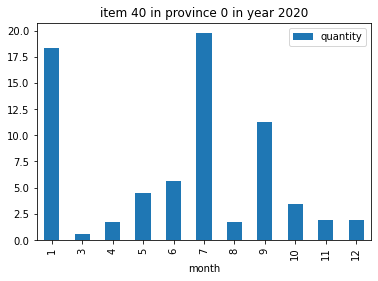

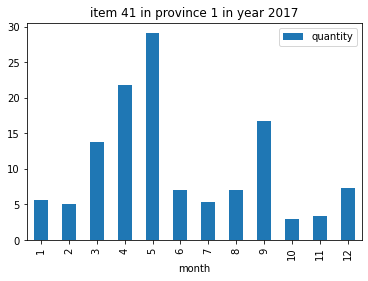

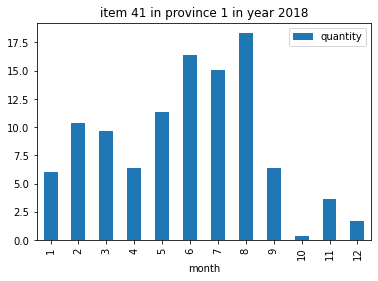

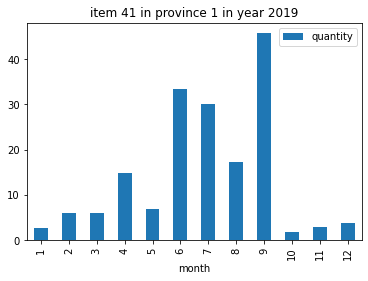

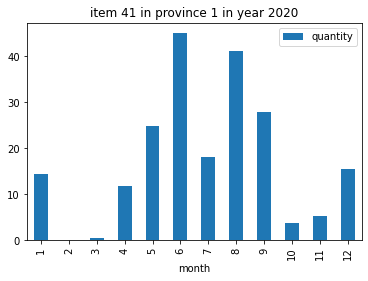

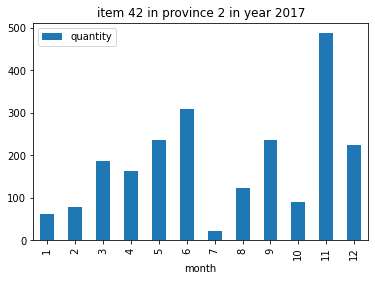

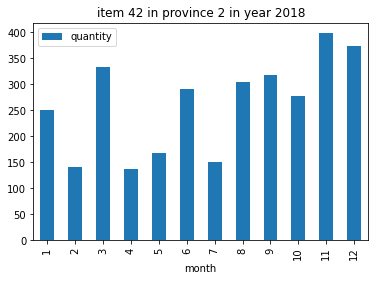

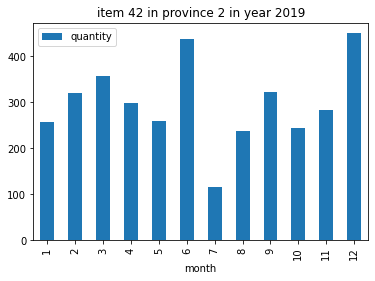

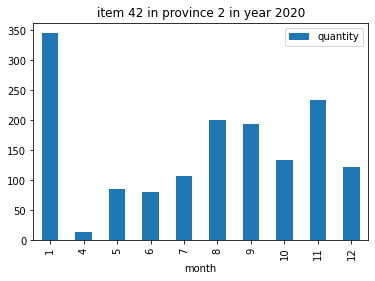

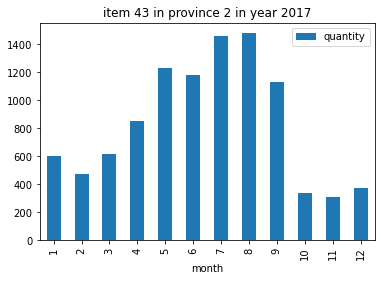

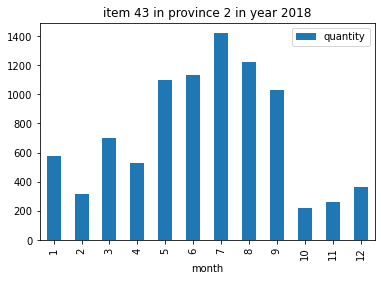

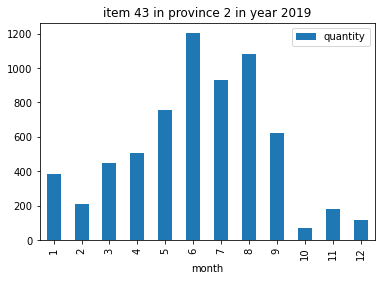

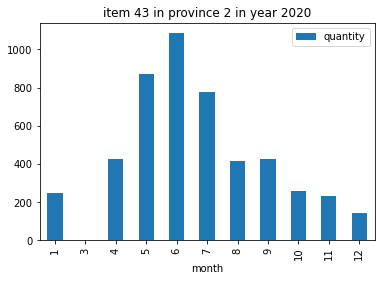

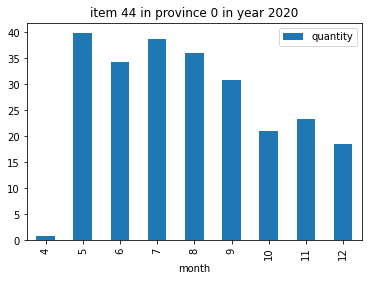

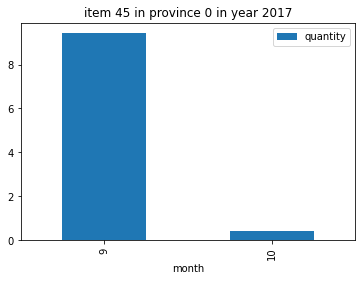

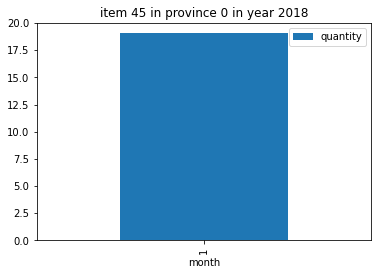

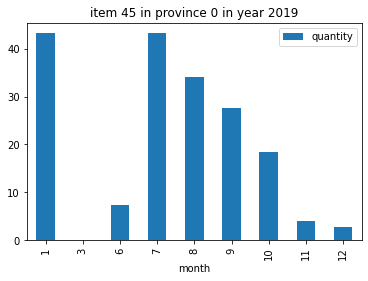

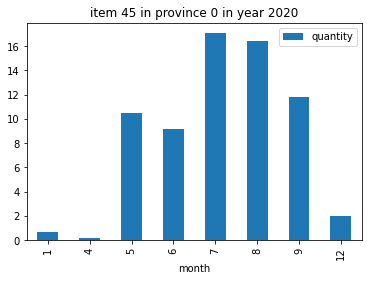

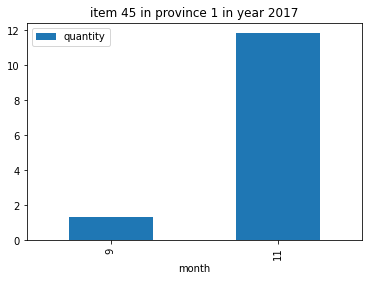

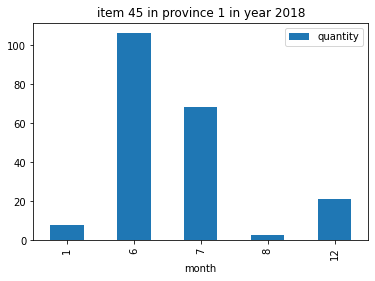

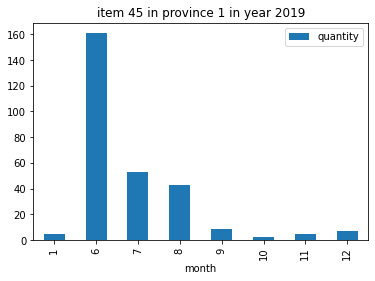

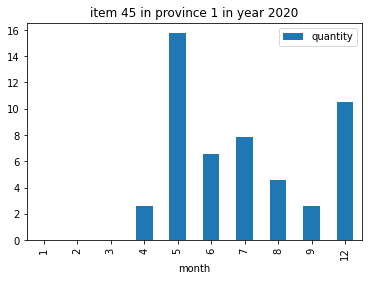

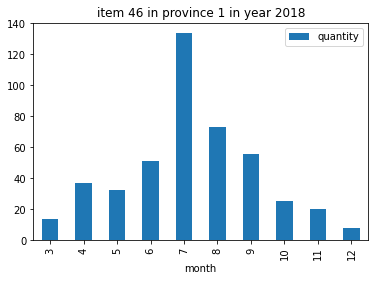

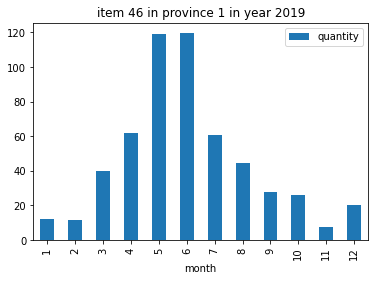

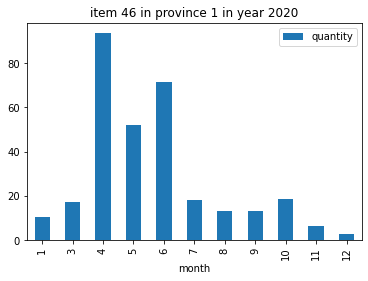

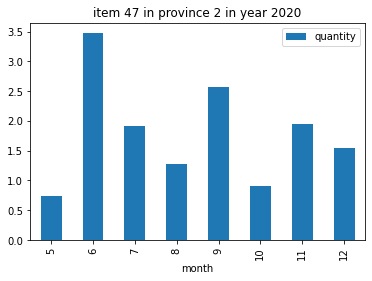

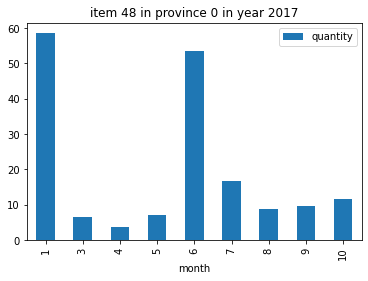

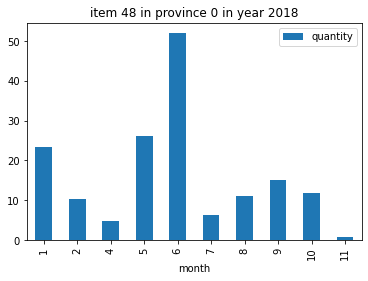

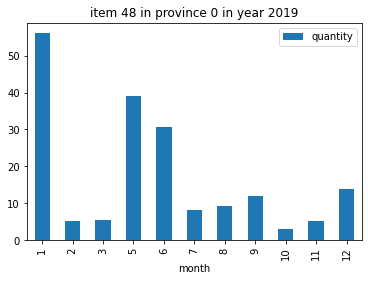

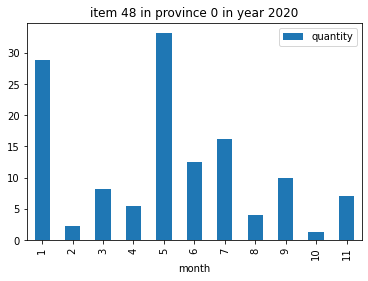

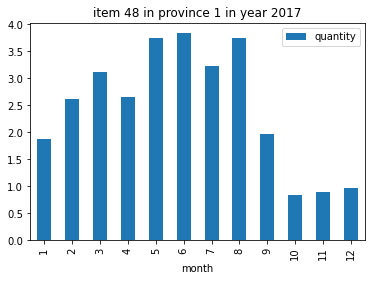

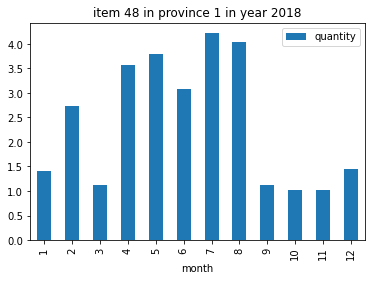

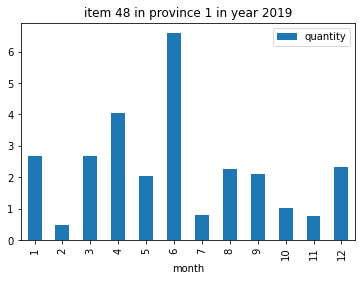

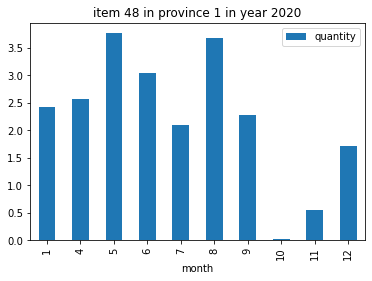

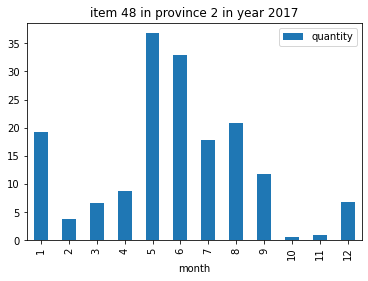

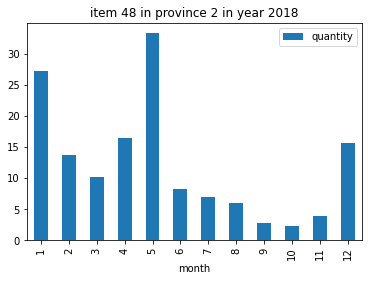

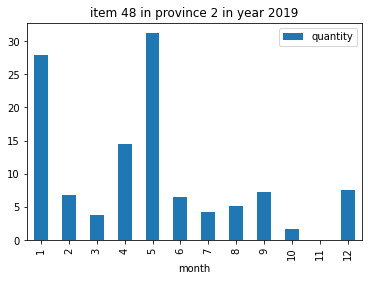

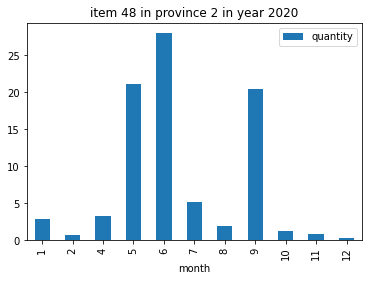

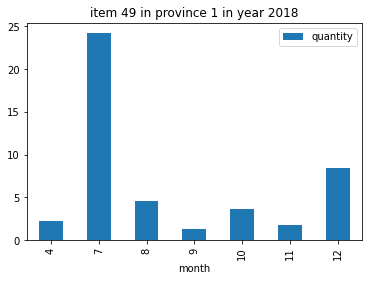

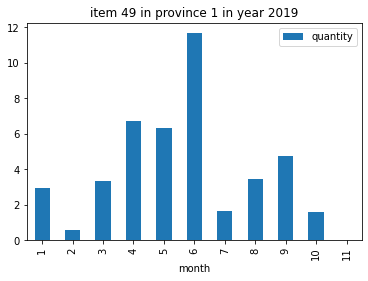

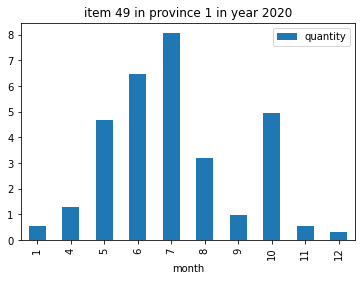

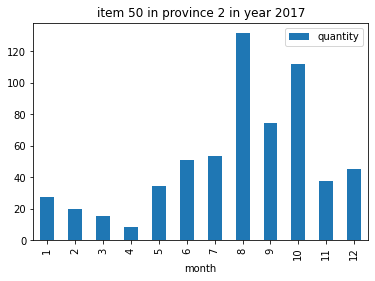

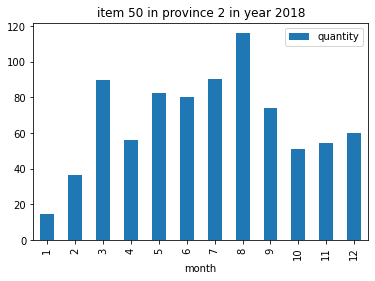

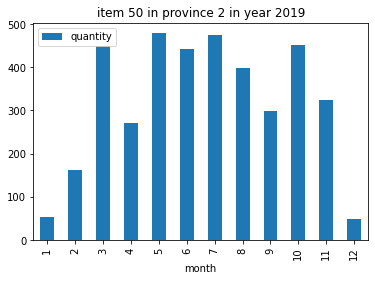

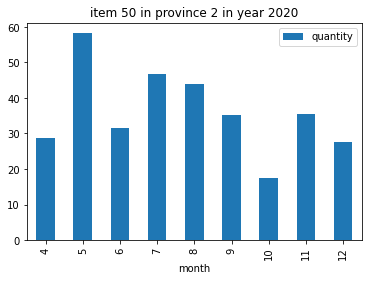

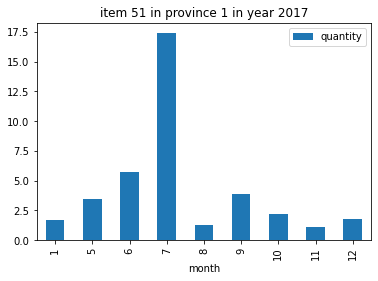

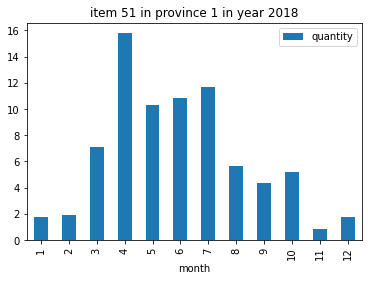

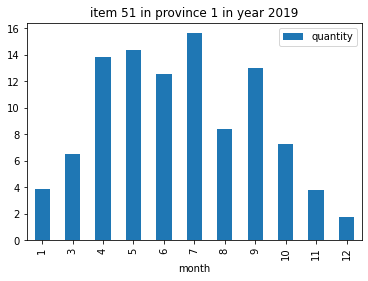

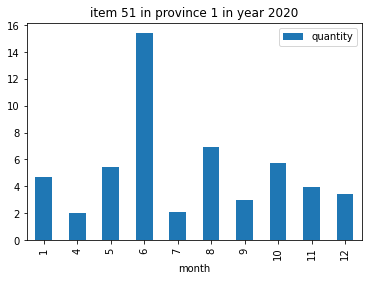

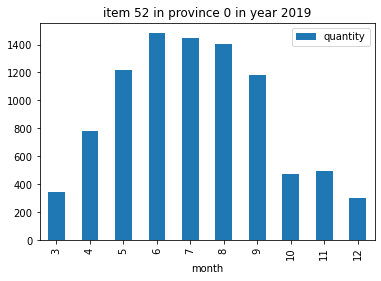

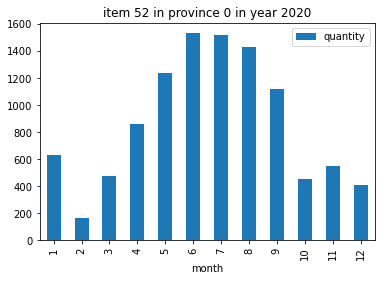

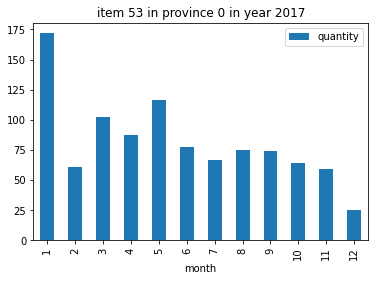

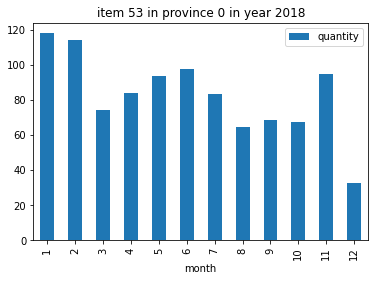

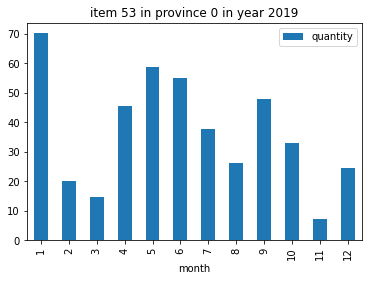

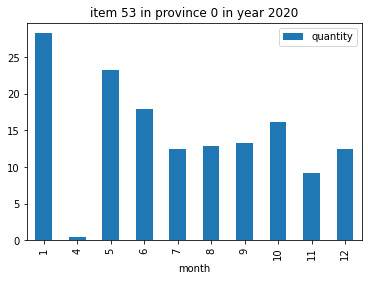

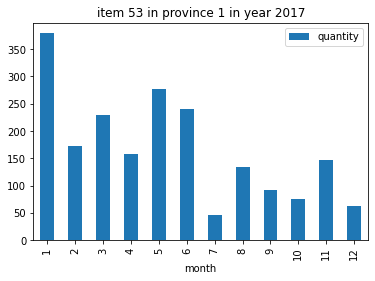

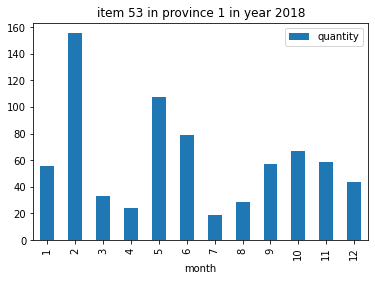

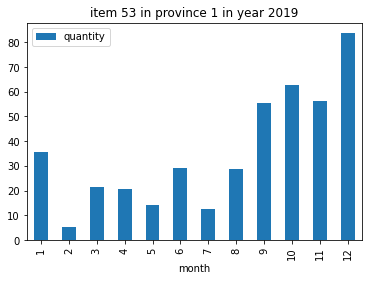

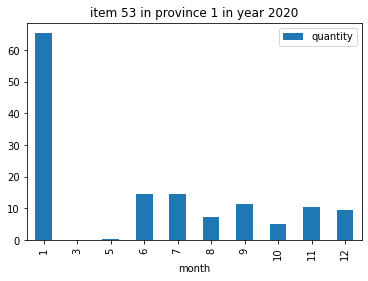

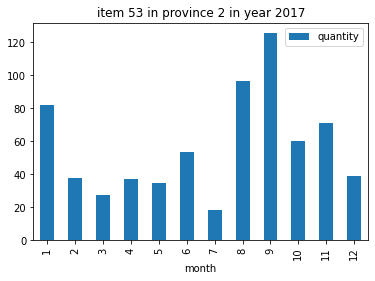

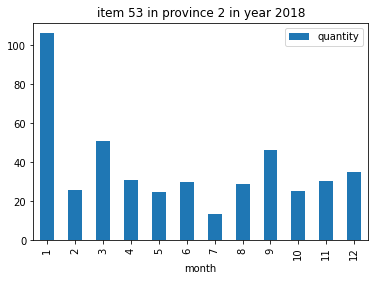

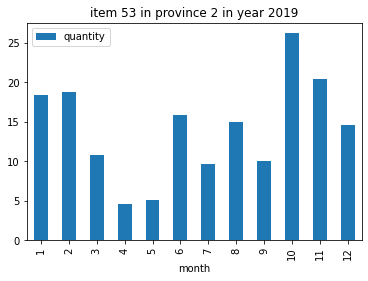

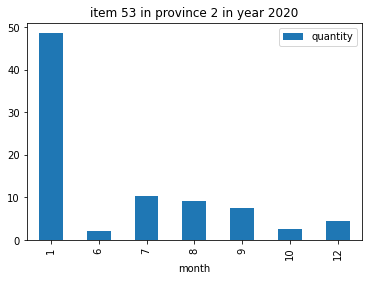

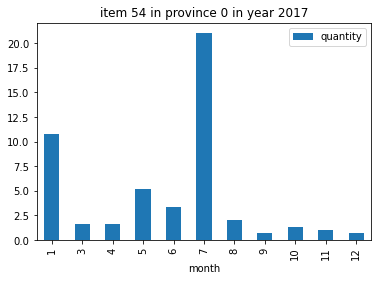

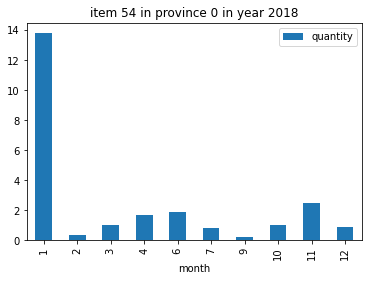

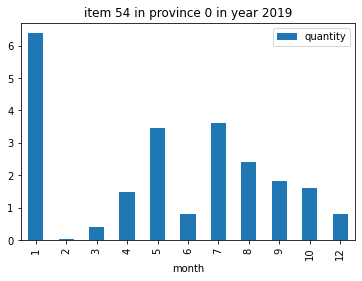

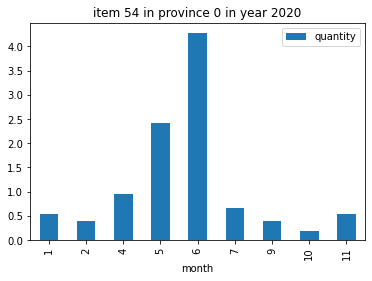

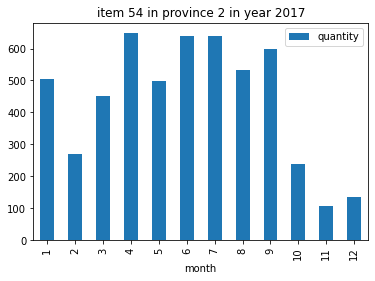

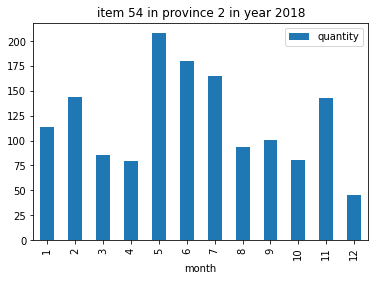

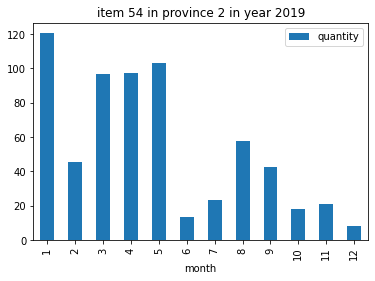

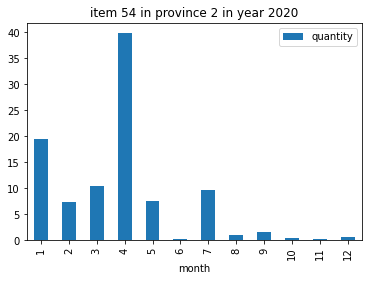

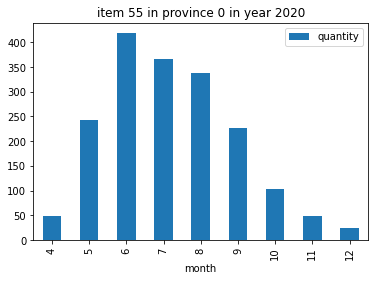

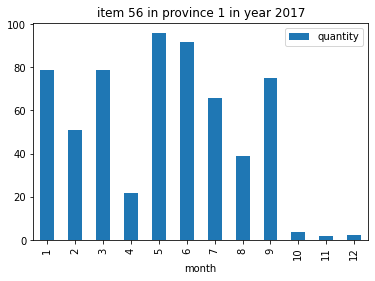

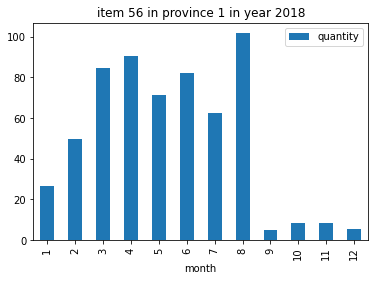

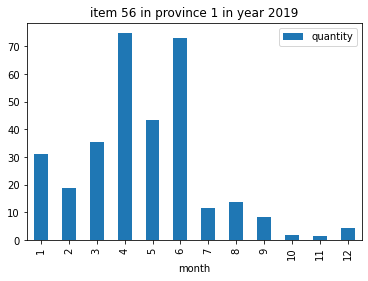

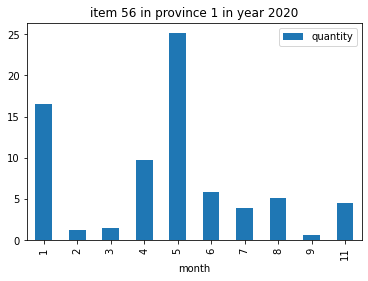

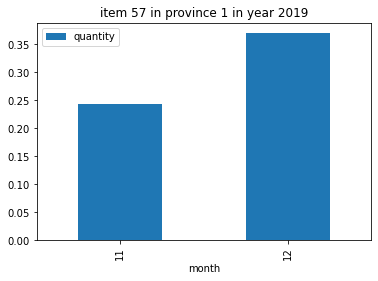

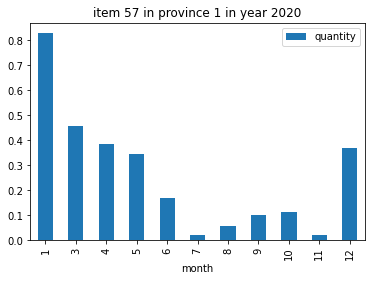

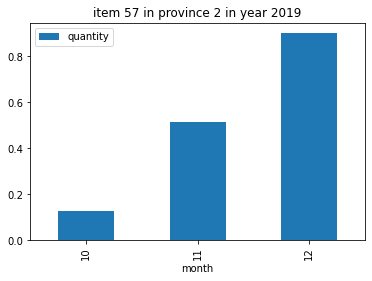

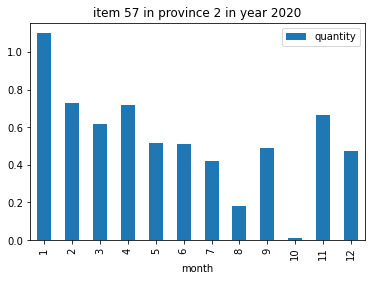

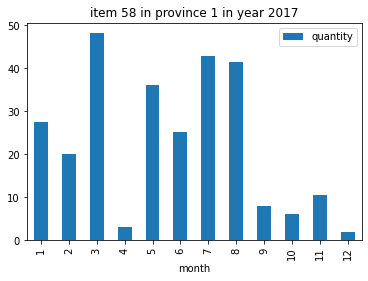

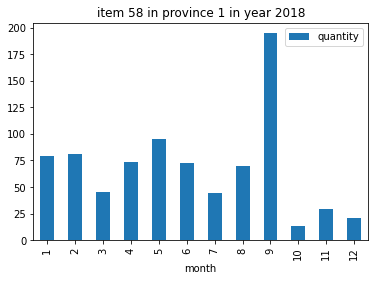

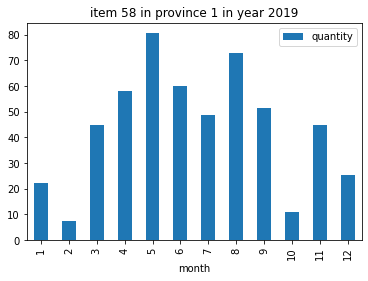

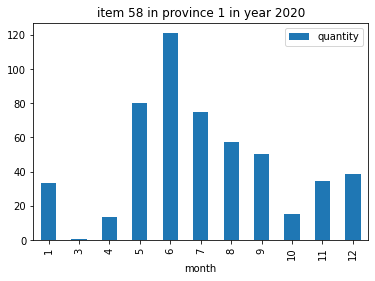

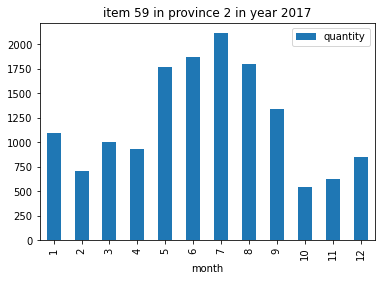

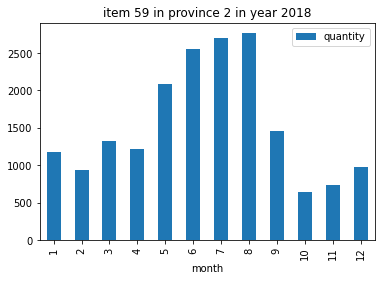

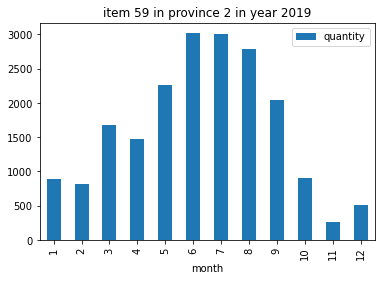

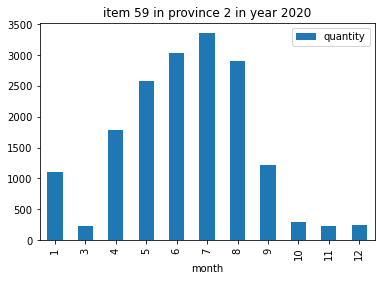

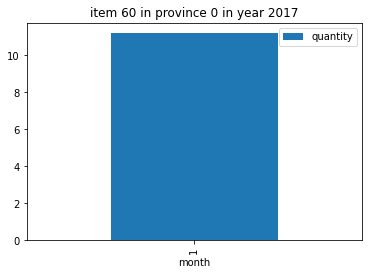

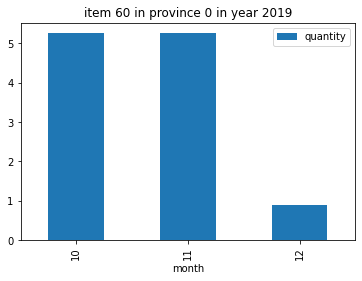

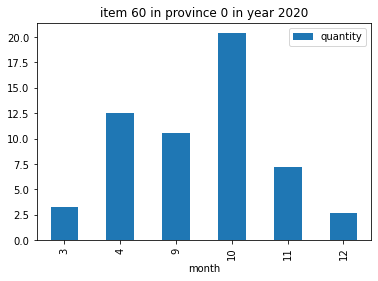

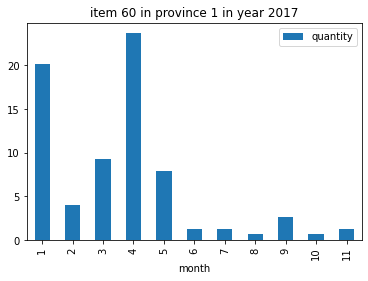

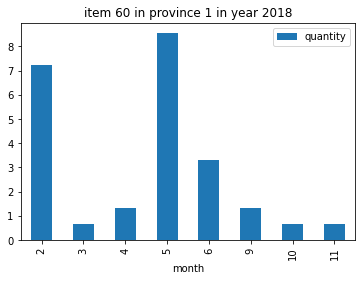

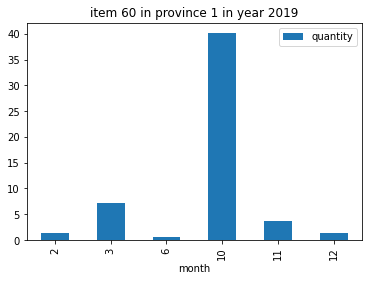

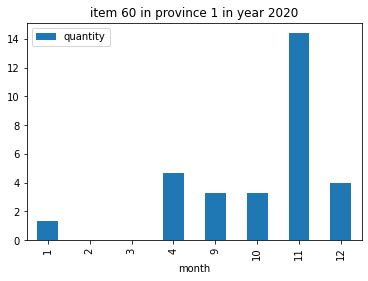

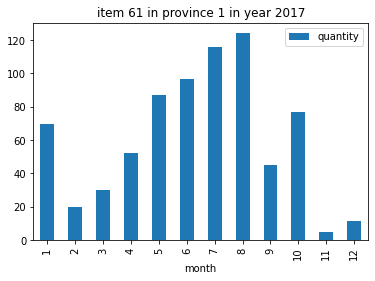

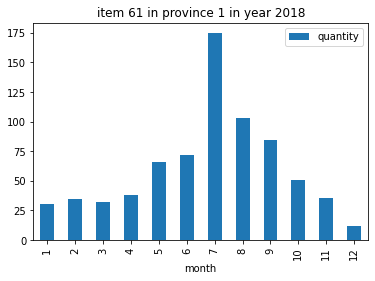

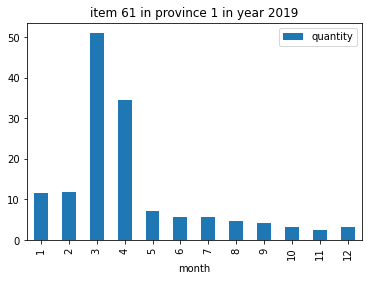

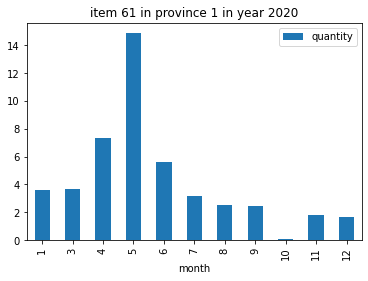

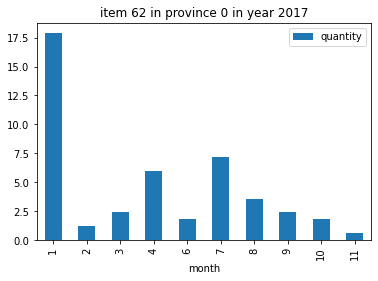

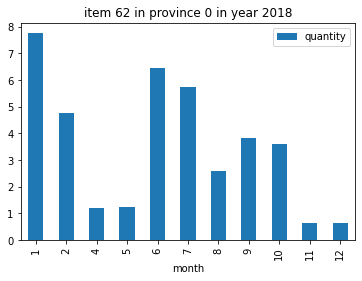

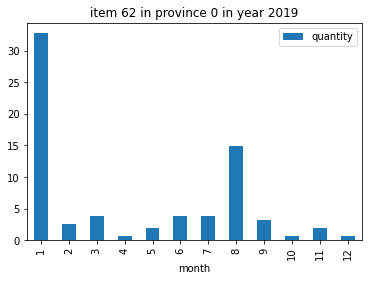

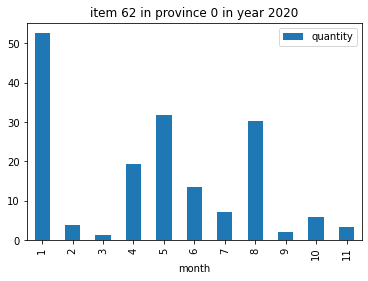

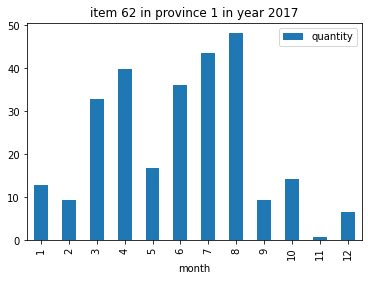

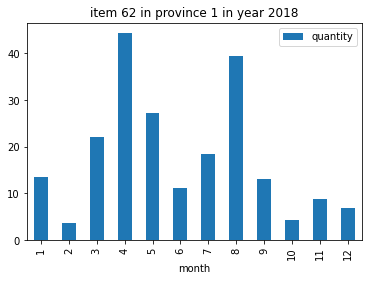

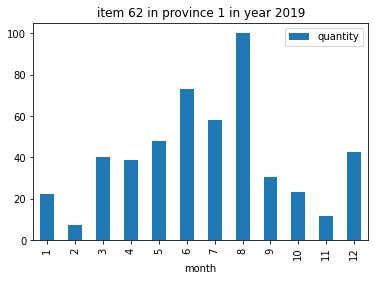

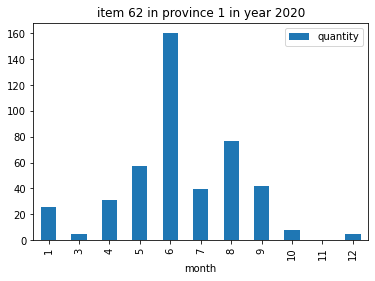

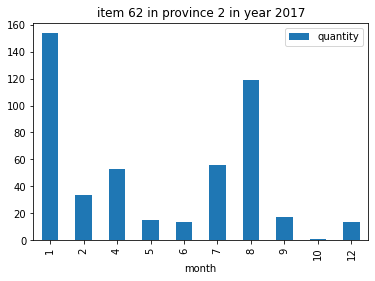

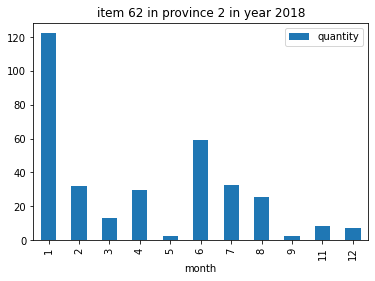

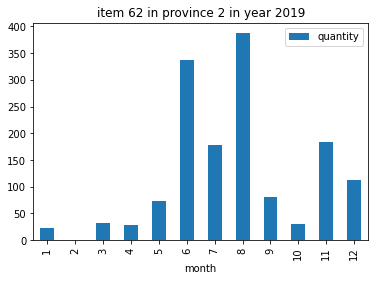

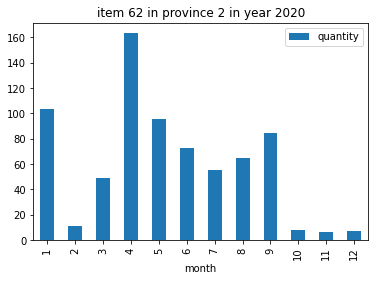

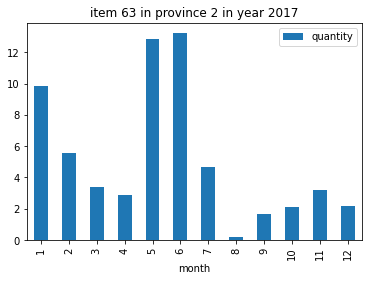

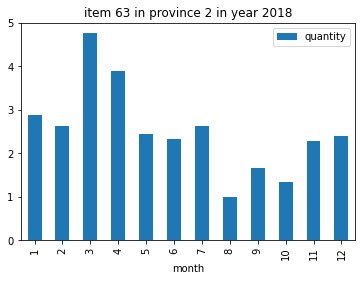

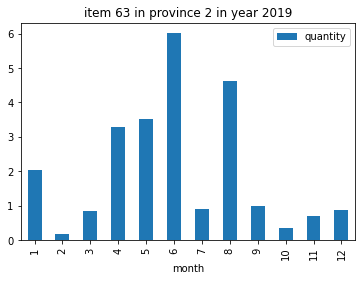

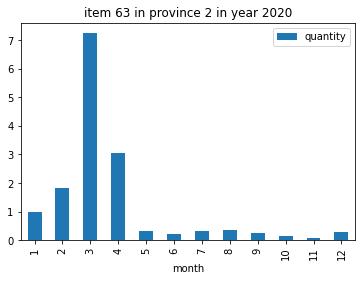

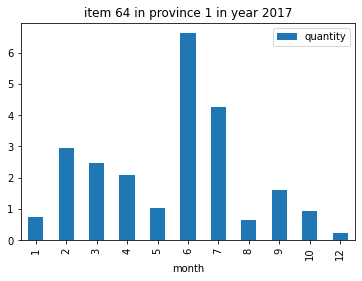

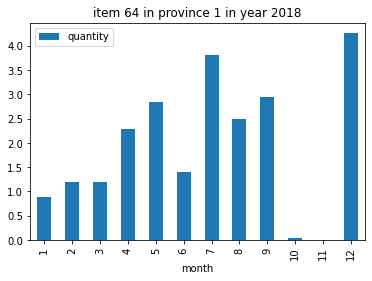

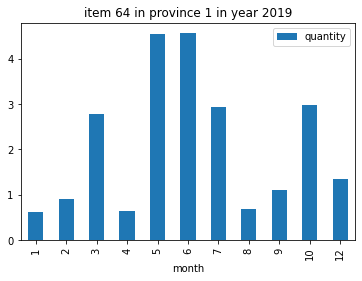

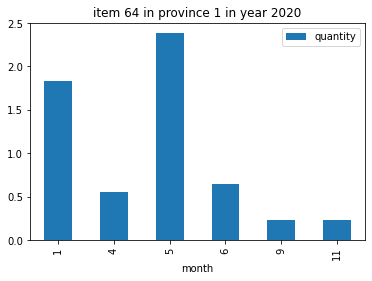

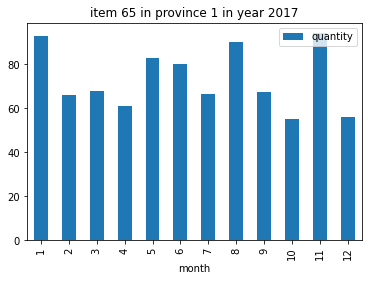

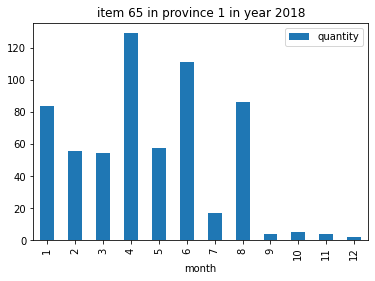

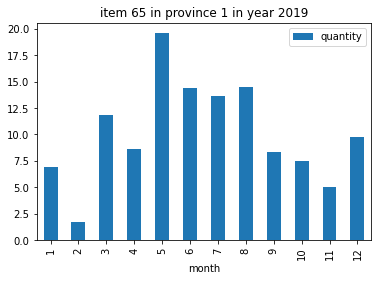

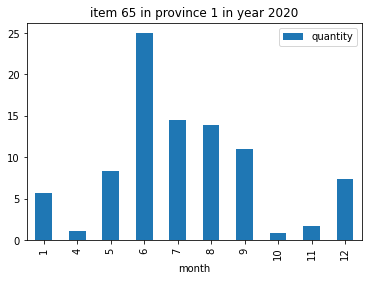

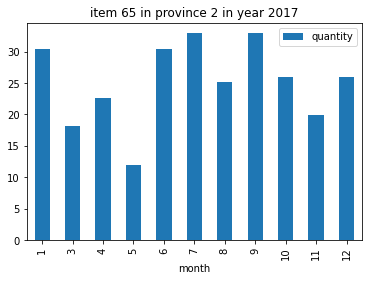

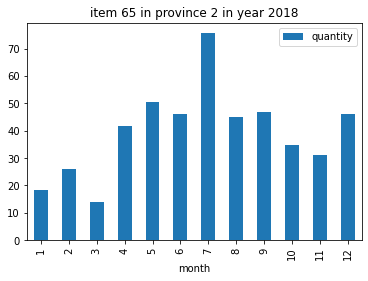

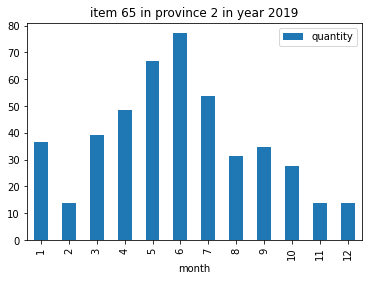

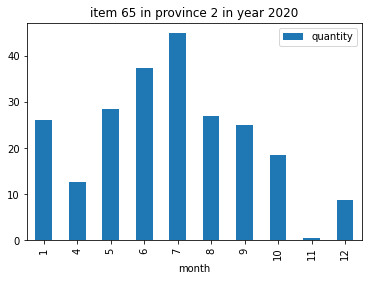

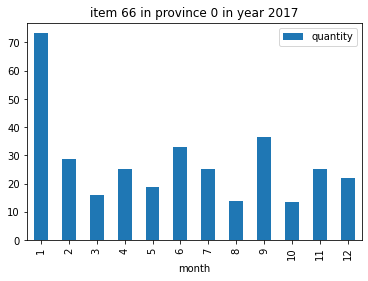

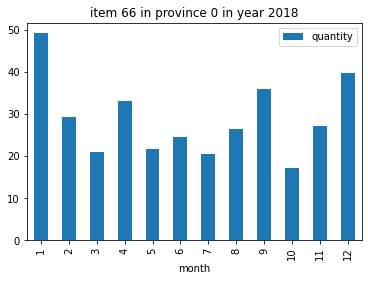

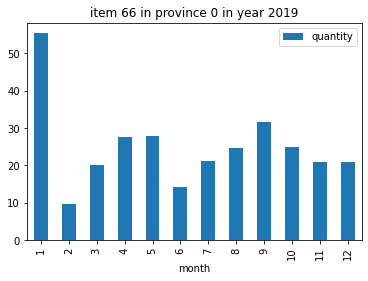

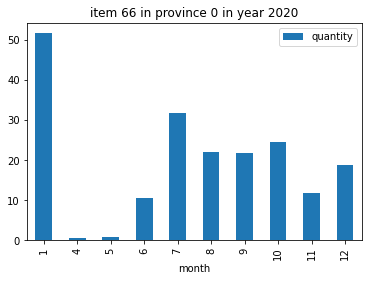

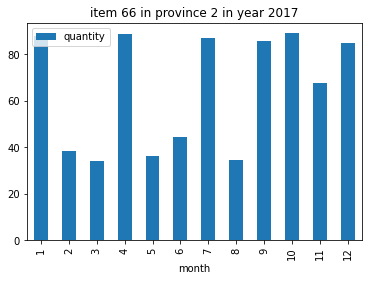

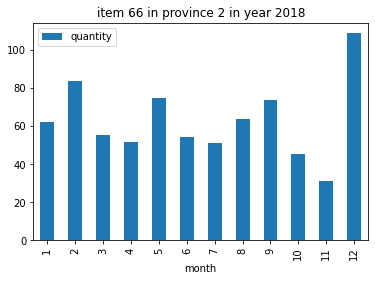

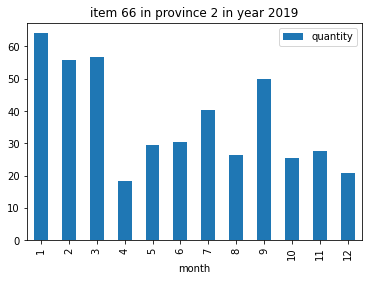

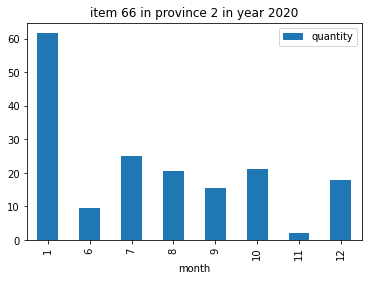

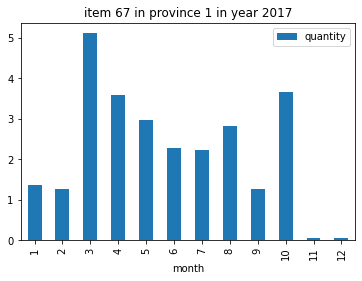

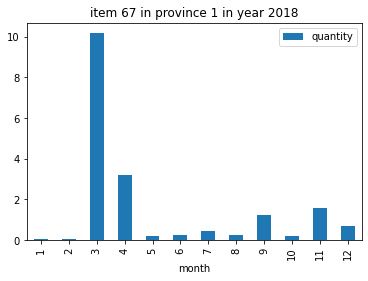

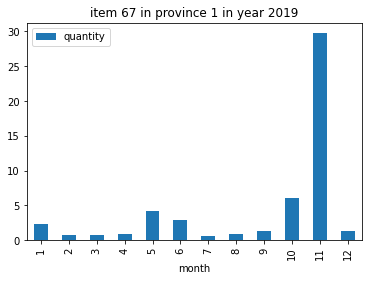

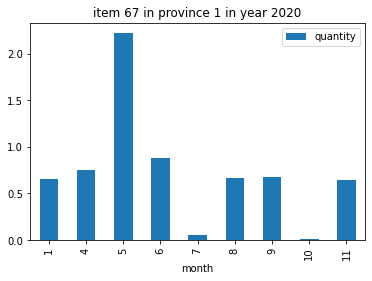

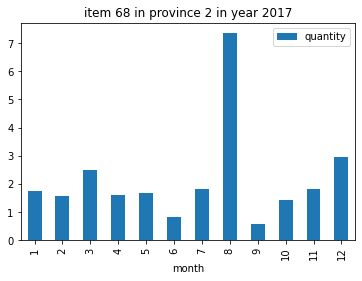

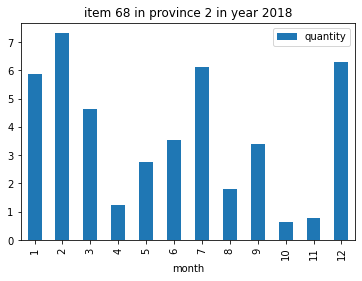

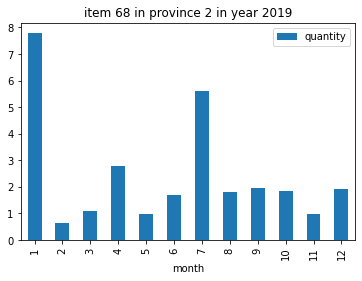

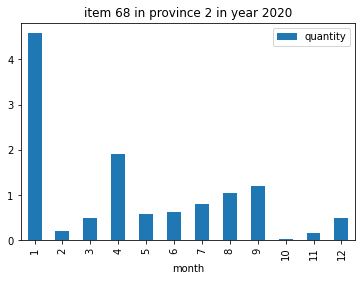

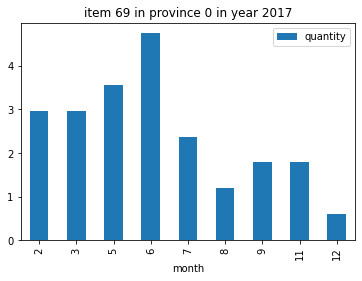

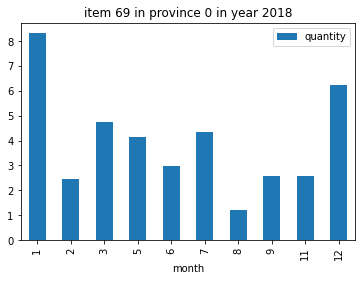

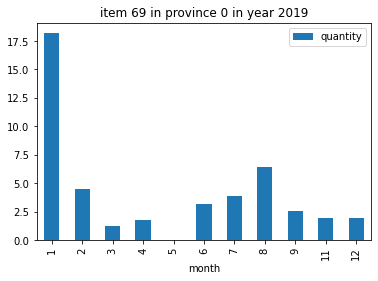

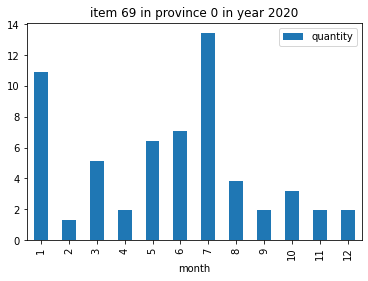

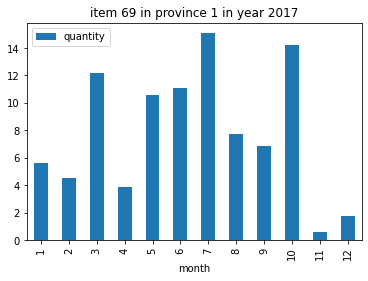

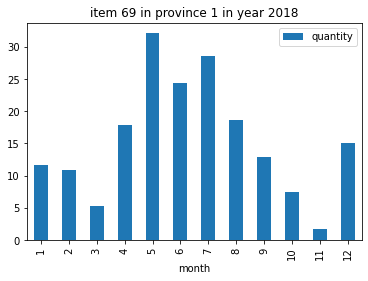

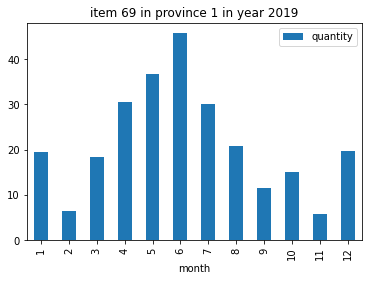

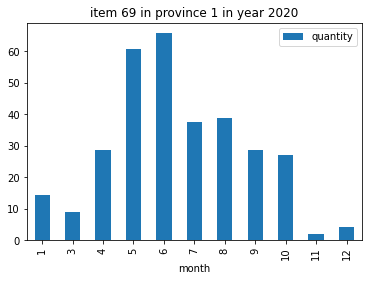

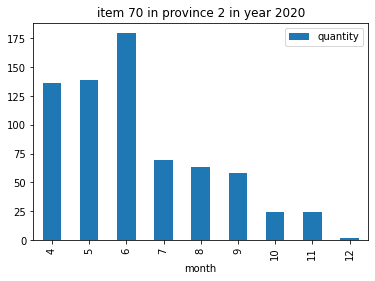

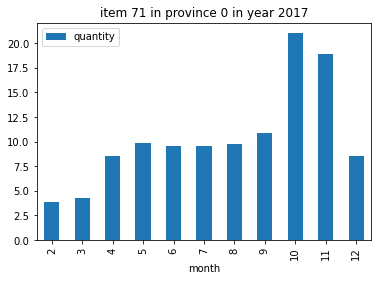

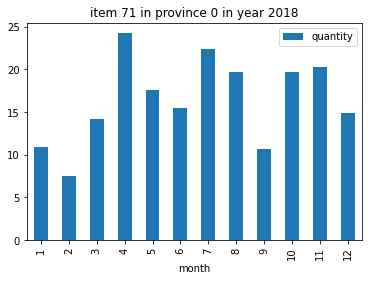

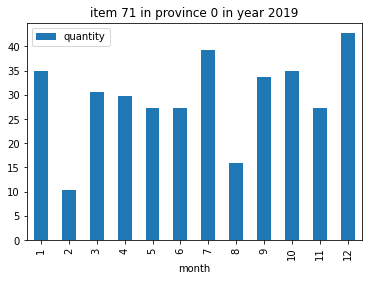

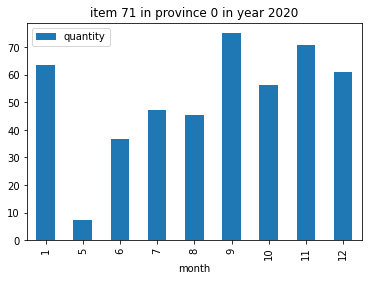

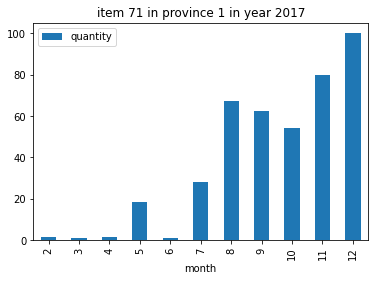

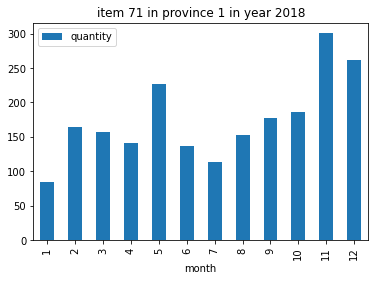

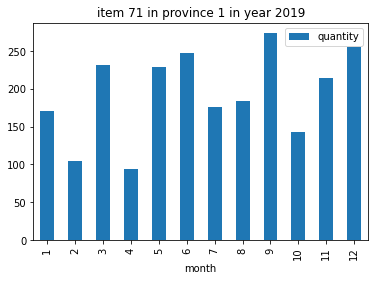

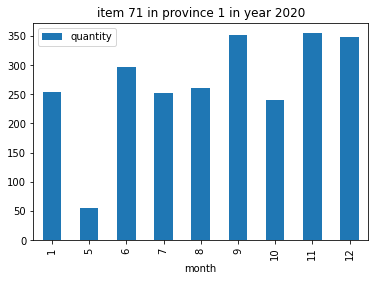

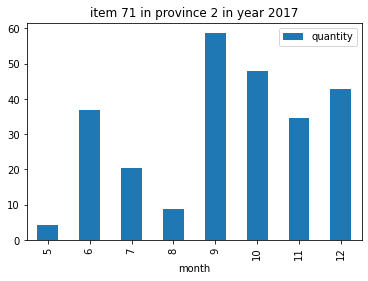

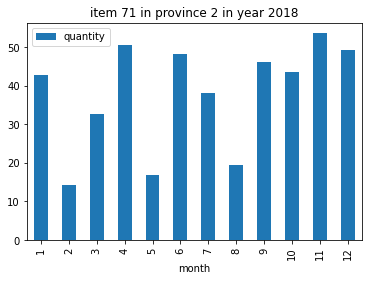

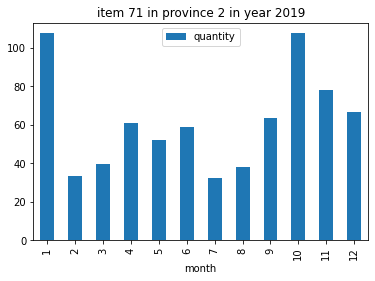

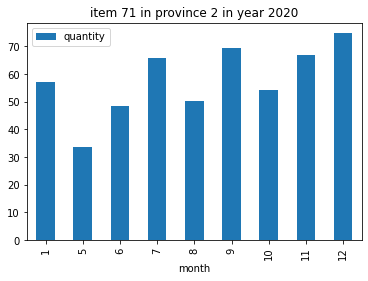

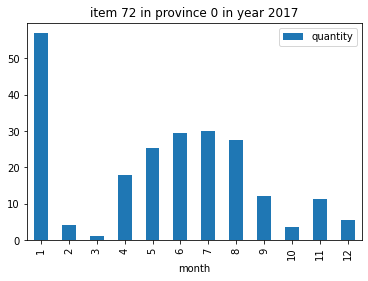

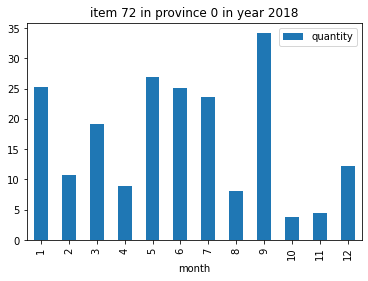

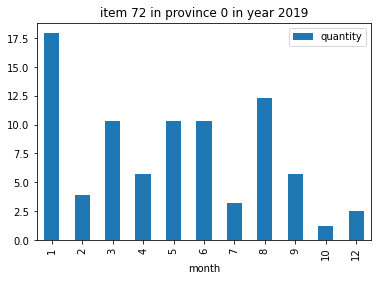

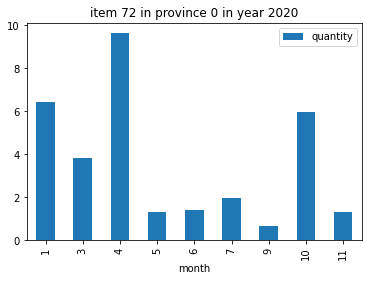

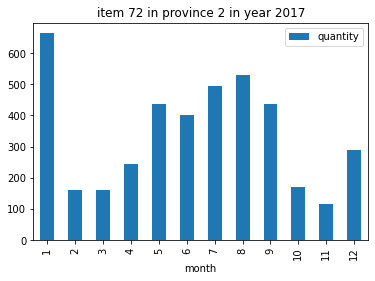

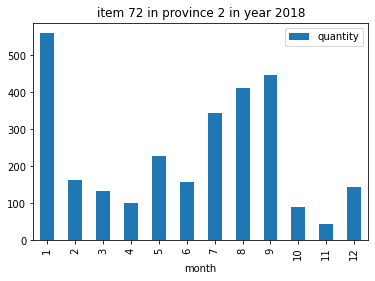

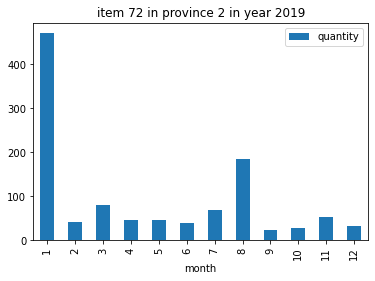

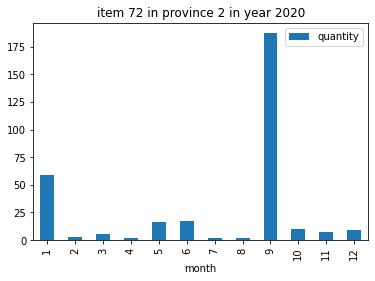

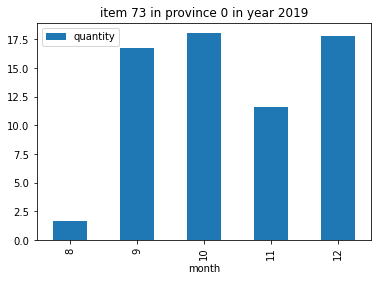

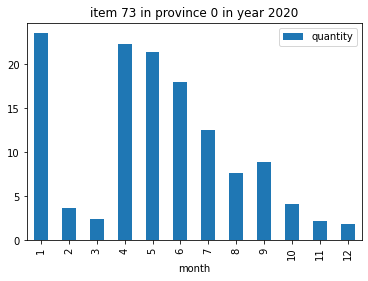

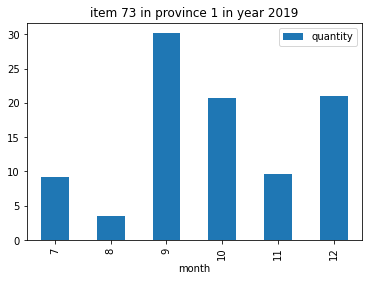

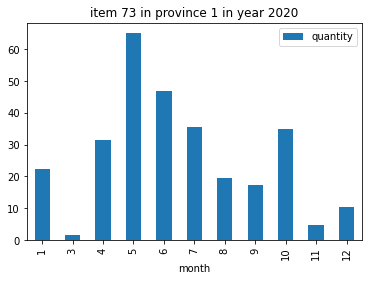

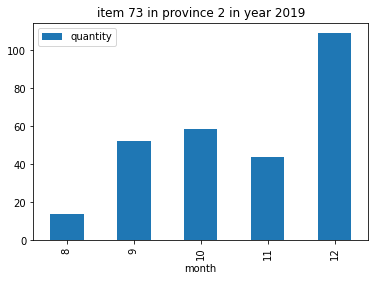

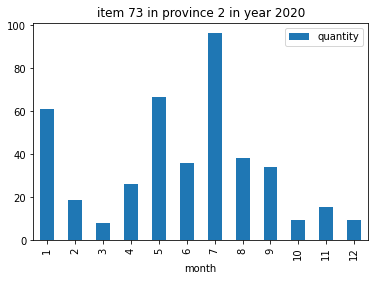

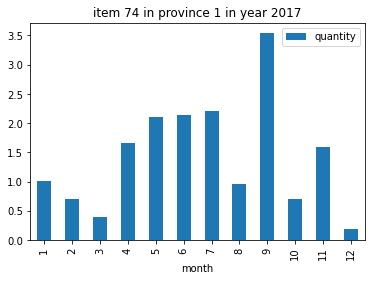

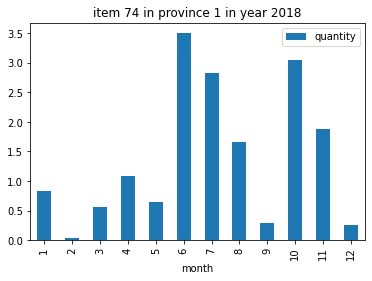

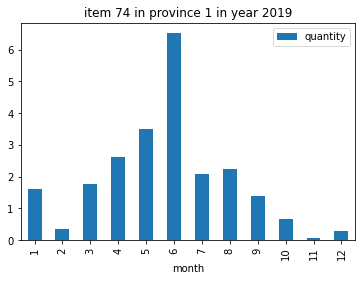

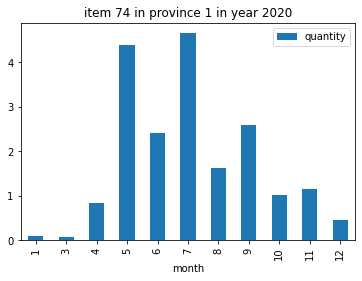

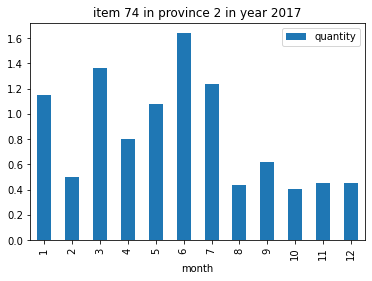

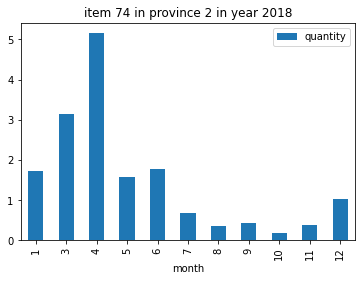

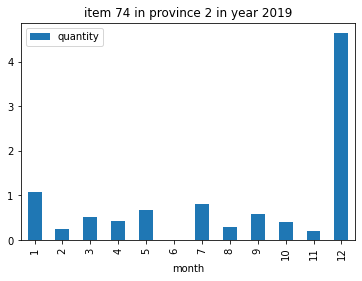

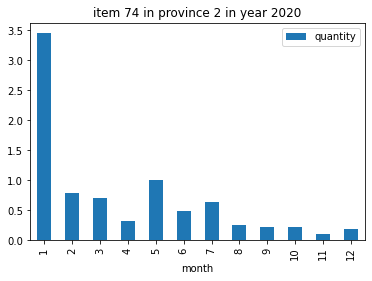

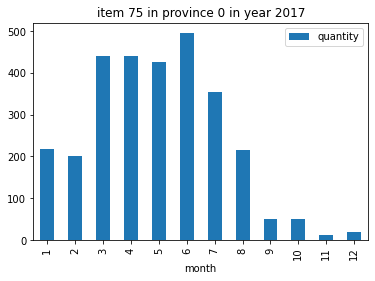

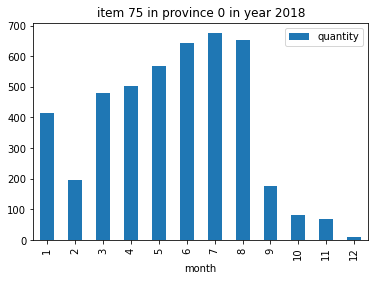

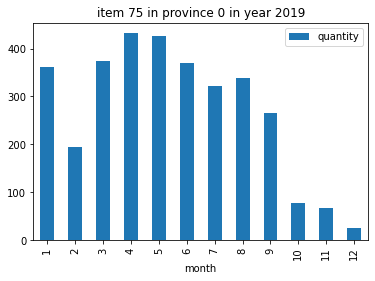

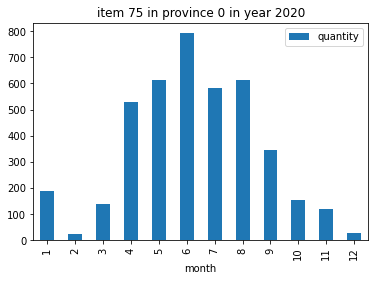

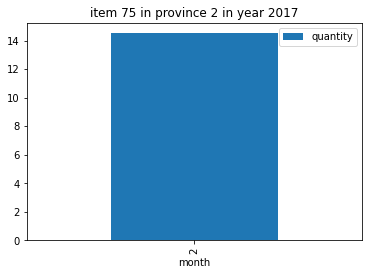

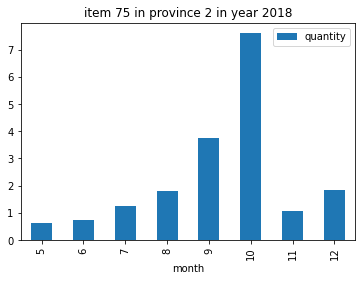

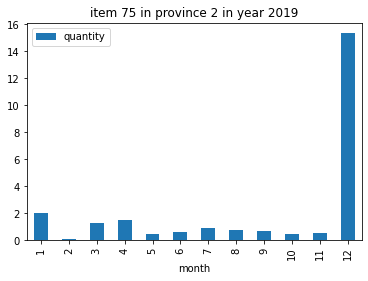

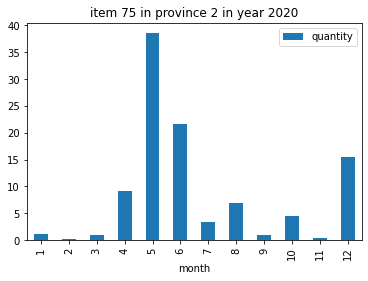

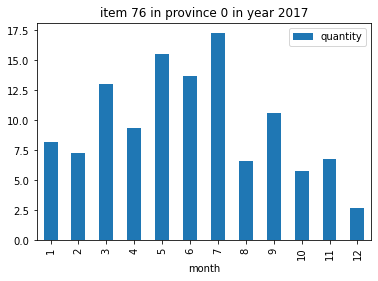

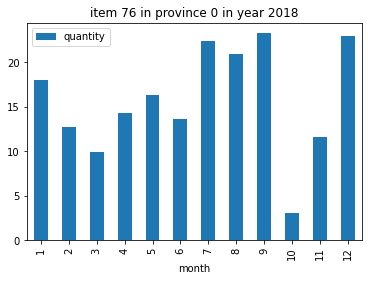

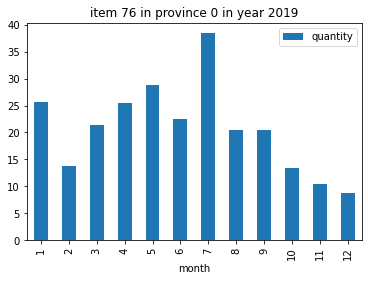

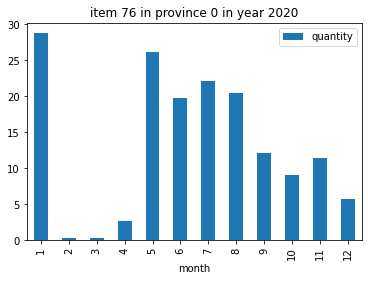

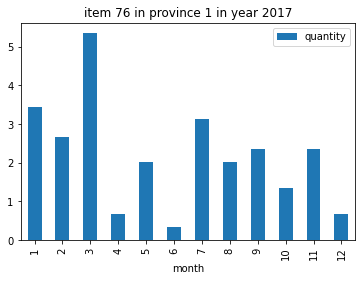

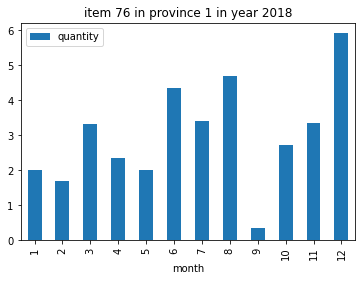

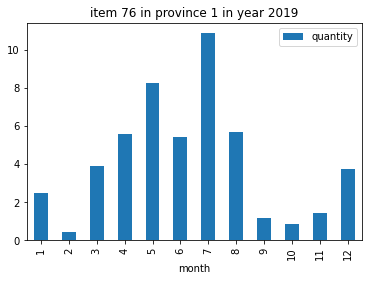

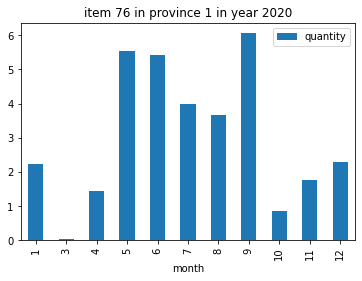

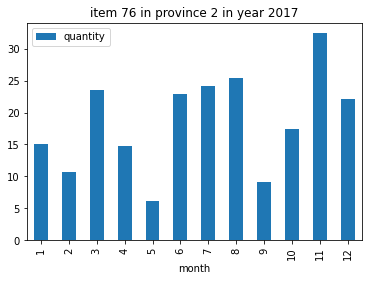

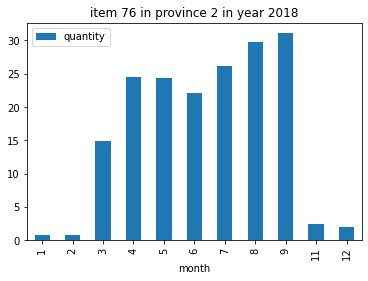

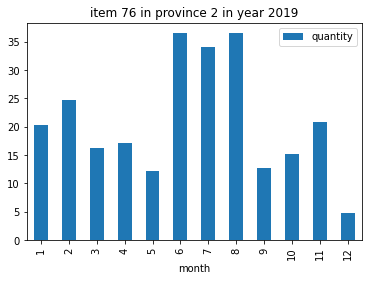

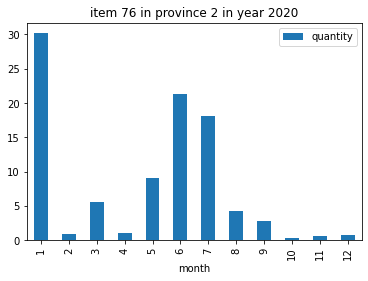

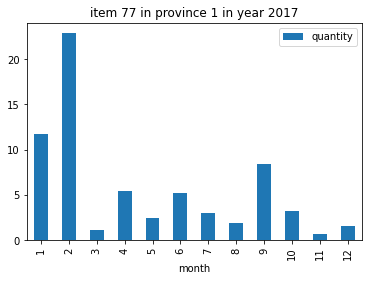

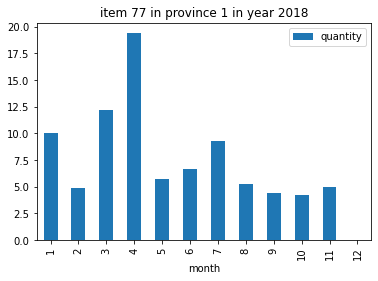

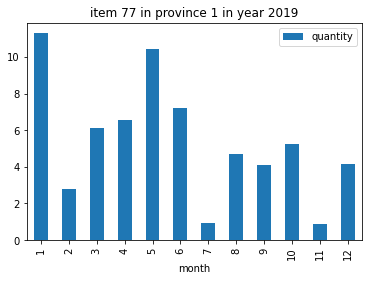

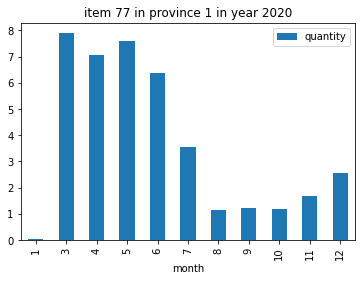

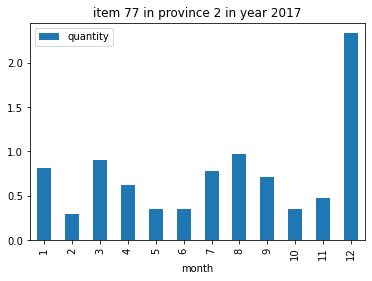

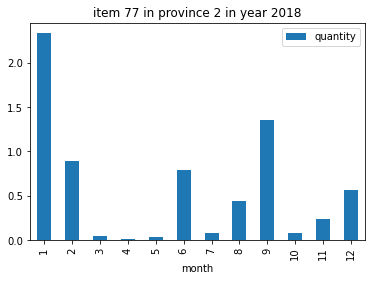

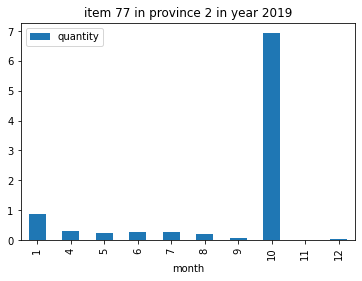

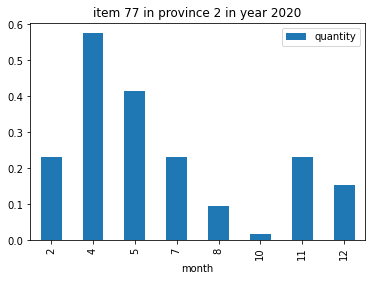

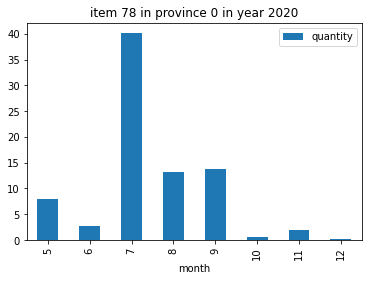

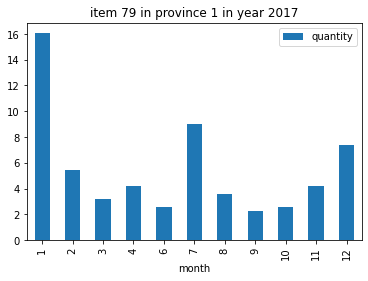

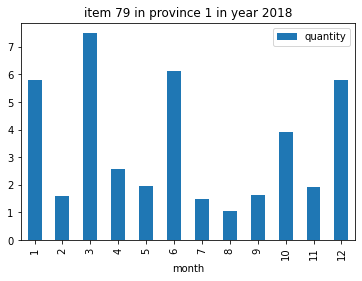

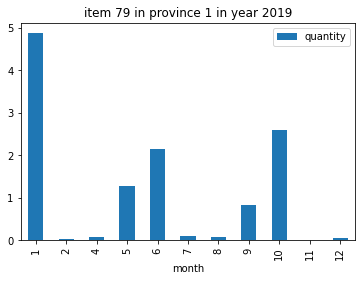

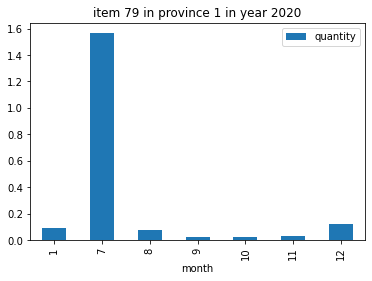

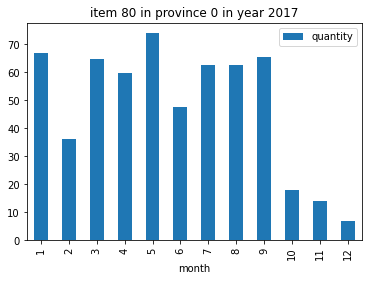

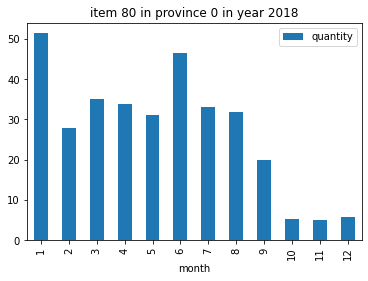

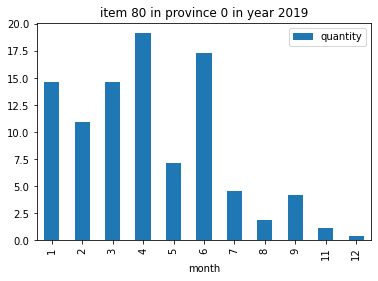

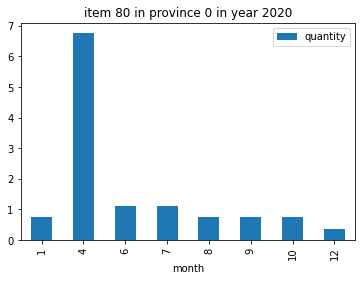

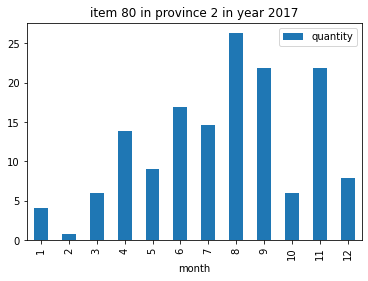

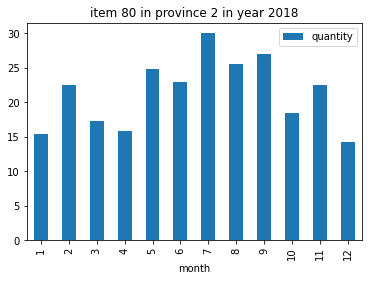

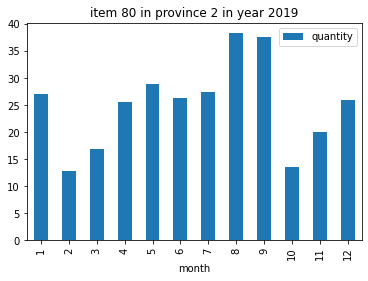

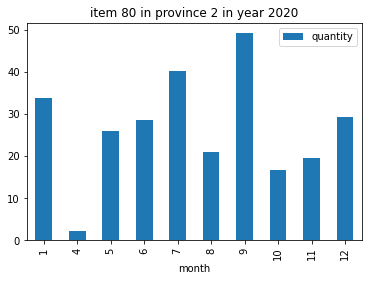

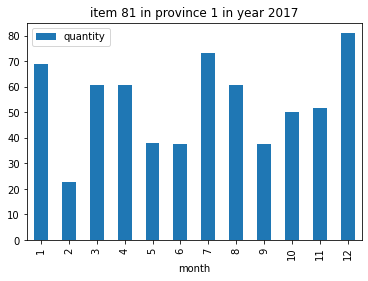

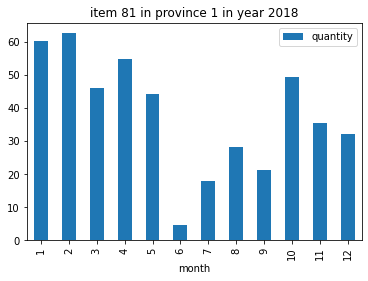

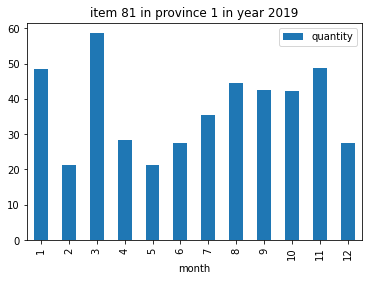

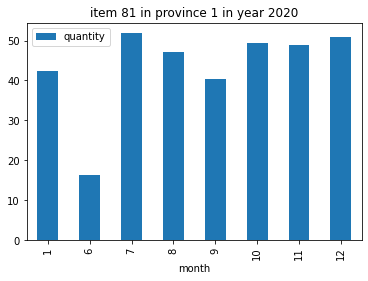

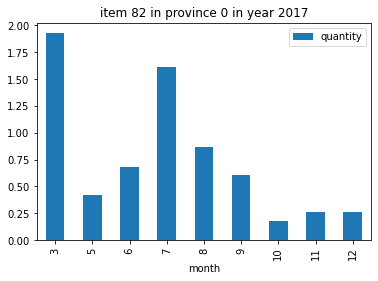

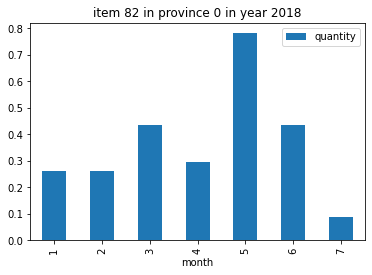

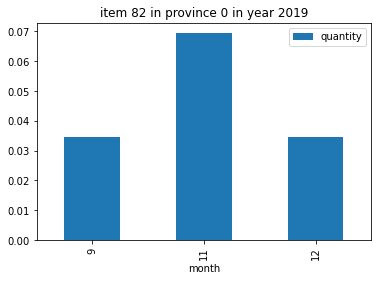

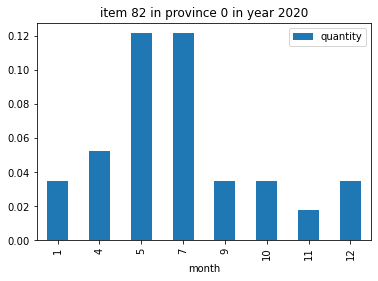

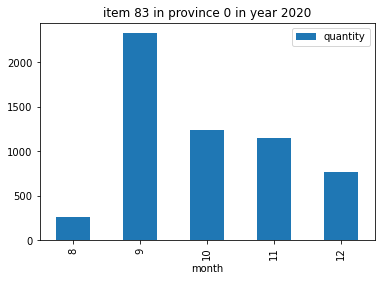

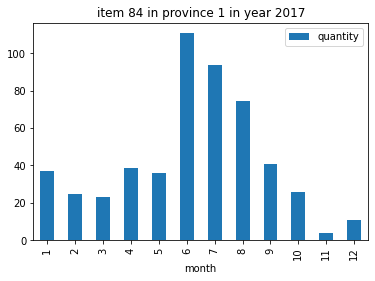

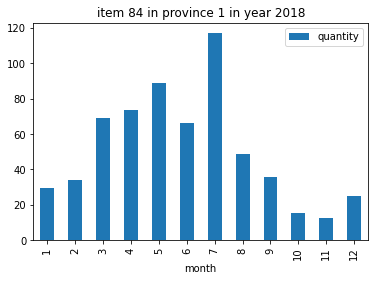

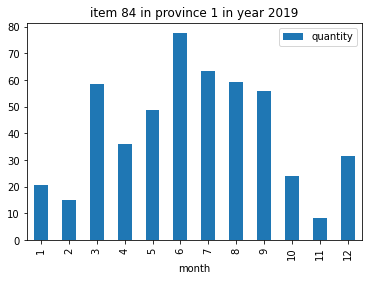

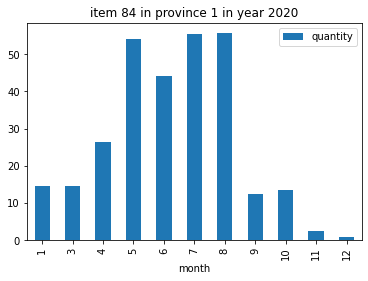

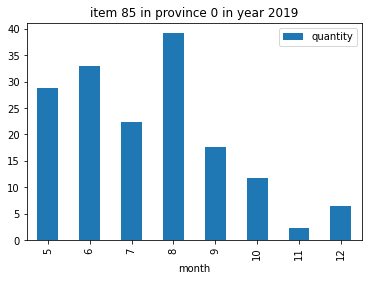

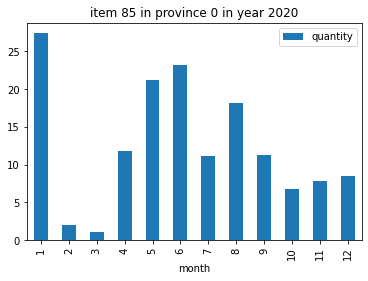

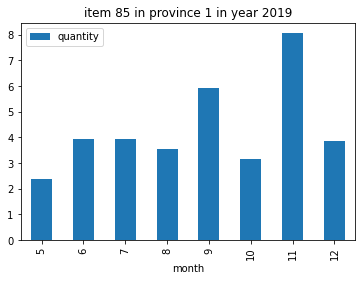

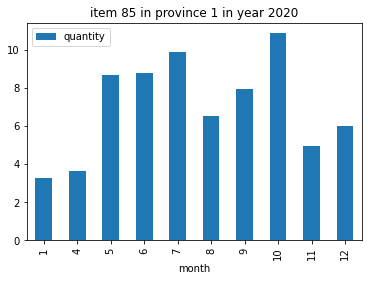

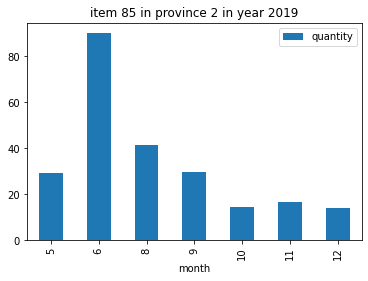

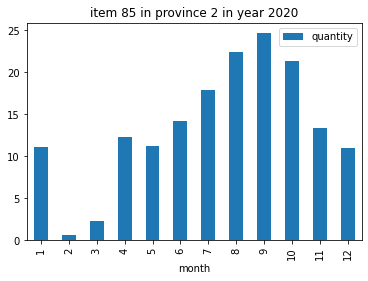

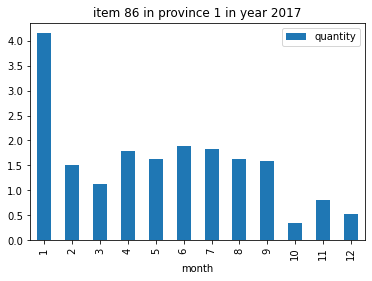

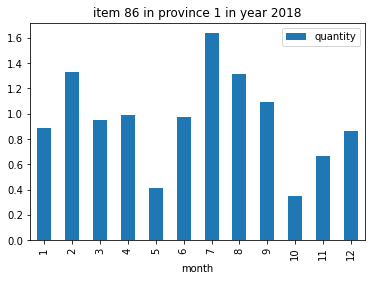

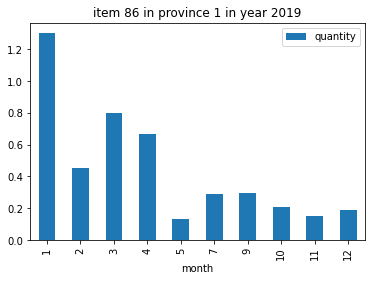

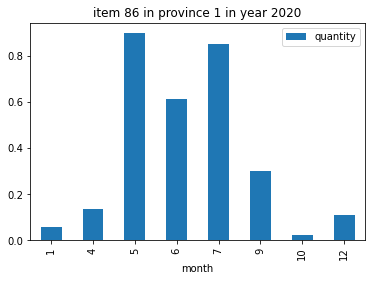

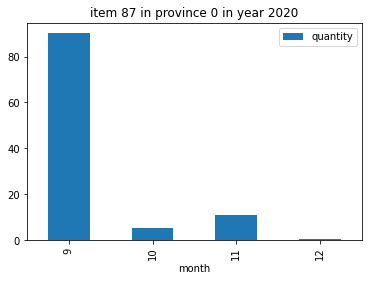

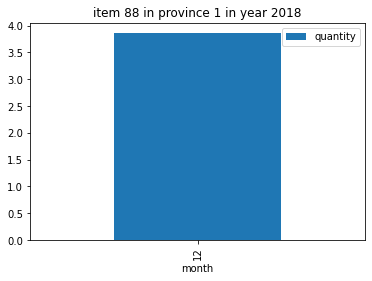

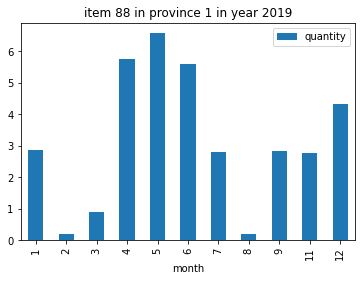

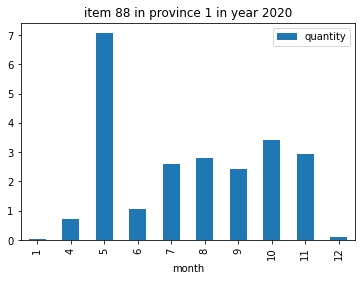

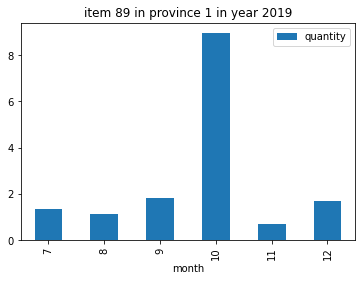

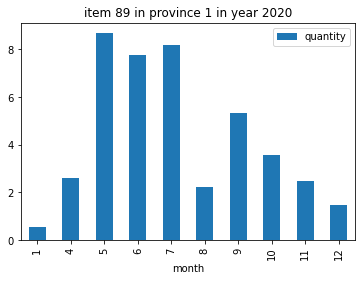

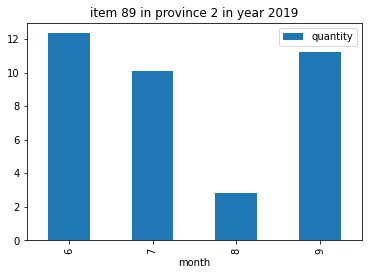

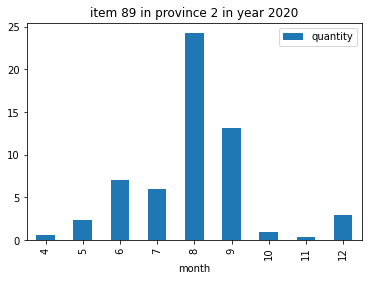

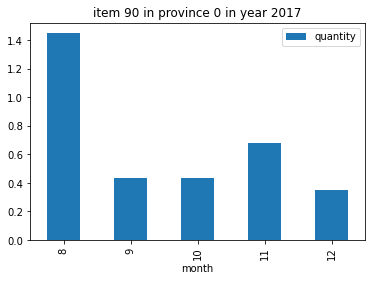

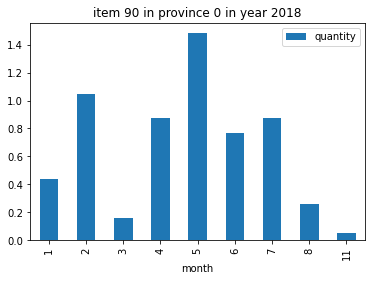

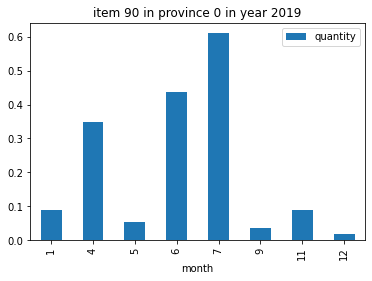

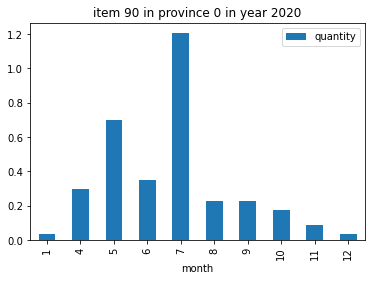

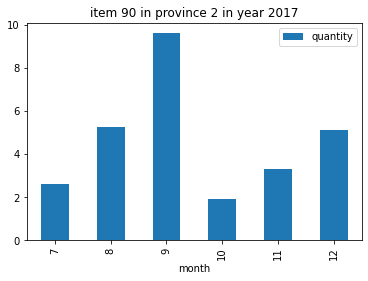

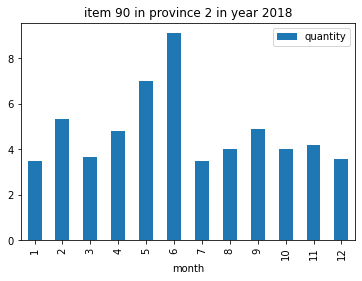

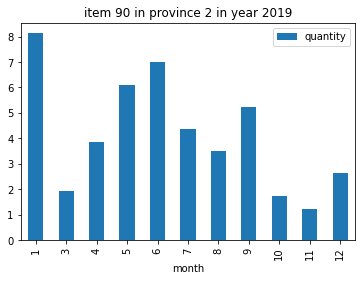

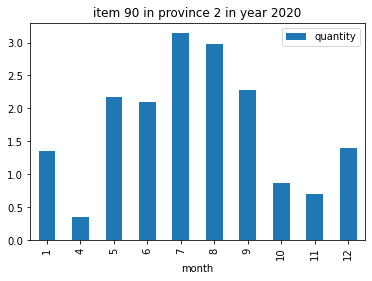

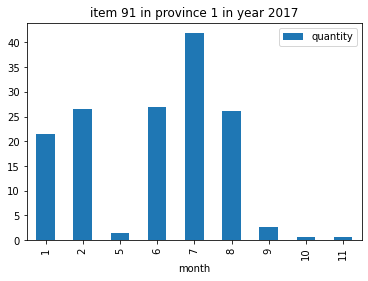

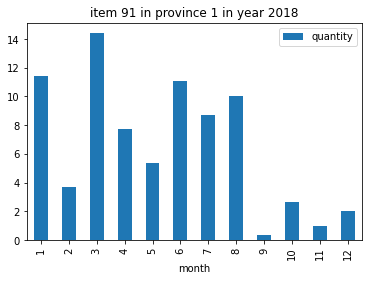

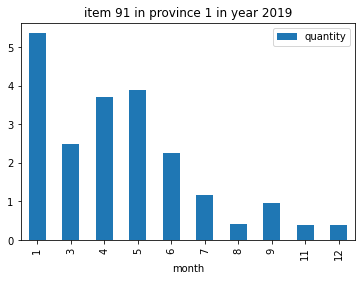

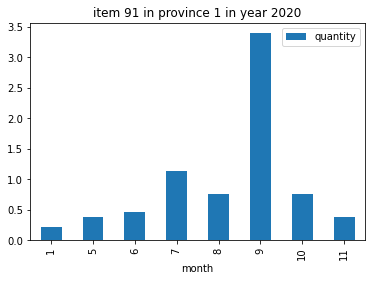

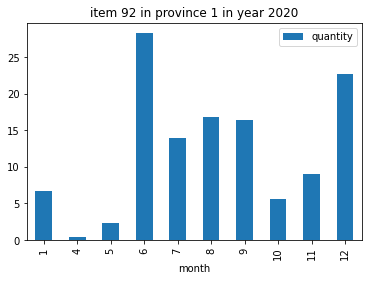

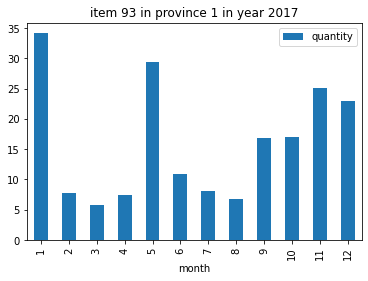

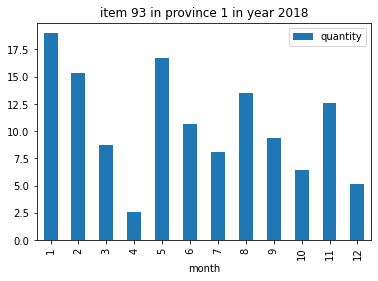

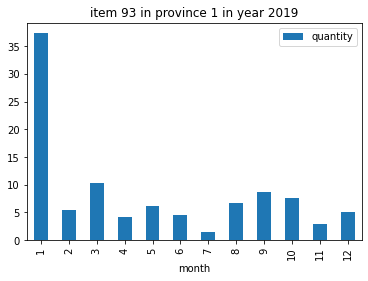

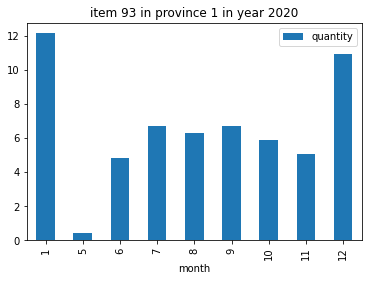

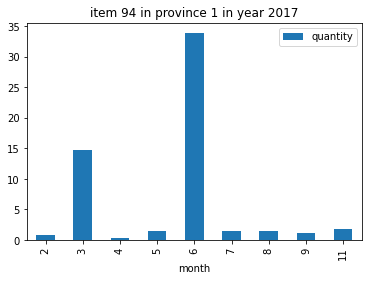

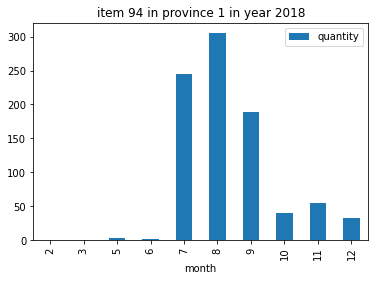

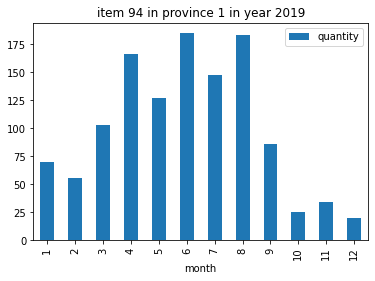

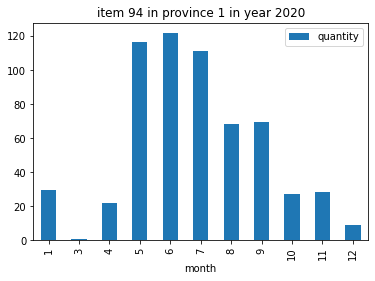

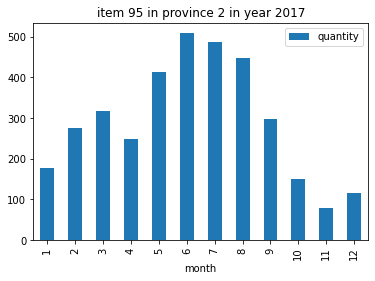

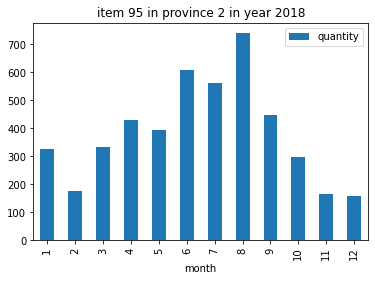

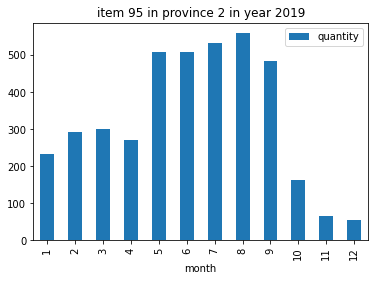

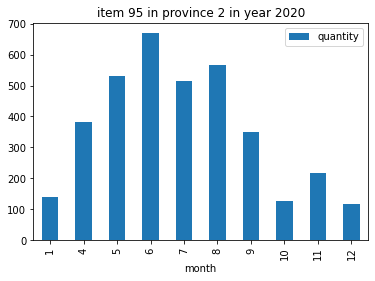

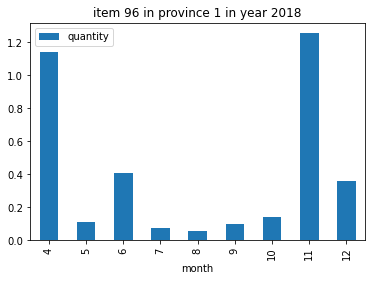

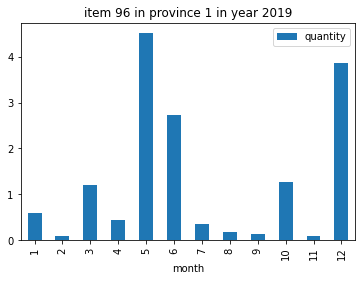

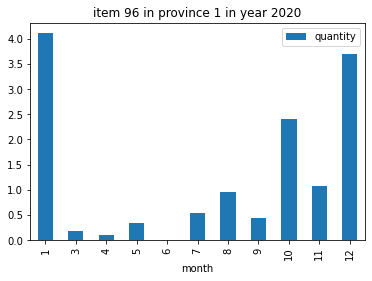

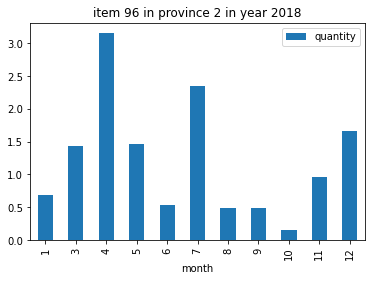

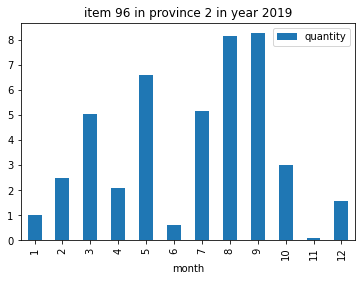

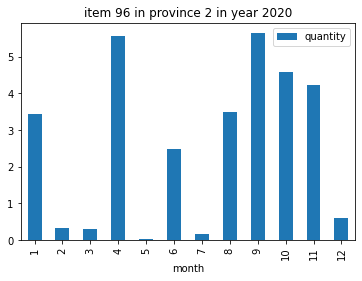

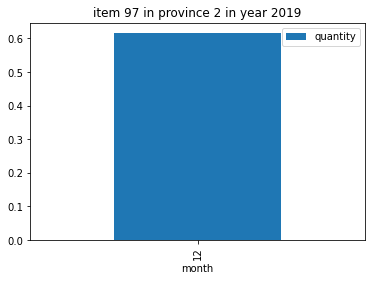

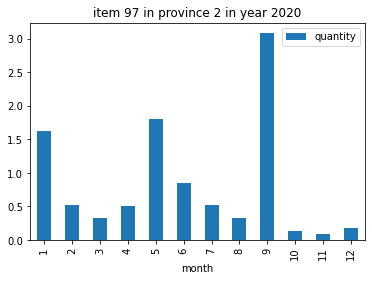

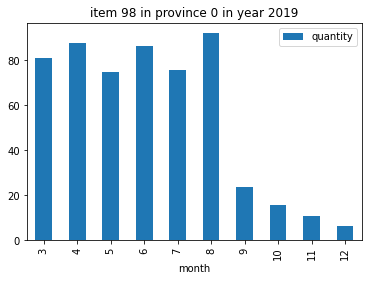

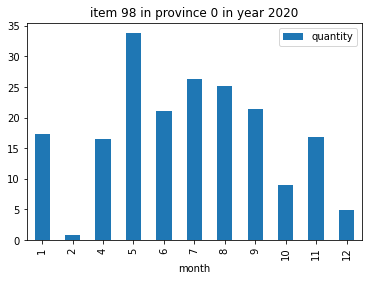

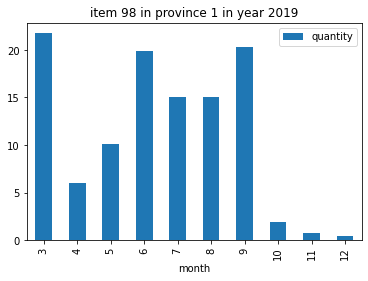

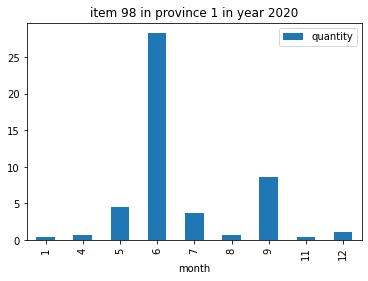

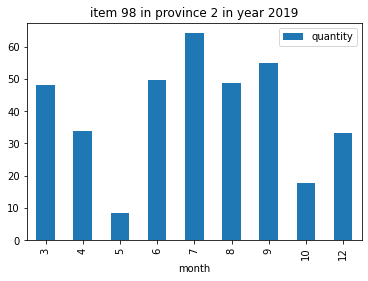

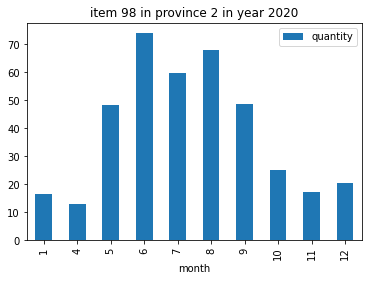

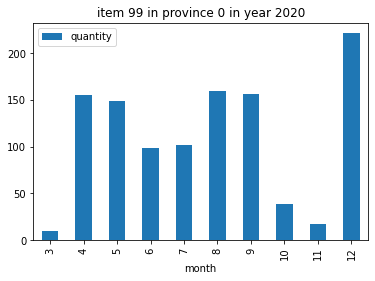

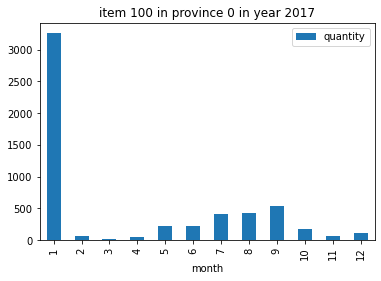

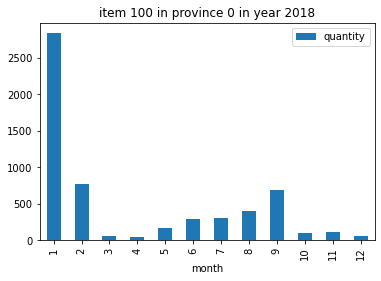

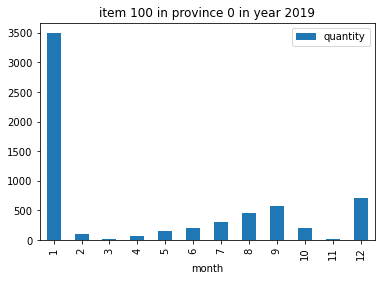

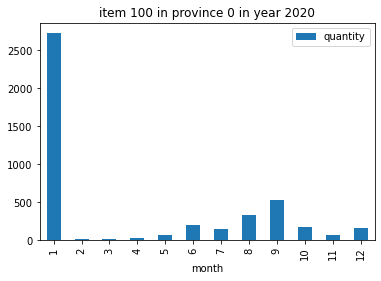

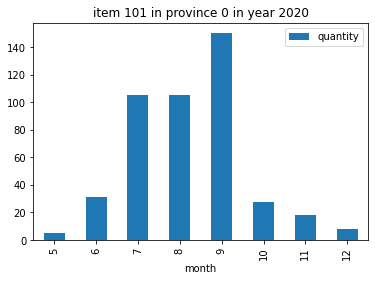

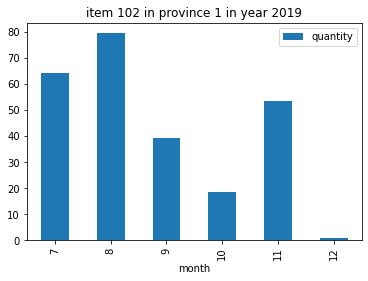

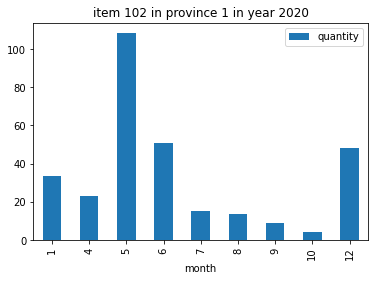

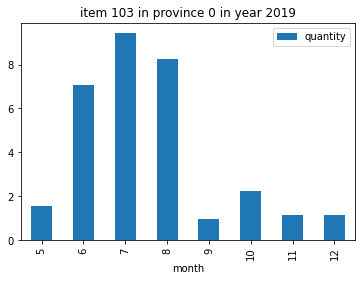

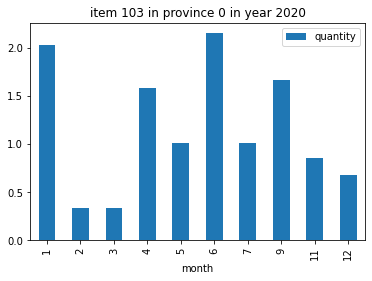

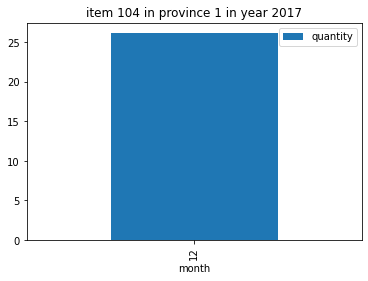

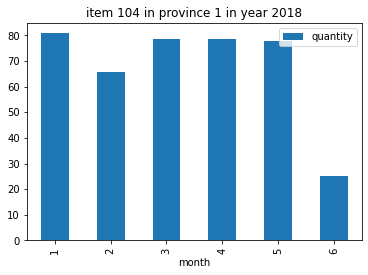

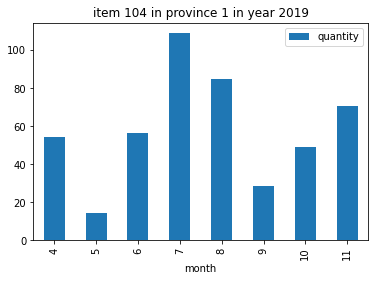

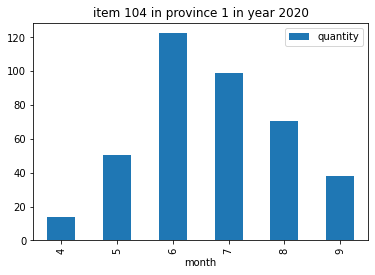

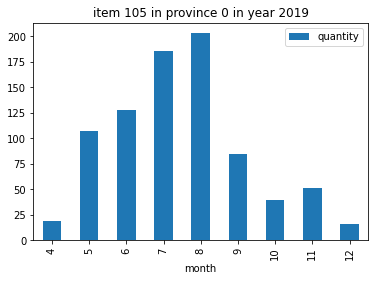

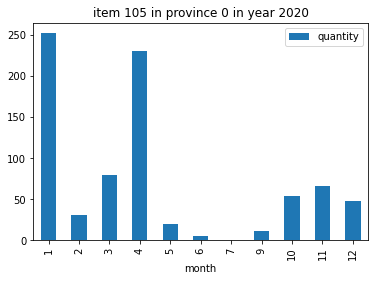

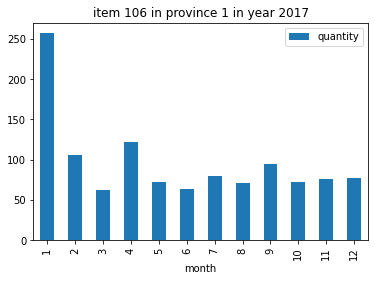

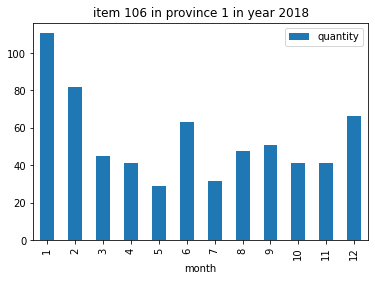

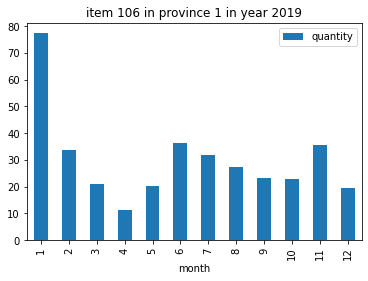

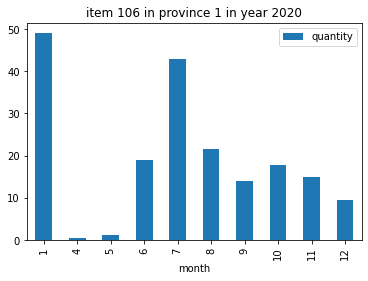

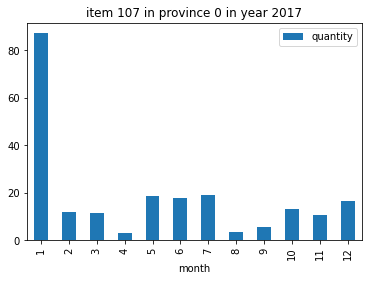

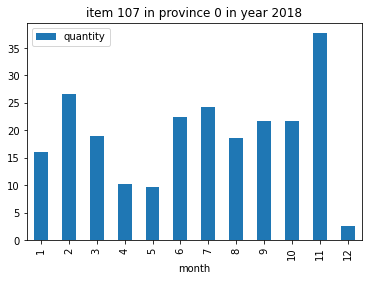

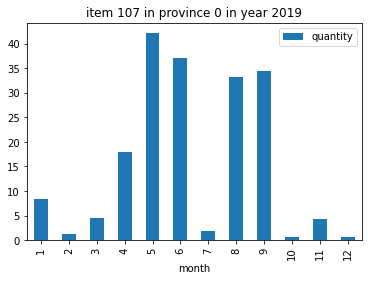

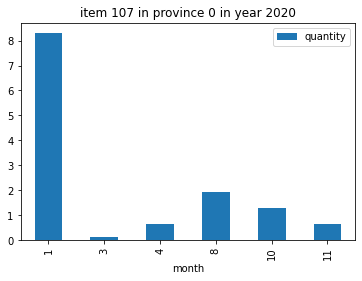

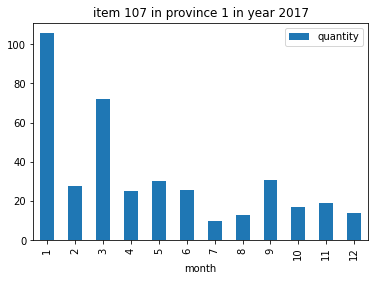

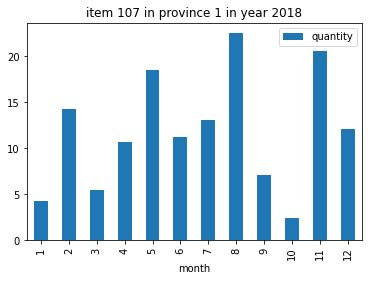

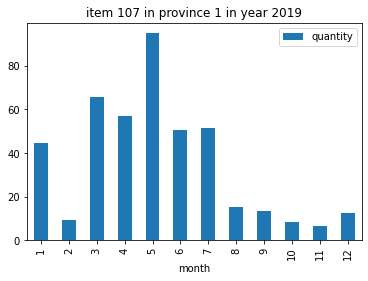

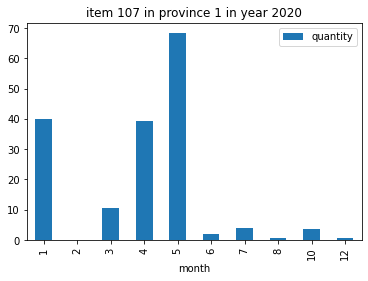

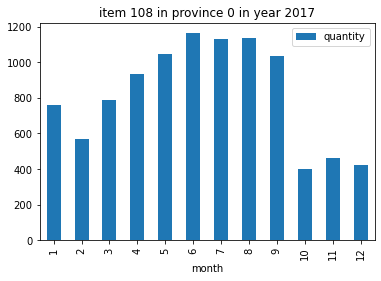

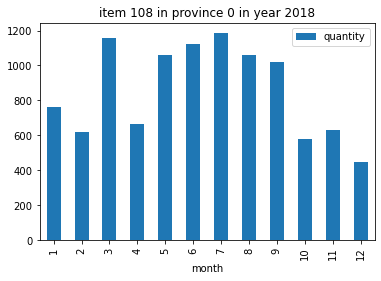

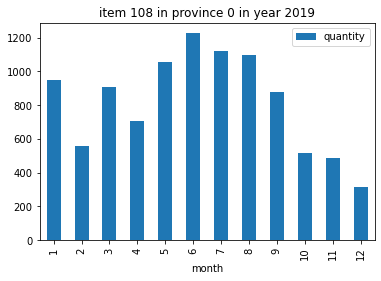

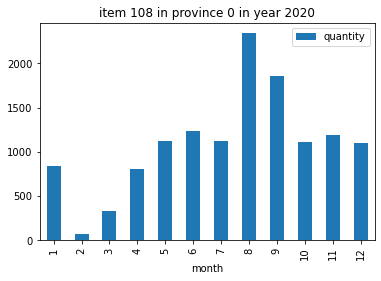

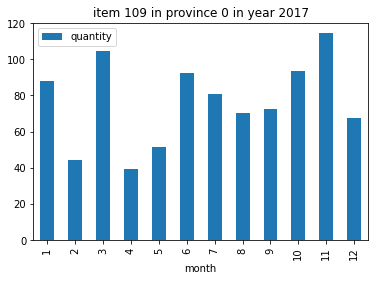

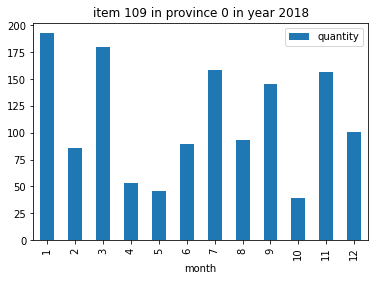

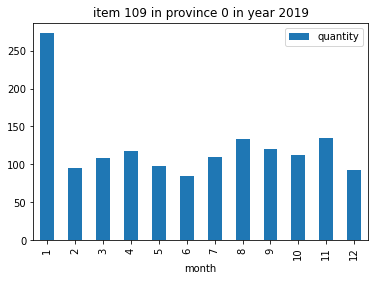

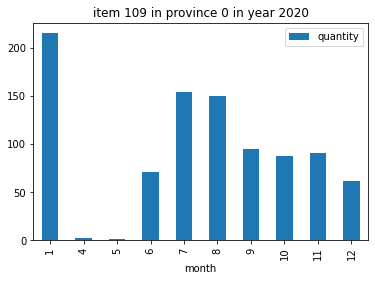

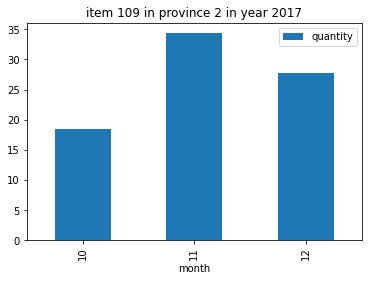

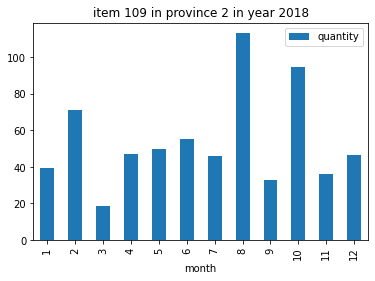

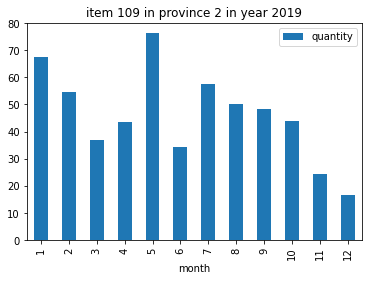

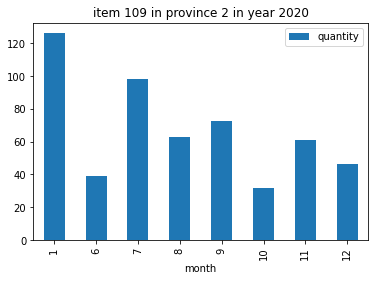

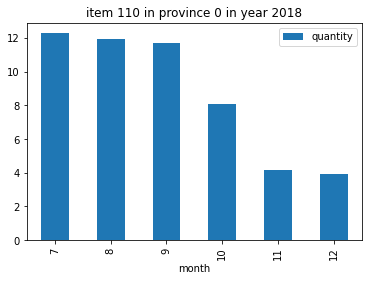

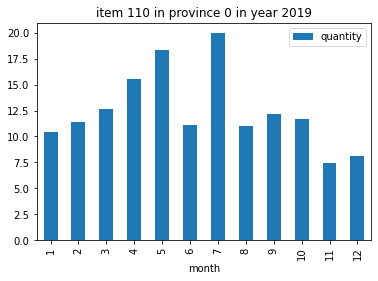

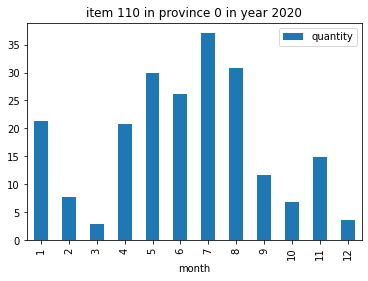

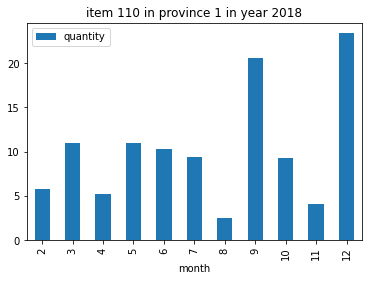

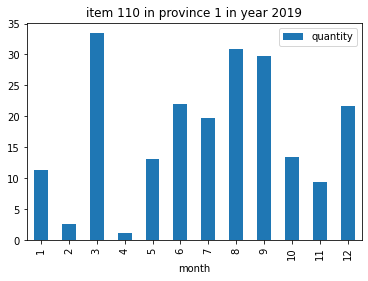

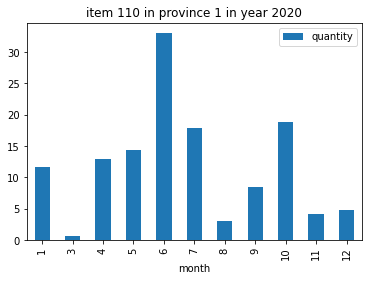

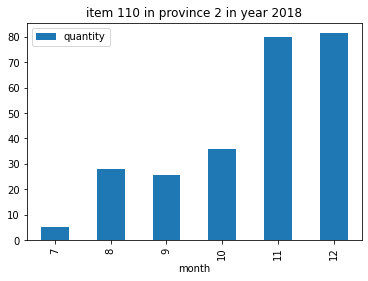

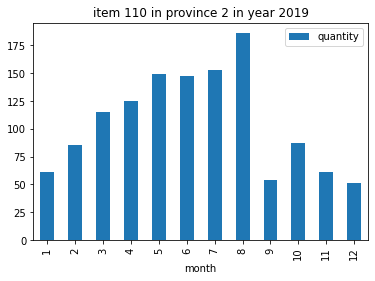

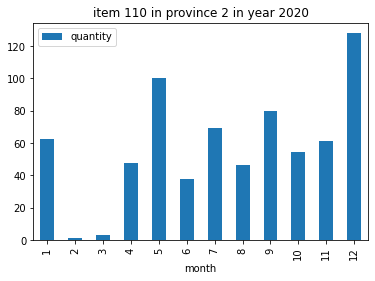

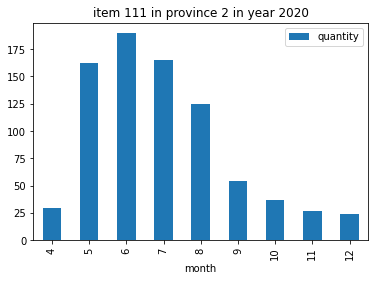

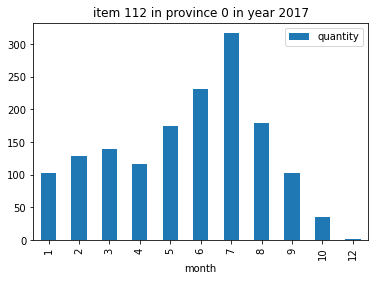

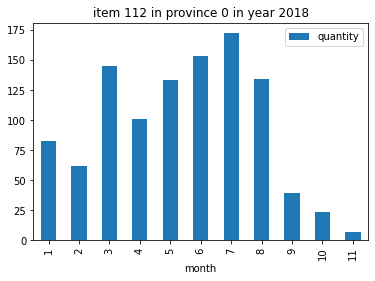

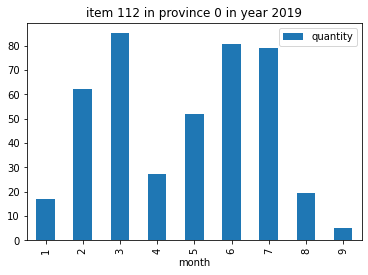

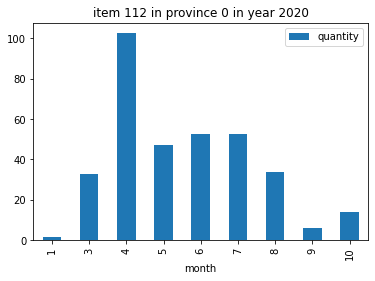

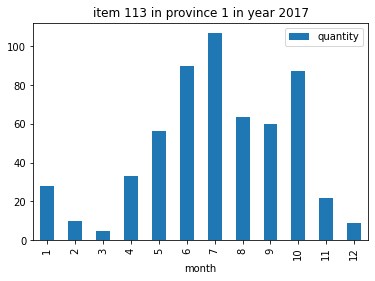

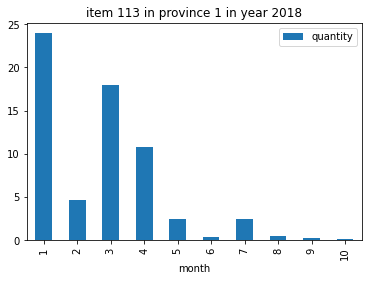

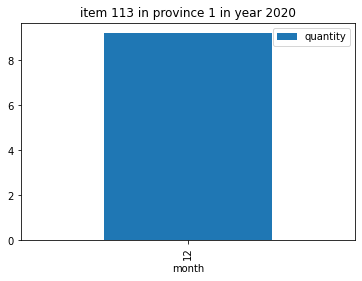

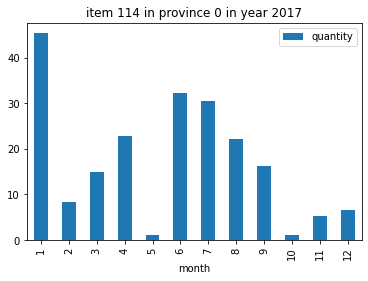

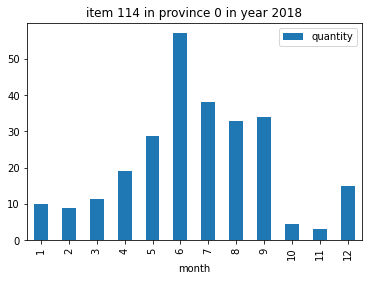

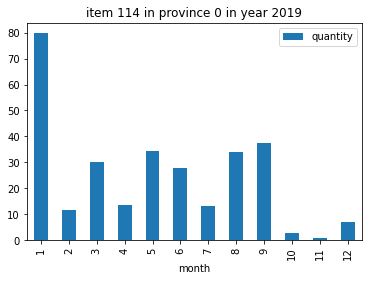

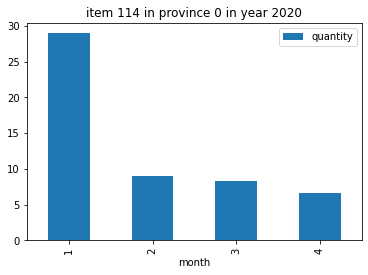

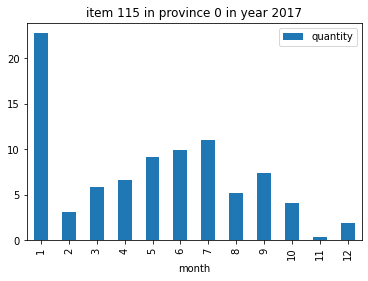

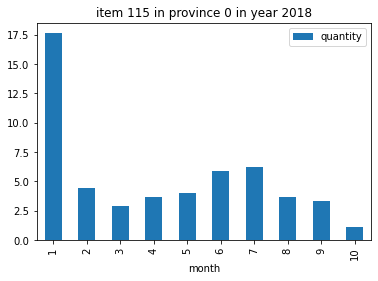

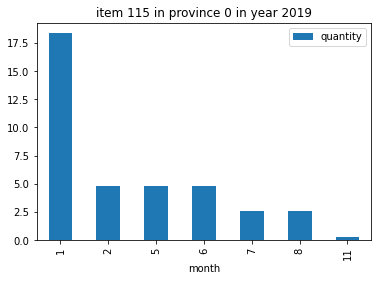

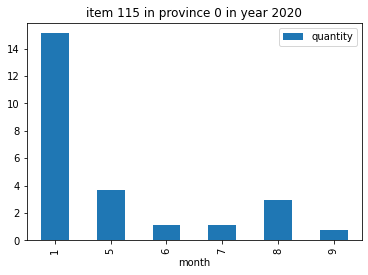

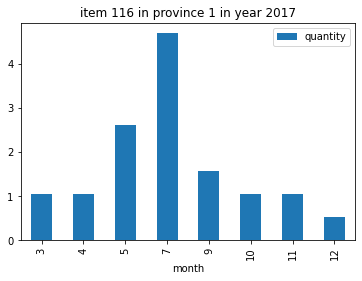

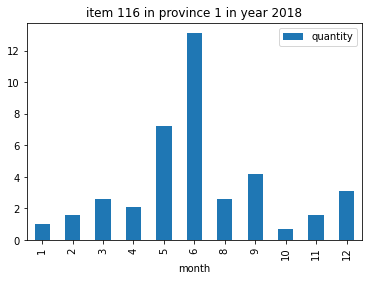

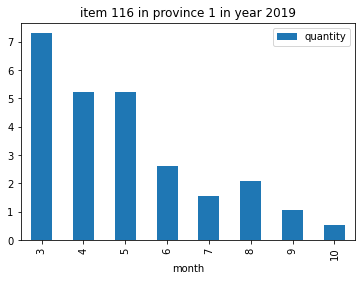

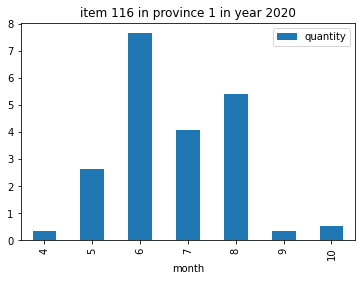

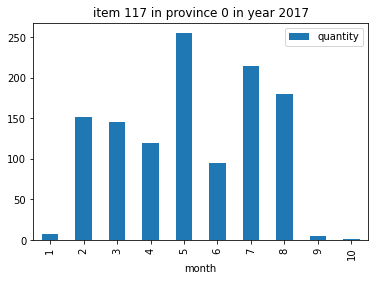

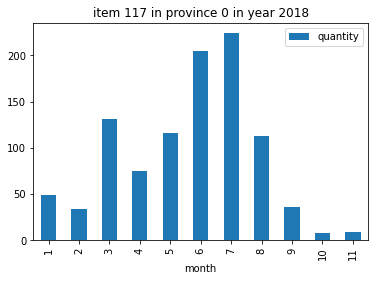

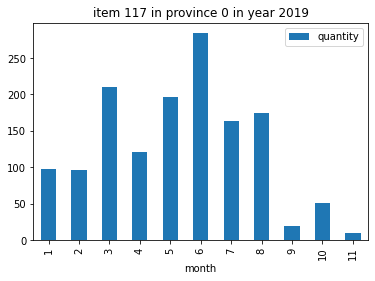

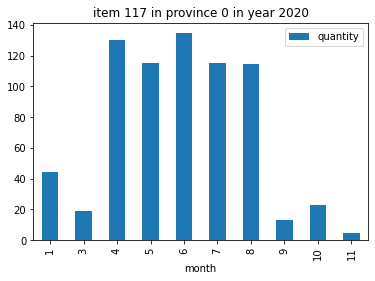

In [11]:
for i in range(118):
    for j in range(3):
        for k in range(4):
            if item_4years[k][i][j].empty == False:
                item_4years[k][i][j].plot(
                    x='month',
                    y='quantity',
                    kind='bar',
                    title='item {0} in province {1} in year {2}'.format(
                        str(i), str(j), str(2017 + k)))
        #for a,b in zip(item_02['month'],item_02['quantity']):
        #    plt.text(a, b, '%.4f' % b, ha='center', va= 'bottom',fontsize=9)
        plt.show()

In [ ]:
pd.crosstab([group_2017.item_id, group_2017.month],
            group_2017.province_id,
            margins=True,
            margins_name='总计',
            normalize=False).style.background_gradient(cmap='summer_r')

/Users/lcy/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/lcy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


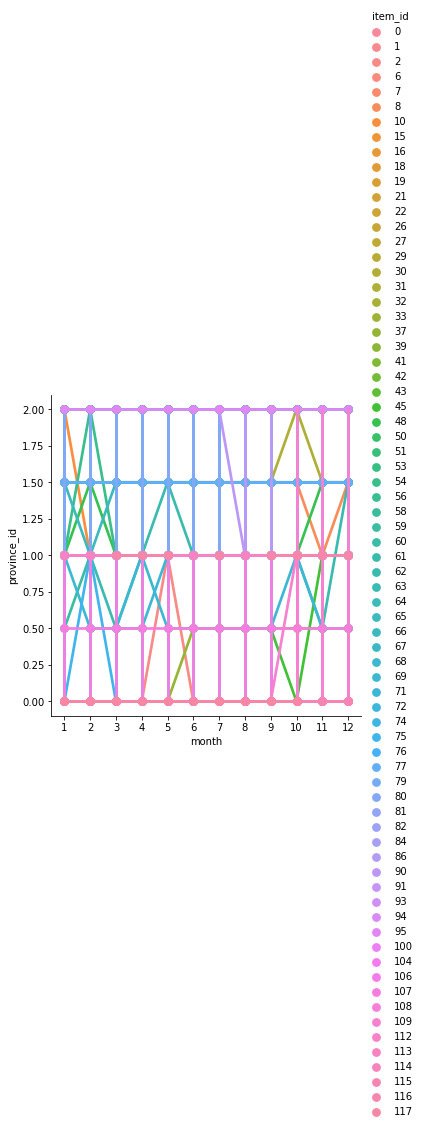

In [65]:
import seaborn as sns
sns.factorplot('month', 'province_id', hue='item_id', data=group_2017)

In [ ]:
pd.crosstab(group_2017.item_id,
            group_2017.province_id,
            margins=True,
            margins_name='总计',
            normalize=False).style.background_gradient(cmap='summer_r')

In [55]:
item_2017_lossdata = pd.crosstab(group_2017.item_id,
                                 group_2017.province_id,
                                 margins=True,
                                 margins_name='总计',
                                 normalize=False)
item_2017_lossdata.to_csv('2017Eachprovince_lossdata.csv')

In [ ]:
item0_117_allprovince = []
for i in range(117):
    item = [[], [], []]
    item0_117_allprovince.append(item)
item0_117_allprovince

In [47]:
group_2017

year  month  item_id  province_id    quantity
0     2017      1        0            2   14.110192
1     2017      1        1            0  421.313155
2     2017      1        1            2  196.889406
3     2017      1        2            0    5.654450
4     2017      1        6            1  147.802670
...    ...    ...      ...          ...         ...
1122  2017     12      112            0    2.274840
1123  2017     12      113            1    8.691638
1124  2017     12      114            0    6.573186
1125  2017     12      115            0    1.837587
1126  2017     12      116            1    0.521739

[1127 rows x 5 columns]

In [56]:
item_2018_lossdata = pd.crosstab(group_2018.item_id,
                                 group_2018.province_id,
                                 margins=True,
                                 margins_name='总计',
                                 normalize=False)
item_2018_lossdata.to_csv('2018Eachprovince_lossdataMonth.csv')
item_2019_lossdata = pd.crosstab(group_2019.item_id,
                                 group_2019.province_id,
                                 margins=True,
                                 margins_name='总计',
                                 normalize=False)
item_2019_lossdata.to_csv('2019Eachprovince_lossdataMonth.csv')

In [57]:
item_2020_lossdata = pd.crosstab(group_2020.item_id,
                                 group_2020.province_id,
                                 margins=True,
                                 margins_name='总计',
                                 normalize=False)
item_2020_lossdata.to_csv('2020Eachprovince_lossdataMonth.csv')

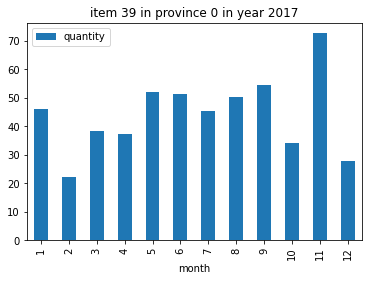

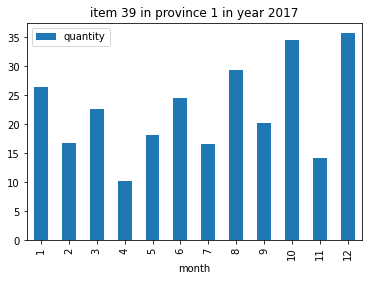

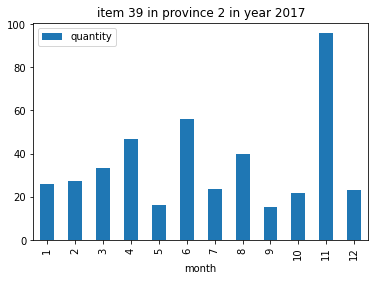

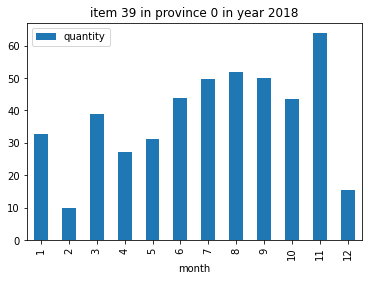

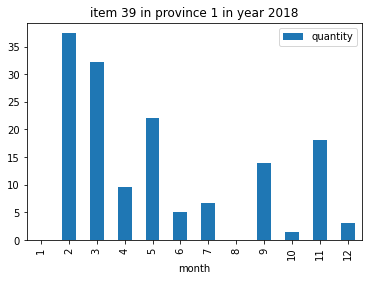

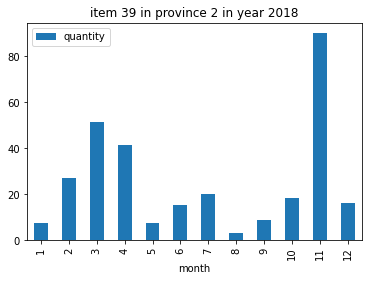

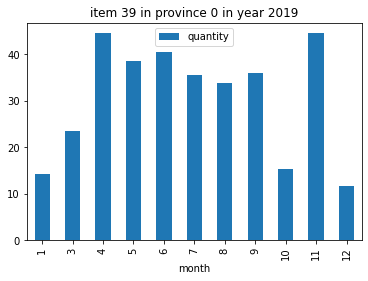

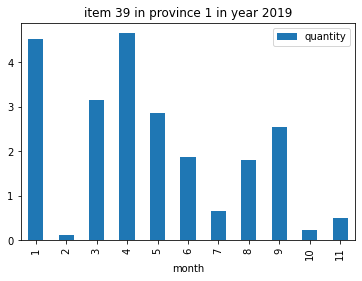

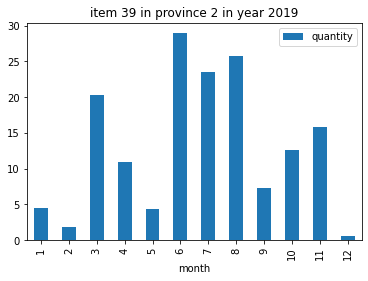

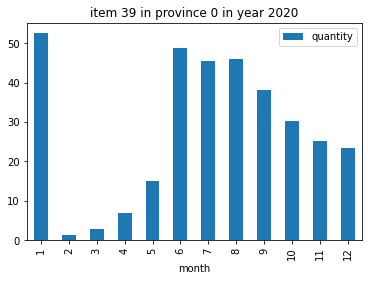

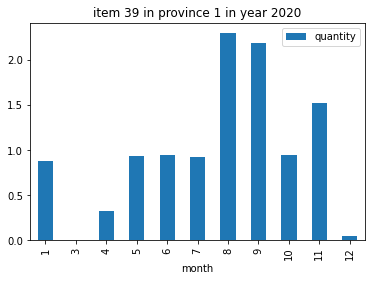

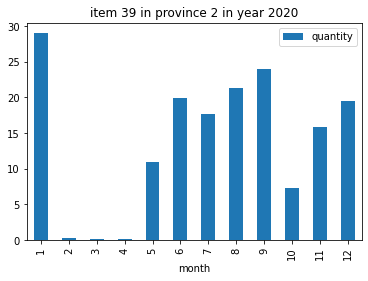

In [58]:
for k in range(4):
    for j in range(3):
        if item_4years[k][39][j].empty == False:
            item_4years[k][39][j].plot(
                x='month',
                y='quantity',
                kind='bar',
                title='item {0} in province {1} in year {2}'.format(
                    str(39), str(j), str(2017 + k)))

In [25]:
first1=item_4years[0][1][0].iloc[0].to_frame().T
itemid = first1['month']*100+first1['item_id']*10+first1['province_id']*1
first1['itemid'] = itemid
first1

year  month  item_id  province_id    quantity  itemid
1  2017.0    1.0      1.0          0.0  421.313155   110.0

In [27]:
item1=[]
for i in range(4):
    item = item_4years[i][1][0].iloc[0].to_frame().T
    itemid = item['month']*100+item['item_id']*10+item['province_id']*1
    item['itemid'] = itemid
    item1.append(item)

items=pd.concat(item1, axis=0)
itemsyearvsitemid = items[['year','itemid','quantity']]
itemsyearvsitemid

year  itemid    quantity
1     2017.0   110.0  421.313155
1128  2018.0   110.0  271.571595
2456  2019.0   110.0  242.528522
4003  2020.0   110.0  144.083818

In [10]:
item_4years[0][1][0]

year  month  item_id  province_id    quantity
1     2017      1        1            0  421.313155
85    2017      2        1            0  376.051222
171   2017      3        1            0  322.868452
261   2017      4        1            0  301.746217
352   2017      5        1            0  567.282887
447   2017      6        1            0  566.528522
543   2017      7        1            0  396.796275
642   2017      8        1            0  372.656577
740   2017      9        1            0  286.658906
841   2017     10        1            0  107.497090
938   2017     11        1            0   90.901048
1032  2017     12        1            0  110.514552